## Bank speeches starter template

The [Kaggle data set](https://www.kaggle.com/datasets/davidgauthier/central-bank-speeches/data) used in this project use speeches from senior central bankers of various influential central banks. The corpus runs from 1997 until 2022. Central banks are institutions that define monetary policy. As such, central bank speeches are widely followed and have a major influence on financial markets.

You can also refer to the raw data set and article used [here](https://www.kaggle.com/datasets/magnushansson/central-bank-speeches).

Note that, due to the large number of speeches contained in the data set, you can expect long running times for processing intensive steps such as sentiment analysis when using the full data set (30-60 mins). It is recommended that you reduce the subset of data under review when creating your prototype and then run the full data set through, if required, once the code behaves as expected. You can reduce the data set to, for example, only process data from the United Kingdom (or other countries) or by looking at specific date ranges.

The code is not extensive and you will be expected to use the provided code as a starting point only. You will also need to use your own creativity and logic to identify useful patterns in the data. You can explore sentiment, polarity and entities/keywords, and should use appropriate levels of granularity and aggregation in order to analyse patterns contained in the data.

In [1062]:
# Install the necessary libraries.
!pip install nltk
!pip install vaderSentiment
!pip install textblob
!pip install xlrd

   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---------------------------------------- 96.5/96.5 kB 5.4 MB/s eta 0:00:00


In [1064]:
# Import relevant libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [1066]:
# The function to determine whether there are missing values. 
def check_missing_values(df):
    if df.isnull().values.any():
        print("There are missing values in the DataFrame.")
    else:
        print("No missing values in the DataFrame.")

In [1070]:
# Load dataset. Change directory as required.
#Elif's file path
#df_all_speeches = pd.read_csv('C:\\Users\\elif.ozkol\\Desktop\\LSE Project\\all_speeches.csv')
# df_all_speeches = pd.read_csv('C:\\Users\\elif\\Desktop\\LSE BoE project\\all_speeches.csv')

#Gamze's file pathdf_all_speeches = pd.read_csv("C:\\Users\\gamze bozkurt omar\\Desktop\\Employer_Project\\Central_Bank_Speeches-2\\all_speeches.csv")
#Justin's file path
#df_all_speeches = pd.read_csv("C:\\Users\\justi\\OneDrive\\LSE Data Analytics\\Employer Project\\Employer Project files\\Central_Bank_Speeches-2\\all_speeches.csv")


In [1072]:
df_all_speeches.head()

Reference    Country       Date  Year     Month  \
0  r901128a_BOA  Australia 1990-11-28  1990  November   
1  r911003a_BOA  Australia 1991-10-03  1991   October   
2  r920314a_BOA  Australia 1992-03-14  1992     March   
3  r920529a_BOA  Australia 1992-05-29  1992       May   
4  r920817a_BOA  Australia 1992-08-17  1992    August   

                               Title  Author IsGov  \
0  A Proper Role for Monetary Policy  Fraser    No   
1                           Untitled  Fraser    No   
2                           Untitled  Fraser    No   
3                           Untitled  Fraser    No   
4                           Untitled  Fraser    No   

                                                Text  
0  would doubt argue two objectives like trying c...  
1  today wish talk real interest rates mainly his...  
2  welcome opportunity talk prospects banks austr...  
3  pleasure opportunity address influential gathe...  
4  longtime fan sanders delighted participating t...

In [1092]:
df_all_speeches.columns = [col[0].lower() + col[1:] if col else col for col in df_all_speeches.columns]

In [1094]:
# Check for missing values

check_missing_values(df_all_speeches)

No missing values in the DataFrame.


In [1096]:
# Dropping duplicates

df_all_speeches = df_all_speeches.drop_duplicates()

df_all_speeches

reference        country       date  year     month  \
0      r901128a_BOA      Australia 1990-11-28  1990  November   
1      r911003a_BOA      Australia 1991-10-03  1991   October   
2      r920314a_BOA      Australia 1992-03-14  1992     March   
3      r920529a_BOA      Australia 1992-05-29  1992       May   
4      r920817a_BOA      Australia 1992-08-17  1992    August   
...             ...            ...        ...   ...       ...   
7716  r221010a_FOMC  United States 2022-10-10  2022   October   
7717  r221012b_FOMC  United States 2022-10-12  2022   October   
7718  r221012a_FOMC  United States 2022-10-12  2022   October   
7719  r221014a_FOMC  United States 2022-10-14  2022   October   
7720  r221020a_FOMC  United States 2022-10-20  2022   October   

                                                  title    author isGov  \
0                     A Proper Role for Monetary Policy    Fraser    No   
1                                              Untitled    Fraser    No   
2                                              Untitled    Fraser    No   
3                                              Untitled    Fraser    No   
4                                              Untitled    Fraser    No   
...                                                 ...       ...   ...   
7716  Restoring Price Stability in an Uncertain Econ...  Brainard    No   
7717  Managing the Promise and Risk of Financial Inn...      Barr    No   
7718  Forward Guidance as a Monetary Policy Tool: Co...    Bowman    No   
7719  The U.S. Dollar and Central Bank Digital Curre...    Waller    No   
7720                                  Welcoming Remarks    Bowman    No   

                                                   text  
0     would doubt argue two objectives like trying c...  
1     today wish talk real interest rates mainly his...  
2     welcome opportunity talk prospects banks austr...  
3     pleasure opportunity address influential gathe...  
4     longtime fan sanders delighted participating t...  
...                                                 ...  
7716  pleasure join discussion today inflation high ...  
7717  thank chris thank invitation speak today oppor...  
7718  thanks money marketeers inviting share perspec...  
7719  thank professor jackson thank invitation speak...  
7720  welcome thank joining us discuss topics import...  

[7721 rows x 9 columns]

In [1100]:
# Trim whitespace in text fields

text_columns = ['reference', 'country', 'title', 'author', 'text']
for col in text_columns:
    df_all_speeches[col] = df_all_speeches[col].astype(str).str.strip()

In [1102]:
df_all_speeches

reference        country       date  year     month  \
0      r901128a_BOA      Australia 1990-11-28  1990  November   
1      r911003a_BOA      Australia 1991-10-03  1991   October   
2      r920314a_BOA      Australia 1992-03-14  1992     March   
3      r920529a_BOA      Australia 1992-05-29  1992       May   
4      r920817a_BOA      Australia 1992-08-17  1992    August   
...             ...            ...        ...   ...       ...   
7716  r221010a_FOMC  United States 2022-10-10  2022   October   
7717  r221012b_FOMC  United States 2022-10-12  2022   October   
7718  r221012a_FOMC  United States 2022-10-12  2022   October   
7719  r221014a_FOMC  United States 2022-10-14  2022   October   
7720  r221020a_FOMC  United States 2022-10-20  2022   October   

                                                  title    author isGov  \
0                     A Proper Role for Monetary Policy    Fraser    No   
1                                              Untitled    Fraser    No   
2                                              Untitled    Fraser    No   
3                                              Untitled    Fraser    No   
4                                              Untitled    Fraser    No   
...                                                 ...       ...   ...   
7716  Restoring Price Stability in an Uncertain Econ...  Brainard    No   
7717  Managing the Promise and Risk of Financial Inn...      Barr    No   
7718  Forward Guidance as a Monetary Policy Tool: Co...    Bowman    No   
7719  The U.S. Dollar and Central Bank Digital Curre...    Waller    No   
7720                                  Welcoming Remarks    Bowman    No   

                                                   text  
0     would doubt argue two objectives like trying c...  
1     today wish talk real interest rates mainly his...  
2     welcome opportunity talk prospects banks austr...  
3     pleasure opportunity address influential gathe...  
4     longtime fan sanders delighted participating t...  
...                                                 ...  
7716  pleasure join discussion today inflation high ...  
7717  thank chris thank invitation speak today oppor...  
7718  thanks money marketeers inviting share perspec...  
7719  thank professor jackson thank invitation speak...  
7720  welcome thank joining us discuss topics import...  

[7721 rows x 9 columns]

In [1104]:
# Fill missing titles

df_all_speeches['title'] = df_all_speeches['title'].fillna('Untitled')
df_all_speeches['title'] = df_all_speeches['title'].replace('', 'Untitled')

df_all_speeches

reference        country       date  year     month  \
0      r901128a_BOA      Australia 1990-11-28  1990  November   
1      r911003a_BOA      Australia 1991-10-03  1991   October   
2      r920314a_BOA      Australia 1992-03-14  1992     March   
3      r920529a_BOA      Australia 1992-05-29  1992       May   
4      r920817a_BOA      Australia 1992-08-17  1992    August   
...             ...            ...        ...   ...       ...   
7716  r221010a_FOMC  United States 2022-10-10  2022   October   
7717  r221012b_FOMC  United States 2022-10-12  2022   October   
7718  r221012a_FOMC  United States 2022-10-12  2022   October   
7719  r221014a_FOMC  United States 2022-10-14  2022   October   
7720  r221020a_FOMC  United States 2022-10-20  2022   October   

                                                  title    author isGov  \
0                     A Proper Role for Monetary Policy    Fraser    No   
1                                              Untitled    Fraser    No   
2                                              Untitled    Fraser    No   
3                                              Untitled    Fraser    No   
4                                              Untitled    Fraser    No   
...                                                 ...       ...   ...   
7716  Restoring Price Stability in an Uncertain Econ...  Brainard    No   
7717  Managing the Promise and Risk of Financial Inn...      Barr    No   
7718  Forward Guidance as a Monetary Policy Tool: Co...    Bowman    No   
7719  The U.S. Dollar and Central Bank Digital Curre...    Waller    No   
7720                                  Welcoming Remarks    Bowman    No   

                                                   text  
0     would doubt argue two objectives like trying c...  
1     today wish talk real interest rates mainly his...  
2     welcome opportunity talk prospects banks austr...  
3     pleasure opportunity address influential gathe...  
4     longtime fan sanders delighted participating t...  
...                                                 ...  
7716  pleasure join discussion today inflation high ...  
7717  thank chris thank invitation speak today oppor...  
7718  thanks money marketeers inviting share perspec...  
7719  thank professor jackson thank invitation speak...  
7720  welcome thank joining us discuss topics import...  

[7721 rows x 9 columns]

In [1106]:
# Change NO_INFO in the title column to Untitled

df_all_speeches['title'] = df_all_speeches['title'].replace('NO_INFO', 'Untitled')

df_all_speeches

reference        country       date  year     month  \
0      r901128a_BOA      Australia 1990-11-28  1990  November   
1      r911003a_BOA      Australia 1991-10-03  1991   October   
2      r920314a_BOA      Australia 1992-03-14  1992     March   
3      r920529a_BOA      Australia 1992-05-29  1992       May   
4      r920817a_BOA      Australia 1992-08-17  1992    August   
...             ...            ...        ...   ...       ...   
7716  r221010a_FOMC  United States 2022-10-10  2022   October   
7717  r221012b_FOMC  United States 2022-10-12  2022   October   
7718  r221012a_FOMC  United States 2022-10-12  2022   October   
7719  r221014a_FOMC  United States 2022-10-14  2022   October   
7720  r221020a_FOMC  United States 2022-10-20  2022   October   

                                                  title    author isGov  \
0                     A Proper Role for Monetary Policy    Fraser    No   
1                                              Untitled    Fraser    No   
2                                              Untitled    Fraser    No   
3                                              Untitled    Fraser    No   
4                                              Untitled    Fraser    No   
...                                                 ...       ...   ...   
7716  Restoring Price Stability in an Uncertain Econ...  Brainard    No   
7717  Managing the Promise and Risk of Financial Inn...      Barr    No   
7718  Forward Guidance as a Monetary Policy Tool: Co...    Bowman    No   
7719  The U.S. Dollar and Central Bank Digital Curre...    Waller    No   
7720                                  Welcoming Remarks    Bowman    No   

                                                   text  
0     would doubt argue two objectives like trying c...  
1     today wish talk real interest rates mainly his...  
2     welcome opportunity talk prospects banks austr...  
3     pleasure opportunity address influential gathe...  
4     longtime fan sanders delighted participating t...  
...                                                 ...  
7716  pleasure join discussion today inflation high ...  
7717  thank chris thank invitation speak today oppor...  
7718  thanks money marketeers inviting share perspec...  
7719  thank professor jackson thank invitation speak...  
7720  welcome thank joining us discuss topics import...  

[7721 rows x 9 columns]

In [1108]:
# Capitalize the 'country' and 'author' columns

df_all_speeches['country'] = df_all_speeches['country'].str.title()
df_all_speeches['author'] = df_all_speeches['author'].str.title()

df_all_speeches

reference        country       date  year     month  \
0      r901128a_BOA      Australia 1990-11-28  1990  November   
1      r911003a_BOA      Australia 1991-10-03  1991   October   
2      r920314a_BOA      Australia 1992-03-14  1992     March   
3      r920529a_BOA      Australia 1992-05-29  1992       May   
4      r920817a_BOA      Australia 1992-08-17  1992    August   
...             ...            ...        ...   ...       ...   
7716  r221010a_FOMC  United States 2022-10-10  2022   October   
7717  r221012b_FOMC  United States 2022-10-12  2022   October   
7718  r221012a_FOMC  United States 2022-10-12  2022   October   
7719  r221014a_FOMC  United States 2022-10-14  2022   October   
7720  r221020a_FOMC  United States 2022-10-20  2022   October   

                                                  title    author isGov  \
0                     A Proper Role for Monetary Policy    Fraser    No   
1                                              Untitled    Fraser    No   
2                                              Untitled    Fraser    No   
3                                              Untitled    Fraser    No   
4                                              Untitled    Fraser    No   
...                                                 ...       ...   ...   
7716  Restoring Price Stability in an Uncertain Econ...  Brainard    No   
7717  Managing the Promise and Risk of Financial Inn...      Barr    No   
7718  Forward Guidance as a Monetary Policy Tool: Co...    Bowman    No   
7719  The U.S. Dollar and Central Bank Digital Curre...    Waller    No   
7720                                  Welcoming Remarks    Bowman    No   

                                                   text  
0     would doubt argue two objectives like trying c...  
1     today wish talk real interest rates mainly his...  
2     welcome opportunity talk prospects banks austr...  
3     pleasure opportunity address influential gathe...  
4     longtime fan sanders delighted participating t...  
...                                                 ...  
7716  pleasure join discussion today inflation high ...  
7717  thank chris thank invitation speak today oppor...  
7718  thanks money marketeers inviting share perspec...  
7719  thank professor jackson thank invitation speak...  
7720  welcome thank joining us discuss topics import...  

[7721 rows x 9 columns]

In [1116]:
# Make all column names Title Case

df_all_speeches.columns = [col.title() for col in df_all_speeches.columns]

df_all_speeches

Reference        Country       Date  Year     Month  \
0      r901128a_BOA      Australia 1990-11-28  1990  November   
1      r911003a_BOA      Australia 1991-10-03  1991   October   
2      r920314a_BOA      Australia 1992-03-14  1992     March   
3      r920529a_BOA      Australia 1992-05-29  1992       May   
4      r920817a_BOA      Australia 1992-08-17  1992    August   
...             ...            ...        ...   ...       ...   
7716  r221010a_FOMC  United States 2022-10-10  2022   October   
7717  r221012b_FOMC  United States 2022-10-12  2022   October   
7718  r221012a_FOMC  United States 2022-10-12  2022   October   
7719  r221014a_FOMC  United States 2022-10-14  2022   October   
7720  r221020a_FOMC  United States 2022-10-20  2022   October   

                                                  Title    Author Isgov  \
0                     A Proper Role for Monetary Policy    Fraser    No   
1                                              Untitled    Fraser    No   
2                                              Untitled    Fraser    No   
3                                              Untitled    Fraser    No   
4                                              Untitled    Fraser    No   
...                                                 ...       ...   ...   
7716  Restoring Price Stability in an Uncertain Econ...  Brainard    No   
7717  Managing the Promise and Risk of Financial Inn...      Barr    No   
7718  Forward Guidance as a Monetary Policy Tool: Co...    Bowman    No   
7719  The U.S. Dollar and Central Bank Digital Curre...    Waller    No   
7720                                  Welcoming Remarks    Bowman    No   

                                                   Text  
0     would doubt argue two objectives like trying c...  
1     today wish talk real interest rates mainly his...  
2     welcome opportunity talk prospects banks austr...  
3     pleasure opportunity address influential gathe...  
4     longtime fan sanders delighted participating t...  
...                                                 ...  
7716  pleasure join discussion today inflation high ...  
7717  thank chris thank invitation speak today oppor...  
7718  thanks money marketeers inviting share perspec...  
7719  thank professor jackson thank invitation speak...  
7720  welcome thank joining us discuss topics import...  

[7721 rows x 9 columns]

In [1118]:
# Is_Gov replace underscores with spaces, convert it to IsGov

df_all_speeches.columns = [col.replace('_', ' ').title().replace(' ', '') for col in df_all_speeches.columns]

df_all_speeches

Reference        Country       Date  Year     Month  \
0      r901128a_BOA      Australia 1990-11-28  1990  November   
1      r911003a_BOA      Australia 1991-10-03  1991   October   
2      r920314a_BOA      Australia 1992-03-14  1992     March   
3      r920529a_BOA      Australia 1992-05-29  1992       May   
4      r920817a_BOA      Australia 1992-08-17  1992    August   
...             ...            ...        ...   ...       ...   
7716  r221010a_FOMC  United States 2022-10-10  2022   October   
7717  r221012b_FOMC  United States 2022-10-12  2022   October   
7718  r221012a_FOMC  United States 2022-10-12  2022   October   
7719  r221014a_FOMC  United States 2022-10-14  2022   October   
7720  r221020a_FOMC  United States 2022-10-20  2022   October   

                                                  Title    Author Isgov  \
0                     A Proper Role for Monetary Policy    Fraser    No   
1                                              Untitled    Fraser    No   
2                                              Untitled    Fraser    No   
3                                              Untitled    Fraser    No   
4                                              Untitled    Fraser    No   
...                                                 ...       ...   ...   
7716  Restoring Price Stability in an Uncertain Econ...  Brainard    No   
7717  Managing the Promise and Risk of Financial Inn...      Barr    No   
7718  Forward Guidance as a Monetary Policy Tool: Co...    Bowman    No   
7719  The U.S. Dollar and Central Bank Digital Curre...    Waller    No   
7720                                  Welcoming Remarks    Bowman    No   

                                                   Text  
0     would doubt argue two objectives like trying c...  
1     today wish talk real interest rates mainly his...  
2     welcome opportunity talk prospects banks austr...  
3     pleasure opportunity address influential gathe...  
4     longtime fan sanders delighted participating t...  
...                                                 ...  
7716  pleasure join discussion today inflation high ...  
7717  thank chris thank invitation speak today oppor...  
7718  thanks money marketeers inviting share perspec...  
7719  thank professor jackson thank invitation speak...  
7720  welcome thank joining us discuss topics import...  

[7721 rows x 9 columns]

In [1120]:
# Add Year column and take the years from the column Date 

# convert 'Date' is datetime type
df_all_speeches['Date'] = pd.to_datetime(df_all_speeches['Date'], errors='coerce')

# Extract the year and create a new 'Year' column from Date column
df_all_speeches['Year'] = df_all_speeches['Date'].dt.year

# Add Month column and take the months from the column Date 
df_all_speeches['Month'] = df_all_speeches['Date'].dt.strftime('%B')  
# Reorder columns and put the month, year next to Date
df_all_speeches = df_all_speeches[['Reference', 'Country', 'Date', 'Year', 'Month', 'Title', 'Author', 'Isgov', 'Text']]

df_all_speeches


Reference        Country       Date  Year     Month  \
0      r901128a_BOA      Australia 1990-11-28  1990  November   
1      r911003a_BOA      Australia 1991-10-03  1991   October   
2      r920314a_BOA      Australia 1992-03-14  1992     March   
3      r920529a_BOA      Australia 1992-05-29  1992       May   
4      r920817a_BOA      Australia 1992-08-17  1992    August   
...             ...            ...        ...   ...       ...   
7716  r221010a_FOMC  United States 2022-10-10  2022   October   
7717  r221012b_FOMC  United States 2022-10-12  2022   October   
7718  r221012a_FOMC  United States 2022-10-12  2022   October   
7719  r221014a_FOMC  United States 2022-10-14  2022   October   
7720  r221020a_FOMC  United States 2022-10-20  2022   October   

                                                  Title    Author Isgov  \
0                     A Proper Role for Monetary Policy    Fraser    No   
1                                              Untitled    Fraser    No   
2                                              Untitled    Fraser    No   
3                                              Untitled    Fraser    No   
4                                              Untitled    Fraser    No   
...                                                 ...       ...   ...   
7716  Restoring Price Stability in an Uncertain Econ...  Brainard    No   
7717  Managing the Promise and Risk of Financial Inn...      Barr    No   
7718  Forward Guidance as a Monetary Policy Tool: Co...    Bowman    No   
7719  The U.S. Dollar and Central Bank Digital Curre...    Waller    No   
7720                                  Welcoming Remarks    Bowman    No   

                                                   Text  
0     would doubt argue two objectives like trying c...  
1     today wish talk real interest rates mainly his...  
2     welcome opportunity talk prospects banks austr...  
3     pleasure opportunity address influential gathe...  
4     longtime fan sanders delighted participating t...  
...                                                 ...  
7716  pleasure join discussion today inflation high ...  
7717  thank chris thank invitation speak today oppor...  
7718  thanks money marketeers inviting share perspec...  
7719  thank professor jackson thank invitation speak...  
7720  welcome thank joining us discuss topics import...  

[7721 rows x 9 columns]

In [1122]:
df_all_speeches.Country.value_counts()

Country
Euro Area         2351
United States     1551
United Kingdom    1209
Japan              755
Canada             620
Sweden             600
Switzerland        351
Australia          284
Name: count, dtype: int64

In [1124]:
df_all_speeches[df_all_speeches['Country']=='United Kingdom'].sort_values('Date').head()

Reference         Country       Date  Year      Month  \
4961  r980915a_BOE  United Kingdom 1998-09-15  1998  September   
4962  r981021b_BOE  United Kingdom 1998-10-21  1998    October   
4963  r981021a_BOE  United Kingdom 1998-10-21  1998    October   
4964  r981101a_BOE  United Kingdom 1998-11-01  1998   November   
4965  r981101b_BOE  United Kingdom 1998-11-01  1998   November   

                                                  Title   Author Isgov  \
4961                                             Speech   George   Yes   
4962                                  Britain in Europe   George   Yes   
4963  Impact of the recent turbulence in internation...     King    No   
4964        Economic policy, with and without forecasts     Budd    No   
4965  Inflation targeting in practice: the UK experi...  Vickers    No   

                                                   Text  
4961  thank chairman actually pleased opportunity re...  
4962  great pleasure beautiful city bruges honoured ...  
4963  industries suffered volatility british economy...  
4964  topic evening use forecasts economic policymak...  
4965  six years ago week sterling left exchange rate...

In [1128]:
#Change the IsGov  IsGov 0 as False and IsGov 1 as True

df_all_speeches['IsGov'] = df_all_speeches['Isgov'].map({0: False, 1: True})

df_all_speeches


Reference        Country       Date  Year     Month  \
0      r901128a_BOA      Australia 1990-11-28  1990  November   
1      r911003a_BOA      Australia 1991-10-03  1991   October   
2      r920314a_BOA      Australia 1992-03-14  1992     March   
3      r920529a_BOA      Australia 1992-05-29  1992       May   
4      r920817a_BOA      Australia 1992-08-17  1992    August   
...             ...            ...        ...   ...       ...   
7716  r221010a_FOMC  United States 2022-10-10  2022   October   
7717  r221012b_FOMC  United States 2022-10-12  2022   October   
7718  r221012a_FOMC  United States 2022-10-12  2022   October   
7719  r221014a_FOMC  United States 2022-10-14  2022   October   
7720  r221020a_FOMC  United States 2022-10-20  2022   October   

                                                  Title    Author Isgov  \
0                     A Proper Role for Monetary Policy    Fraser    No   
1                                              Untitled    Fraser    No   
2                                              Untitled    Fraser    No   
3                                              Untitled    Fraser    No   
4                                              Untitled    Fraser    No   
...                                                 ...       ...   ...   
7716  Restoring Price Stability in an Uncertain Econ...  Brainard    No   
7717  Managing the Promise and Risk of Financial Inn...      Barr    No   
7718  Forward Guidance as a Monetary Policy Tool: Co...    Bowman    No   
7719  The U.S. Dollar and Central Bank Digital Curre...    Waller    No   
7720                                  Welcoming Remarks    Bowman    No   

                                                   Text IsGov  
0     would doubt argue two objectives like trying c...   NaN  
1     today wish talk real interest rates mainly his...   NaN  
2     welcome opportunity talk prospects banks austr...   NaN  
3     pleasure opportunity address influential gathe...   NaN  
4     longtime fan sanders delighted participating t...   NaN  
...                                                 ...   ...  
7716  pleasure join discussion today inflation high ...   NaN  
7717  thank chris thank invitation speak today oppor...   NaN  
7718  thanks money marketeers inviting share perspec...   NaN  
7719  thank professor jackson thank invitation speak...   NaN  
7720  welcome thank joining us discuss topics import...   NaN  

[7721 rows x 10 columns]

In [1130]:
# Apply the  IF date > 1993 & date < 2004 & author == george, is_gov == YES

df_all_speeches['IsGov'] = 'No'  # Set default
df_all_speeches.loc[
    (df_all_speeches['Year'] > 1993) & 
    (df_all_speeches['Year'] < 2004) & 
    (df_all_speeches['Author'] == 'George'),
    'IsGov'
] = 'Yes'

df_all_speeches

Reference        Country       Date  Year     Month  \
0      r901128a_BOA      Australia 1990-11-28  1990  November   
1      r911003a_BOA      Australia 1991-10-03  1991   October   
2      r920314a_BOA      Australia 1992-03-14  1992     March   
3      r920529a_BOA      Australia 1992-05-29  1992       May   
4      r920817a_BOA      Australia 1992-08-17  1992    August   
...             ...            ...        ...   ...       ...   
7716  r221010a_FOMC  United States 2022-10-10  2022   October   
7717  r221012b_FOMC  United States 2022-10-12  2022   October   
7718  r221012a_FOMC  United States 2022-10-12  2022   October   
7719  r221014a_FOMC  United States 2022-10-14  2022   October   
7720  r221020a_FOMC  United States 2022-10-20  2022   October   

                                                  Title    Author Isgov  \
0                     A Proper Role for Monetary Policy    Fraser    No   
1                                              Untitled    Fraser    No   
2                                              Untitled    Fraser    No   
3                                              Untitled    Fraser    No   
4                                              Untitled    Fraser    No   
...                                                 ...       ...   ...   
7716  Restoring Price Stability in an Uncertain Econ...  Brainard    No   
7717  Managing the Promise and Risk of Financial Inn...      Barr    No   
7718  Forward Guidance as a Monetary Policy Tool: Co...    Bowman    No   
7719  The U.S. Dollar and Central Bank Digital Curre...    Waller    No   
7720                                  Welcoming Remarks    Bowman    No   

                                                   Text IsGov  
0     would doubt argue two objectives like trying c...    No  
1     today wish talk real interest rates mainly his...    No  
2     welcome opportunity talk prospects banks austr...    No  
3     pleasure opportunity address influential gathe...    No  
4     longtime fan sanders delighted participating t...    No  
...                                                 ...   ...  
7716  pleasure join discussion today inflation high ...    No  
7717  thank chris thank invitation speak today oppor...    No  
7718  thanks money marketeers inviting share perspec...    No  
7719  thank professor jackson thank invitation speak...    No  
7720  welcome thank joining us discuss topics import...    No  

[7721 rows x 10 columns]

In [1132]:
# Filter only rows where Author is George ( this is just for checking if Yes set correctly for the Author George
df_george = df_all_speeches[df_all_speeches['Author'] == 'George']

df_george

Reference         Country       Date  Year      Month  \
4961  r980915a_BOE  United Kingdom 1998-09-15  1998  September   
4962  r981021b_BOE  United Kingdom 1998-10-21  1998    October   
4966  r981119a_BOE  United Kingdom 1998-11-19  1998   November   
4969  r990112a_BOE  United Kingdom 1999-01-12  1999    January   
4970  r990118a_BOE  United Kingdom 1999-01-18  1999    January   
4971  r990201a_BOE  United Kingdom 1999-02-01  1999   February   
4972  r990210a_BOE  United Kingdom 1999-02-10  1999   February   
4973  r990218a_BOE  United Kingdom 1999-02-18  1999   February   
4974  r990224a_BOE  United Kingdom 1999-02-24  1999   February   
4975  r990301a_BOE  United Kingdom 1999-03-01  1999      March   
4977  r990514a_BOE  United Kingdom 1999-05-14  1999        May   
4979  r990518a_BOE  United Kingdom 1999-05-18  1999        May   
4982  r990610a_BOE  United Kingdom 1999-06-10  1999       June   
4994  r991119a_BOE  United Kingdom 1999-11-19  1999   November   
4997  r991207a_BOE  United Kingdom 1999-12-07  1999   December   
5000  r000118a_BOE  United Kingdom 2000-01-18  2000    January   
5001  r000126a_BOE  United Kingdom 2000-01-26  2000    January   
5002  r000214a_BOE  United Kingdom 2000-02-14  2000   February   
5003  r000216a_BOE  United Kingdom 2000-02-16  2000   February   
5005  r000225a_BOE  United Kingdom 2000-02-25  2000   February   
5009  r000328a_BOE  United Kingdom 2000-03-28  2000      March   
5011  r000404a_BOE  United Kingdom 2000-04-04  2000      April   
5018  r000613a_BOE  United Kingdom 2000-06-13  2000       June   
5020  r000615a_BOE  United Kingdom 2000-06-15  2000       June   
5025  r000826a_BOE  United Kingdom 2000-08-26  2000     August   
5026  r000827a_BOE  United Kingdom 2000-08-27  2000     August   
5028  r000928a_BOE  United Kingdom 2000-09-28  2000  September   
5029  r001002a_BOE  United Kingdom 2000-10-02  2000    October   
5032  r001107a_BOE  United Kingdom 2000-11-07  2000   November   
5035  r010115a_BOE  United Kingdom 2001-01-15  2001    January   
5036  r010116a_BOE  United Kingdom 2001-01-16  2001    January   
5047  r010425a_BOE  United Kingdom 2001-04-25  2001      April   
5048  r010507a_BOE  United Kingdom 2001-05-07  2001        May   
5053  r010530a_BOE  United Kingdom 2001-05-30  2001        May   
5056  r010620a_BOE  United Kingdom 2001-06-20  2001       June   
5061  r010913a_BOE  United Kingdom 2001-09-13  2001  September   
5066  r011016a_BOE  United Kingdom 2001-10-16  2001    October   
5073  r011212a_BOE  United Kingdom 2001-12-12  2001   December   
5075  r020114a_BOE  United Kingdom 2002-01-14  2002    January   
5076  r020118a_BOE  United Kingdom 2002-01-18  2002    January   
5077  r020122a_BOE  United Kingdom 2002-01-22  2002    January   
5078  r020204a_BOE  United Kingdom 2002-02-04  2002   February   
5079  r020212a_BOE  United Kingdom 2002-02-12  2002   February   
5080  r020219a_BOE  United Kingdom 2002-02-19  2002   February   
5083  r020319a_BOE  United Kingdom 2002-03-19  2002      March   
5085  r020411a_BOE  United Kingdom 2002-04-11  2002      April   
5092  r020626a_BOE  United Kingdom 2002-06-26  2002       June   
5094  r020920a_BOE  United Kingdom 2002-09-20  2002  September   
5096  r021015a_BOE  United Kingdom 2002-10-15  2002    October   
5097  r021113a_BOE  United Kingdom 2002-11-13  2002   November   
5101  r021206b_BOE  United Kingdom 2002-12-06  2002   December   
5105  r030120a_BOE  United Kingdom 2003-01-20  2003    January   
5109  r030324a_BOE  United Kingdom 2003-03-24  2003      March   
5110  r030327a_BOE  United Kingdom 2003-03-27  2003      March   
5115  r030618a_BOE  United Kingdom 2003-06-18  2003       June   

                                                  Title  Author Isgov  \
4961                                             Speech  George   Yes   
4962                                  Britain in Europe  George   Yes   
4966                                             Speech  George   Yes   
4969                

In [1134]:
# Filter rows where Reference does NOT start with 'r'
invalid_references = df_all_speeches[~df_all_speeches['Reference'].astype(str).str.startswith('r')]

# Check if there are any invalid references
if invalid_references.empty:
    print("All references start with 'r'. No invalid references found.")
else:
    display(invalid_references)

All references start with 'r'. No invalid references found.


In [1136]:
# I think it's not necssary and making it as comment for now
# Demo: Example of adding a column to calculate the string length per speech.
##df_all_speeches['Len'] = df_all_speeches['Text'].str.len()
##df_all_speeches

In [1138]:
# Demo: Convert to lower case and remove punctuation.
df_all_speeches['Text'] = df_all_speeches['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_all_speeches['Text'] = df_all_speeches['Text'].str.replace(r'[^\w\s]', '', regex=True)
df_all_speeches


Reference        Country       Date  Year     Month  \
0      r901128a_BOA      Australia 1990-11-28  1990  November   
1      r911003a_BOA      Australia 1991-10-03  1991   October   
2      r920314a_BOA      Australia 1992-03-14  1992     March   
3      r920529a_BOA      Australia 1992-05-29  1992       May   
4      r920817a_BOA      Australia 1992-08-17  1992    August   
...             ...            ...        ...   ...       ...   
7716  r221010a_FOMC  United States 2022-10-10  2022   October   
7717  r221012b_FOMC  United States 2022-10-12  2022   October   
7718  r221012a_FOMC  United States 2022-10-12  2022   October   
7719  r221014a_FOMC  United States 2022-10-14  2022   October   
7720  r221020a_FOMC  United States 2022-10-20  2022   October   

                                                  Title    Author Isgov  \
0                     A Proper Role for Monetary Policy    Fraser    No   
1                                              Untitled    Fraser    No   
2                                              Untitled    Fraser    No   
3                                              Untitled    Fraser    No   
4                                              Untitled    Fraser    No   
...                                                 ...       ...   ...   
7716  Restoring Price Stability in an Uncertain Econ...  Brainard    No   
7717  Managing the Promise and Risk of Financial Inn...      Barr    No   
7718  Forward Guidance as a Monetary Policy Tool: Co...    Bowman    No   
7719  The U.S. Dollar and Central Bank Digital Curre...    Waller    No   
7720                                  Welcoming Remarks    Bowman    No   

                                                   Text IsGov  
0     would doubt argue two objectives like trying c...    No  
1     today wish talk real interest rates mainly his...    No  
2     welcome opportunity talk prospects banks austr...    No  
3     pleasure opportunity address influential gathe...    No  
4     longtime fan sanders delighted participating t...    No  
...                                                 ...   ...  
7716  pleasure join discussion today inflation high ...    No  
7717  thank chris thank invitation speak today oppor...    No  
7718  thanks money marketeers inviting share perspec...    No  
7719  thank professor jackson thank invitation speak...    No  
7720  welcome thank joining us discuss topics import...    No  

[7721 rows x 10 columns]

In [1139]:
#install library
!pip install contractions
import contractions

In [1140]:
# Prepare stopwords, excluding 'not'
stop_words = set(stopwords.words('english')) - {'not'}

# Apply all preprocessing steps 
df_all_speeches['Text'] = (
    df_all_speeches['Text']
    .astype(str)  # Ensure all values are strings
    .apply(contractions.fix)  # Expand contractions
    .str.replace(r'http\S+', '', regex=True)  # Remove URLs
    .str.replace('#', '', regex=False)  # Remove hashtags
    .str.replace(r'\W', ' ', regex=True)  # Remove special characters
    .str.lower()  # Convert to lowercase
    .apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))  # Remove stopwords (except 'not')
)
df_all_speeches

Reference        Country       Date  Year     Month  \
0      r901128a_BOA      Australia 1990-11-28  1990  November   
1      r911003a_BOA      Australia 1991-10-03  1991   October   
2      r920314a_BOA      Australia 1992-03-14  1992     March   
3      r920529a_BOA      Australia 1992-05-29  1992       May   
4      r920817a_BOA      Australia 1992-08-17  1992    August   
...             ...            ...        ...   ...       ...   
7716  r221010a_FOMC  United States 2022-10-10  2022   October   
7717  r221012b_FOMC  United States 2022-10-12  2022   October   
7718  r221012a_FOMC  United States 2022-10-12  2022   October   
7719  r221014a_FOMC  United States 2022-10-14  2022   October   
7720  r221020a_FOMC  United States 2022-10-20  2022   October   

                                                  Title    Author Isgov  \
0                     A Proper Role for Monetary Policy    Fraser    No   
1                                              Untitled    Fraser    No   
2                                              Untitled    Fraser    No   
3                                              Untitled    Fraser    No   
4                                              Untitled    Fraser    No   
...                                                 ...       ...   ...   
7716  Restoring Price Stability in an Uncertain Econ...  Brainard    No   
7717  Managing the Promise and Risk of Financial Inn...      Barr    No   
7718  Forward Guidance as a Monetary Policy Tool: Co...    Bowman    No   
7719  The U.S. Dollar and Central Bank Digital Curre...    Waller    No   
7720                                  Welcoming Remarks    Bowman    No   

                                                   Text IsGov  
0     would doubt argue two objectives like trying c...    No  
1     today wish talk real interest rates mainly his...    No  
2     welcome opportunity talk prospects banks austr...    No  
3     pleasure opportunity address influential gathe...    No  
4     longtime fan sanders delighted participating t...    No  
...                                                 ...   ...  
7716  pleasure join discussion today inflation high ...    No  
7717  thank chris thank invitation speak today oppor...    No  
7718  thanks money marketeers inviting share perspec...    No  
7719  thank professor jackson thank invitation speak...    No  
7720  welcome thank joining us discuss topics import...    No  

[7721 rows x 10 columns]

#### General number of speech overview by each bank

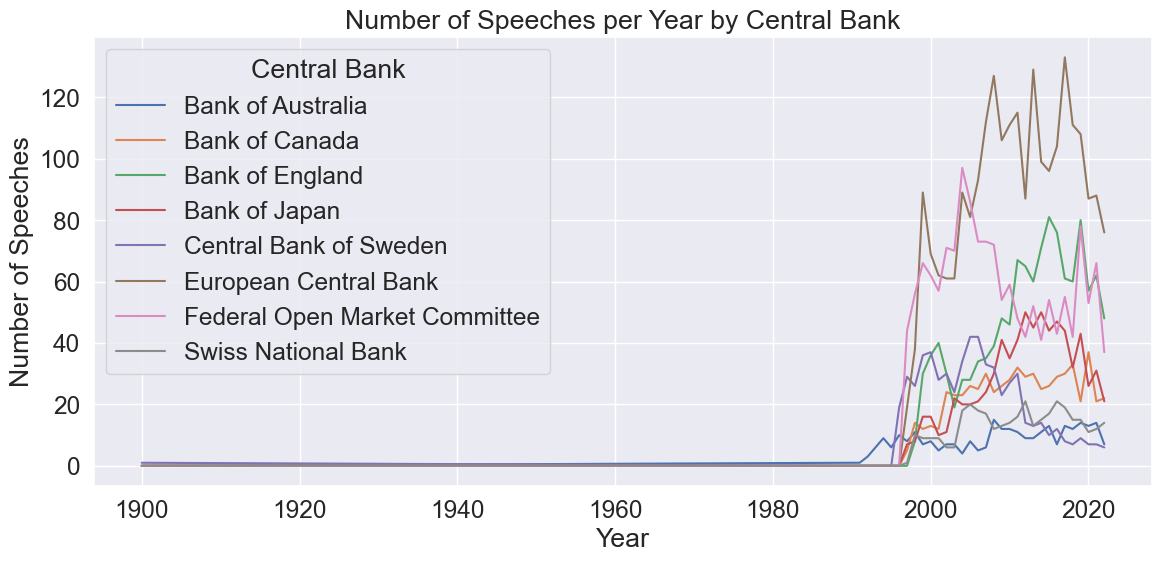

In [1144]:
# Copy the base DataFrame
speech_df = df_all_speeches.copy()

# Extract the body code from the 'Reference' column
speech_df['Body'] = speech_df['Reference'].str.extract(r'_([^_]+)$')

# Map body codes to central bank names
body_to_bank = {
    'BOA': 'Bank of Australia',
    'BOC': 'Bank of Canada',
    'ECB': 'European Central Bank',
    'BOJ': 'Bank of Japan',
    'SRB': 'Central Bank of Sweden',
    'SNB': 'Swiss National Bank',
    'BOE': 'Bank of England',
    'FOMC': 'Federal Open Market Committee'
}
speech_df['central_bank'] = speech_df['Body'].map(body_to_bank)


# Extract year from the 'Date' column
speech_df['year'] = pd.to_datetime(speech_df['Date']).dt.year

# Group and count speeches by year and central bank
speech_counts = (
    speech_df.groupby(['year', 'central_bank'])
    .size()
    .unstack(fill_value=0)
)

# Plot the results
plt.figure(figsize=(12, 6))
for bank in speech_counts.columns:
    plt.plot(speech_counts.index, speech_counts[bank], label=bank)

plt.title('Number of Speeches per Year by Central Bank')
plt.xlabel('Year')
plt.ylabel('Number of Speeches')
plt.grid(True)
plt.legend(title='Central Bank')
plt.tight_layout()
plt.show()

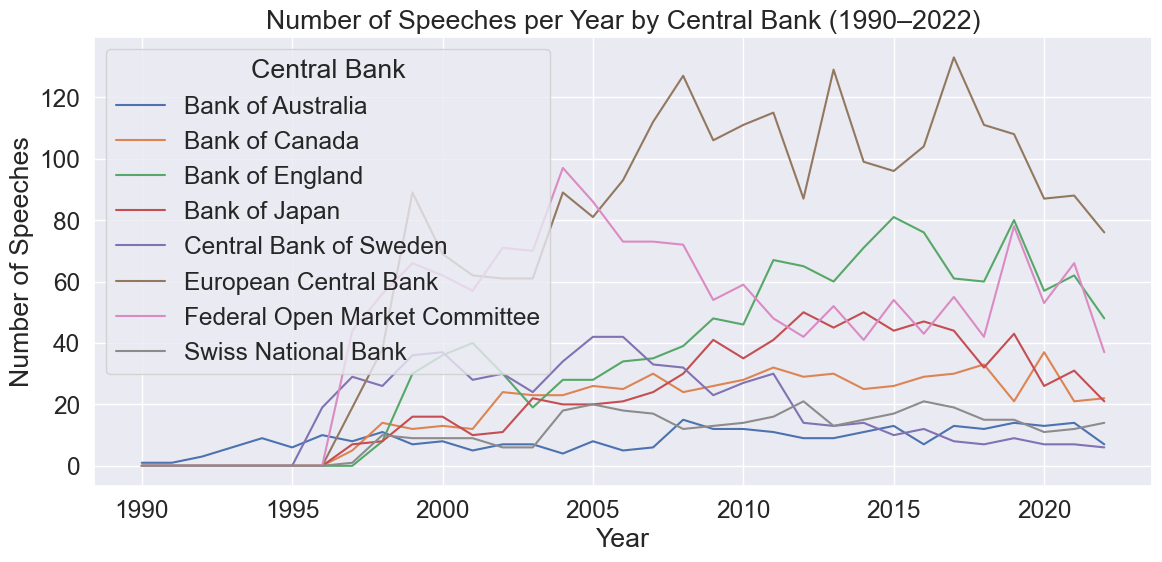

<Figure size 640x480 with 0 Axes>

In [1145]:
# Filter to years between 1990 and 2022
filtered_df = speech_df[(speech_df['year'] >= 1990) & (speech_df['year'] <= 2022)]

# Group and count speeches again for the filtered range
filtered_counts = (
    filtered_df.groupby(['year', 'central_bank'])
    .size()
    .unstack(fill_value=0)
)

# Plot for 1990–2022
plt.figure(figsize=(12, 6))
for bank in filtered_counts.columns:
    plt.plot(filtered_counts.index, filtered_counts[bank], label=bank)

plt.title('Number of Speeches per Year by Central Bank (1990–2022)')
plt.xlabel('Year')
plt.ylabel('Number of Speeches')
plt.grid(True)
plt.legend(title='Central Bank')
plt.tight_layout()
plt.show()
plt.savefig("number_speeches_year_central_bank.png", dpi=300, bbox_inches='tight')

* Filter the df_all_speeches for only the Country United Kingdom 

In [1151]:
# Subset the data to reduce processing time.Only the country United Kingdom

df_uk = df_all_speeches[df_all_speeches['Country']=='United Kingdom'].sort_values('Year').reset_index(drop=True)

df_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Reference  1209 non-null   object        
 1   Country    1209 non-null   object        
 2   Date       1209 non-null   datetime64[ns]
 3   Year       1209 non-null   int32         
 4   Month      1209 non-null   object        
 5   Title      1209 non-null   object        
 6   Author     1209 non-null   object        
 7   Isgov      1209 non-null   object        
 8   Text       1209 non-null   object        
 9   IsGov      1209 non-null   object        
dtypes: datetime64[ns](1), int32(1), object(8)
memory usage: 89.9+ KB


**The most 5 frequent words for each year**

In [1154]:
from collections import Counter

# Tokenize, lower case, and count words per year
yearly_word_counts = {}

for year, group in df_uk.groupby('Year'):
    all_words = " ".join(group['Text'].astype(str)).lower().split()
    word_counts = Counter(all_words)
    most_common = word_counts.most_common(5)
    yearly_word_counts[year] = most_common

# Convert to a DataFrame for display
yearly_freq_df = pd.DataFrame([
    {'Year': year, 'Word': word, 'Count': count}
    for year, words in yearly_word_counts.items()
    for word, count in words
])


In [1156]:
yearly_freq_df

Year       Word  Count
0    1998  inflation    265
1    1998        not    210
2    1998     policy    188
3    1998   monetary    150
4    1998       rate    149
..    ...        ...    ...
120  2022  inflation   1163
121  2022        not   1148
122  2022      firms   1085
123  2022     policy   1033
124  2022       bank    841

[125 rows x 3 columns]

In [1158]:
# Filter the data for years between 2020 and 2025
filtered_df = yearly_freq_df[(yearly_freq_df['Year'] >= 2020) & (yearly_freq_df['Year'] <= 2022)]
filtered_df 

Year       Word  Count
110  2020  financial   1904
111  2020        not   1448
112  2020         uk   1399
113  2020      banks   1394
114  2020       bank   1201
115  2021        not   1564
116  2021      firms   1266
117  2021         uk   1128
118  2021       bank   1089
119  2021       cash   1031
120  2022  inflation   1163
121  2022        not   1148
122  2022      firms   1085
123  2022     policy   1033
124  2022       bank    841

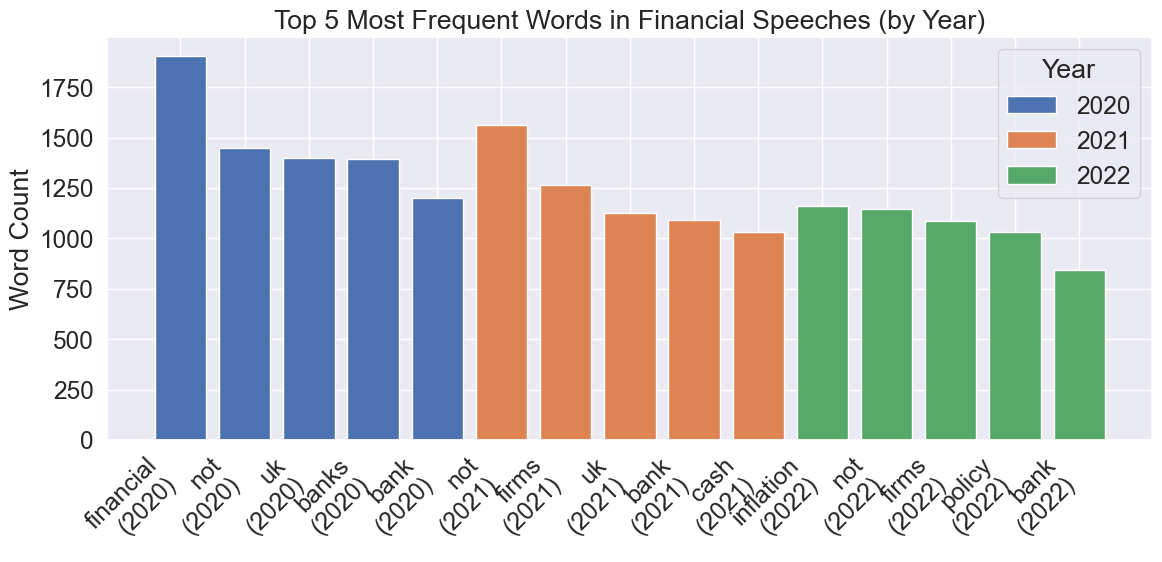

In [1160]:
# Create a bar plot
plt.figure(figsize=(12, 6))
for year in filtered_df ['Year'].unique():
    subset = filtered_df [filtered_df ['Year'] == year]
    plt.bar([f"{word}\n({year})" for word in subset['Word']], subset['Count'], label=str(year))

plt.xticks(rotation=45, ha='right')
plt.ylabel("Word Count")
plt.title("Top 5 Most Frequent Words in Financial Speeches (by Year)")
plt.legend(title="Year")
plt.tight_layout()
plt.show()

**Read LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2 and create dictionary:**

In [1163]:
# Create a new data frame for the file sentiment labelled wordlist
#Elif file
#df_sentiment_words = pd.read_excel('C:\\Users\\elif.ozkol\\Desktop\\LSE Project\\LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2.xlsx')
# df_sentiment_words = pd.read_excel('C:\\Users\\elif\\Desktop\\LSE BoE project\\LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2.xlsx')
#Gamze file
#df_sentiment_words = pd.read_excel("C:\\Users\\gamze bozkurt omar\\Desktop\\Employer_Project\\LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2.xlsx")
# df_sentiment_words

url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/lexicon/LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2.xlsx'
df_sentiment_words = pd.read_excel(url)  # Works similarly for CSV
df_sentiment_words

Word  Negative  Positive  Uncertainty  Litigious  Strong  Weak  \
0          ABANDON         1         0            0          0       0     0   
1        ABANDONED         1         0            0          0       0     0   
2       ABANDONING         1         0            0          0       0     0   
3      ABANDONMENT         1         0            0          0       0     0   
4     ABANDONMENTS         1         0            0          0       0     0   
...            ...       ...       ...          ...        ...     ...   ...   
3875   WRONGDOINGS         1         0            0          0       0     0   
3876      WRONGFUL         1         0            0          0       0     0   
3877    WRONGFULLY         1         0            0          0       0     0   
3878       WRONGLY         1         0            0          0       0     0   
3879         False         1         0            0          0       0     0   

      Constraining  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
3875             0  
3876             0  
3877             0  
3878             0  
3879             0  

[3880 rows x 8 columns]

**NLTK with Custom Lexicon**

In [1166]:
# Force all entries in 'Word' column to strings, skipping bad ones
df_sentiment_words = df_sentiment_words[df_sentiment_words['Word'].apply(lambda x: isinstance(x, str))]

df_sentiment_words

Word  Negative  Positive  Uncertainty  Litigious  Strong  Weak  \
0          ABANDON         1         0            0          0       0     0   
1        ABANDONED         1         0            0          0       0     0   
2       ABANDONING         1         0            0          0       0     0   
3      ABANDONMENT         1         0            0          0       0     0   
4     ABANDONMENTS         1         0            0          0       0     0   
...            ...       ...       ...          ...        ...     ...   ...   
3874    WRONGDOING         1         0            0          0       0     0   
3875   WRONGDOINGS         1         0            0          0       0     0   
3876      WRONGFUL         1         0            0          0       0     0   
3877    WRONGFULLY         1         0            0          0       0     0   
3878       WRONGLY         1         0            0          0       0     0   

      Constraining  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
3874             0  
3875             0  
3876             0  
3877             0  
3878             0  

[3879 rows x 8 columns]

**Build the custom lexicon**

In [1169]:
custom_lexicon = {}

for _, row in df_sentiment_words.iterrows():
    word = row['Word'].lower()
    
    # Weighted score based on categories
    score = (
        row['Positive'] * 2.0 +
        row['Negative'] * -2.0 +
        row['Uncertainty'] * -0.5 +
        row['Litigious'] * -0.3 +
        row['Strong'] * 1.0 +
        row['Weak'] * -1.0 +
        row['Constraining'] * -0.5
    )
    
    # Only include non-zero scores
    if score != 0:
        custom_lexicon[word] = score

**Define an NLTK-based analyzer using the lexicon**

In [1172]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # Only needs to run once

def analyze_sentiment(text, lexicon):
    tokens = word_tokenize(str(text).lower())
    score = sum(lexicon.get(word, 0) for word in tokens)
    
    pos_words = [w for w in tokens if lexicon.get(w, 0) > 0]
    neg_words = [w for w in tokens if lexicon.get(w, 0) < 0]

    return {
        "SentimentScore_nltk": score,
        "PositiveCount_nltk": len(pos_words),
        "NegativeCount_nltk": len(neg_words),
        "TotalWords_nltk": len(tokens)
    }


[nltk_data] Downloading package punkt to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Apply to the DataFrame df_uk**

In [1175]:
# Apply sentiment analysis to each row in the 'Text' column
sentiment_results = df_uk['Text'].apply(lambda text: analyze_sentiment(text, custom_lexicon))

# Convert results (dicts) into separate columns
sentiment_df = sentiment_results.apply(pd.Series)

# Merge back into original DataFrame
df_uk = pd.concat([df_uk, sentiment_df], axis=1)


In [1176]:
df_uk

Reference         Country       Date  Year      Month  \
0     r980915a_BOE  United Kingdom 1998-09-15  1998  September   
1     r981021b_BOE  United Kingdom 1998-10-21  1998    October   
2     r981021a_BOE  United Kingdom 1998-10-21  1998    October   
3     r981101a_BOE  United Kingdom 1998-11-01  1998   November   
4     r981101b_BOE  United Kingdom 1998-11-01  1998   November   
...            ...             ...        ...   ...        ...   
1204  r220523a_BOE  United Kingdom 2022-05-23  2022        May   
1205  r220525a_BOE  United Kingdom 2022-05-25  2022        May   
1206  r220526a_BOE  United Kingdom 2022-05-26  2022        May   
1207  r220608a_BOE  United Kingdom 2022-06-08  2022       June   
1208  r221020a_BOE  United Kingdom 2022-10-20  2022    October   

                                                  Title     Author Isgov  \
0                                                Speech     George   Yes   
1                                     Britain in Europe     George   Yes   
2     Impact of the recent turbulence in internation...       King    No   
3           Economic policy, with and without forecasts       Budd    No   
4     Inflation targeting in practice: the UK experi...    Vickers    No   
...                                                 ...        ...   ...   
1204      Opening remarks at OeNB monetary policy panel     Bailey    No   
1205  What will operational resilience look like goi...  Mackinnon    No   
1206  Four Rs: Creating the conditions for long-term...     Gerken    No   
1207  Climate Biennial Exploratory Scenario: Insuran...      Claus    No   
1208       The inflationary consequences of real shocks  Broadbent    No   

                                                   Text IsGov  \
0     thank chairman actually pleased opportunity re...   Yes   
1     great pleasure beautiful city bruges honoured ...   Yes   
2     industries suffered volatility british economy...    No   
3     topic evening use forecasts economic policymak...    No   
4     six years ago week sterling left exchange rate...    No   
...                                                 ...   ...   
1204  time large economic shocks particularly large ...    No   
1205  important business services impact tolerances ...    No   
1206  asset eligibility liability eligibility calcul...    No   
1207  thank inviting speak today abis climate summit...    No   
1208  covid19 pandemic russias invasion ukraine infl...    No   

      SentimentScore_nltk  PositiveCount_nltk  NegativeCount_nltk  \
0                   -54.9                51.0                86.0   
1                   -51.8                92.0               145.0   
2                   -97.6                36.0               107.0   
3                  -153.8                52.0               186.0   
4                  -219.8                54.0               242.0   
...                   ...                 ...                 ...   
1204                -10.5                 7.0                12.0   
1205               -281.9                69.0               306.0   
1206               -460.4               122.0               653.0   
1207                -99.0                23.0               128.0   
1208               -207.6                51.0               188.0   

      TotalWords_nltk  
0              1142.0  
1              2072.0  
2              1225.0  
3              2332.0  
4              2533.0  
...               ...  
1204            234.0  
1205           3756.0  
1206           7900.0  
1207           1165.0  
1208           3325.0  

[1209 rows x 14 columns]

**Select top 10 speeches by NegativeCount_nltk and include their years**

In [1180]:
df_uk.to_csv("df_uk_sentiment.csv", index=False)

In [1182]:
# Select top 10 speeches by NegativeCount_nltk and include their years
top_10_negative_with_years = df_uk.sort_values(by='NegativeCount_nltk', ascending=False).head(10)[['Year', 'Title','Text', 'NegativeCount_nltk']]

top_10_negative_with_years

Year                                              Title  \
1048  2020  Paving the way forward: managing climate risk ...   
1050  2020       Reinventing the wheel (with more automation)   
1070  2020  Leading the change: climate action in the fina...   
1057  2020  Response, and recovery: fintech during the Cov...   
1168  2022       Capital and (for a change) Liquidity Buffers   
1203  2022         The economic situation and monetary policy   
859   2017                     Rethinking Financial Stability   
1072  2020  Protecting economic muscle: Finance and the Co...   
1198  2022                                          Bufferati   
1149  2021                         Do we need ‘public money’?   

                                                   Text  NegativeCount_nltk  
1048  covid19 pandemic severely disruptive economic ...              2342.0  
1050  covid19 pandemic severely disruptive economic ...              2342.0  
1070  executive summary insurance industry climate c...              1810.0  
1057  financial stability board fsb established coor...              1482.0  
1168  publication available bis website wwwbisorg tr...              1460.0  
1203  classic question relevant today federal reserv...              1228.0  
859   bank england views expressed paper authors not...              1214.0  
1072  authorities around world taking action halt sp...              1153.0  
1198  copies publications available publication avai...              1146.0  
1149  access cash review commissioned response rapid...               981.0

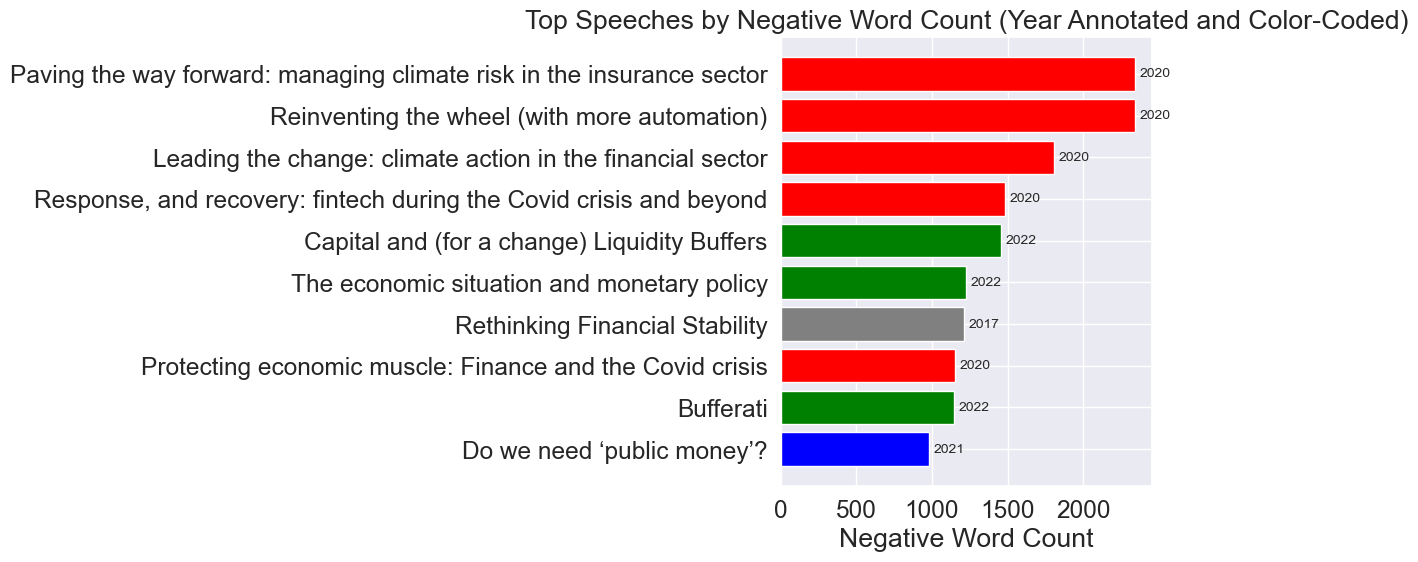

In [1184]:
# Visual of top 10 speeches by NegativeCount_nltk

# Create a horizontal bar chart with year annotations on the bars
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_negative_with_years['Title'], top_10_negative_with_years['NegativeCount_nltk'], color=top_10_negative_with_years['Year'].astype(str).map({
    '2017': 'gray', '2020': 'red', '2021': 'blue', '2022': 'green'
}))

# Add year labels next to each bar
for bar, year in zip(bars, top_10_negative_with_years['Year']):
    plt.text(bar.get_width() + 30, bar.get_y() + bar.get_height()/2,
             str(year), va='center', ha='left', fontsize=10)

plt.xlabel("Negative Word Count")
plt.title("Top Speeches by Negative Word Count (Year Annotated and Color-Coded)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [1186]:
# Select top 10 speeches by PositiveCount_nltk and include their years
top_10_positive_with_years = df_uk.sort_values(by='PositiveCount_nltk', ascending=False).head(10)[['Year', 'Title','Text', 'PositiveCount_nltk']]

top_10_positive_with_years

Year                                              Title  \
1056  2020                      Is home working good for you?   
1057  2020  Response, and recovery: fintech during the Cov...   
1191  2022        The UK economic outlook and monetary policy   
1149  2021                         Do we need ‘public money’?   
1050  2020       Reinventing the wheel (with more automation)   
1048  2020  Paving the way forward: managing climate risk ...   
1092  2020  Financial System Resilience: Lessons from a re...   
397   2010                     Monetary Policy after the Fall   
126   2002      Monetary Policy Issues: Past, Present, Future   
859   2017                     Rethinking Financial Stability   

                                                   Text  PositiveCount_nltk  
1056  good work positive effect productivity tradeof...              1070.0  
1057  financial stability board fsb established coor...               511.0  
1191  16 october 2018 footnote chart page 19 amended...               414.0  
1149  access cash review commissioned response rapid...               318.0  
1050  covid19 pandemic severely disruptive economic ...               310.0  
1048  covid19 pandemic severely disruptive economic ...               310.0  
1092  meet midst critical transition crisis recovery...               294.0  
397   paper draws lessons crisis future conduct mone...               267.0  
126   four issues considered mpc demonstrated bias t...               240.0  
859   bank england views expressed paper authors not...               238.0

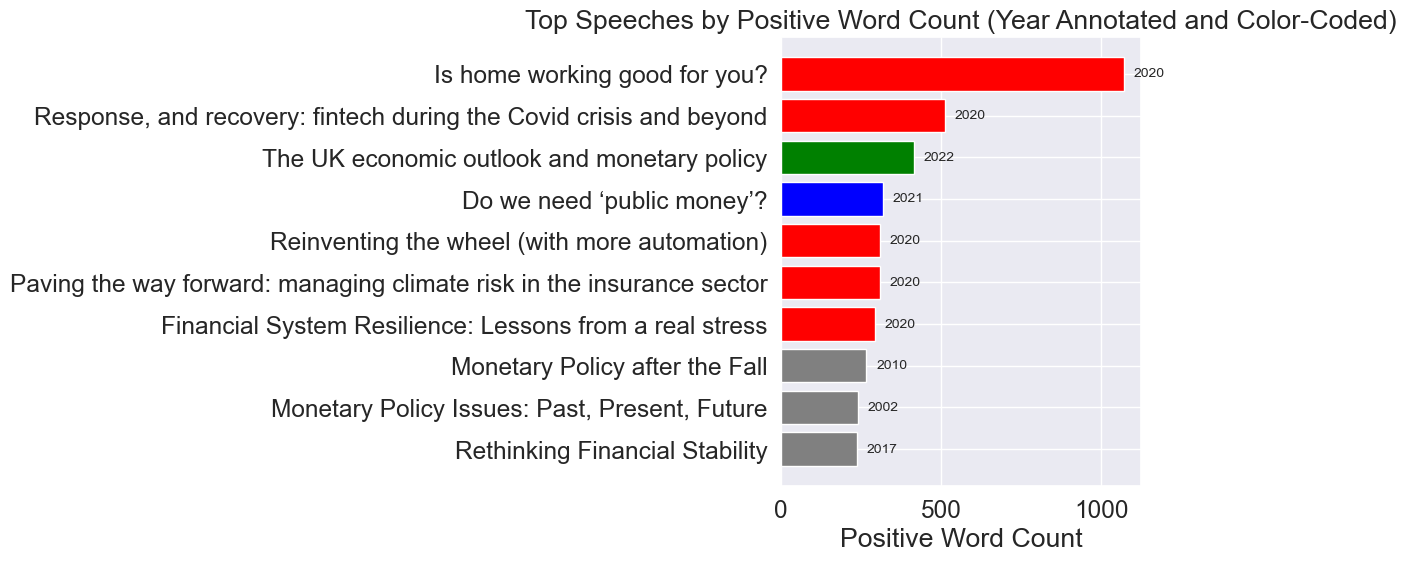

In [1188]:
# Visual of top 10 speeches by PositiveCount_nltk

# Create a horizontal bar chart with year annotations on the bars
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_positive_with_years['Title'], top_10_positive_with_years['PositiveCount_nltk'], color=top_10_positive_with_years['Year'].astype(str).map({
    '2002': 'gray', '2010': 'gray', '2017': 'gray', '2020': 'red', '2021': 'blue', '2022': 'green'
}))

# Add year labels next to each bar
for bar, year in zip(bars, top_10_positive_with_years['Year']):
    plt.text(bar.get_width() + 30, bar.get_y() + bar.get_height()/2,
             str(year), va='center', ha='left', fontsize=10)

plt.xlabel("Positive Word Count")
plt.title("Top Speeches by Positive Word Count (Year Annotated and Color-Coded)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [1190]:
# Create a 5-year chunk column
def label_5yr_chunk(year):
    start = (year // 5) * 5
    end = start + 4
    return f"{start}–{end}"

df_uk['Year_Chunk'] = df_uk['Year'].apply(label_5yr_chunk)

df_uk

Reference         Country       Date  Year      Month  \
0     r980915a_BOE  United Kingdom 1998-09-15  1998  September   
1     r981021b_BOE  United Kingdom 1998-10-21  1998    October   
2     r981021a_BOE  United Kingdom 1998-10-21  1998    October   
3     r981101a_BOE  United Kingdom 1998-11-01  1998   November   
4     r981101b_BOE  United Kingdom 1998-11-01  1998   November   
...            ...             ...        ...   ...        ...   
1204  r220523a_BOE  United Kingdom 2022-05-23  2022        May   
1205  r220525a_BOE  United Kingdom 2022-05-25  2022        May   
1206  r220526a_BOE  United Kingdom 2022-05-26  2022        May   
1207  r220608a_BOE  United Kingdom 2022-06-08  2022       June   
1208  r221020a_BOE  United Kingdom 2022-10-20  2022    October   

                                                  Title     Author Isgov  \
0                                                Speech     George   Yes   
1                                     Britain in Europe     George   Yes   
2     Impact of the recent turbulence in internation...       King    No   
3           Economic policy, with and without forecasts       Budd    No   
4     Inflation targeting in practice: the UK experi...    Vickers    No   
...                                                 ...        ...   ...   
1204      Opening remarks at OeNB monetary policy panel     Bailey    No   
1205  What will operational resilience look like goi...  Mackinnon    No   
1206  Four Rs: Creating the conditions for long-term...     Gerken    No   
1207  Climate Biennial Exploratory Scenario: Insuran...      Claus    No   
1208       The inflationary consequences of real shocks  Broadbent    No   

                                                   Text IsGov  \
0     thank chairman actually pleased opportunity re...   Yes   
1     great pleasure beautiful city bruges honoured ...   Yes   
2     industries suffered volatility british economy...    No   
3     topic evening use forecasts economic policymak...    No   
4     six years ago week sterling left exchange rate...    No   
...                                                 ...   ...   
1204  time large economic shocks particularly large ...    No   
1205  important business services impact tolerances ...    No   
1206  asset eligibility liability eligibility calcul...    No   
1207  thank inviting speak today abis climate summit...    No   
1208  covid19 pandemic russias invasion ukraine infl...    No   

      SentimentScore_nltk  PositiveCount_nltk  NegativeCount_nltk  \
0                   -54.9                51.0                86.0   
1                   -51.8                92.0               145.0   
2                   -97.6                36.0               107.0   
3                  -153.8                52.0               186.0   
4                  -219.8                54.0               242.0   
...                   ...                 ...                 ...   
1204                -10.5                 7.0                12.0   
1205               -281.9                69.0               306.0   
1206               -460.4               122.0               653.0   
1207                -99.0                23.0               128.0   
1208               -207.6                51.0               188.0   

      TotalWords_nltk Year_Chunk  
0              1142.0  1995–1999  
1              2072.0  1995–1999  
2              1225.0  1995–1999  
3              2332.0  1995–1999  
4              2533.0  1995–1999  
...               ...        ...  
1204            234.0  2020–2024  
1205           3756.0  2020–2024  
1206           7900.0  2020–2024  
1207           1165.0  2020–2024  
1208           3325.0  2020–2024  

[1209 rows x 15 columns]

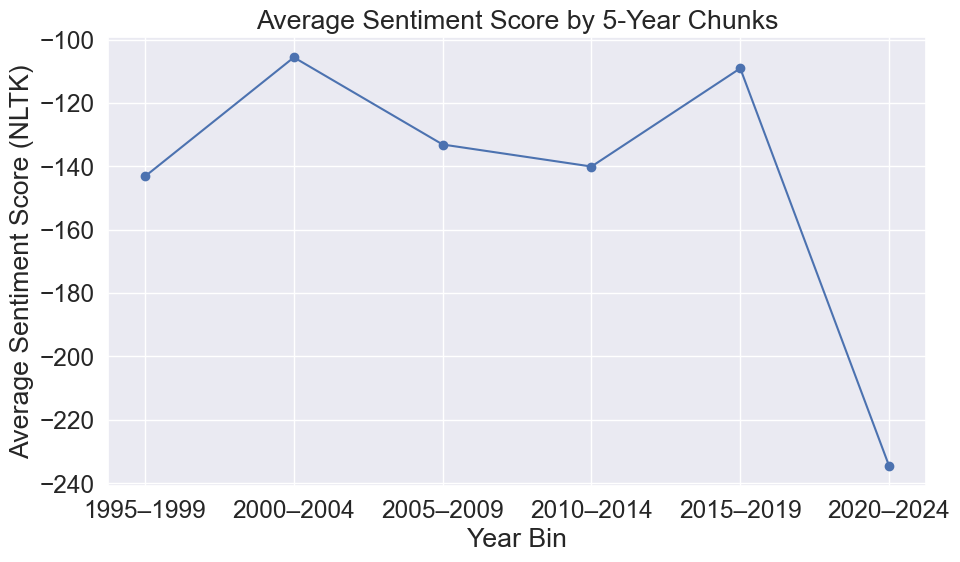

In [1192]:
# Aggregate sentiment scores by YearBin
sentiment_by_yearbin = df_uk.groupby('Year_Chunk')['SentimentScore_nltk'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sentiment_by_yearbin['Year_Chunk'], sentiment_by_yearbin['SentimentScore_nltk'], marker='o')
plt.title('Average Sentiment Score by 5-Year Chunks')
plt.xlabel('Year Bin')
plt.ylabel('Average Sentiment Score (NLTK)')
plt.grid(True)
plt.tight_layout()
plt.show()

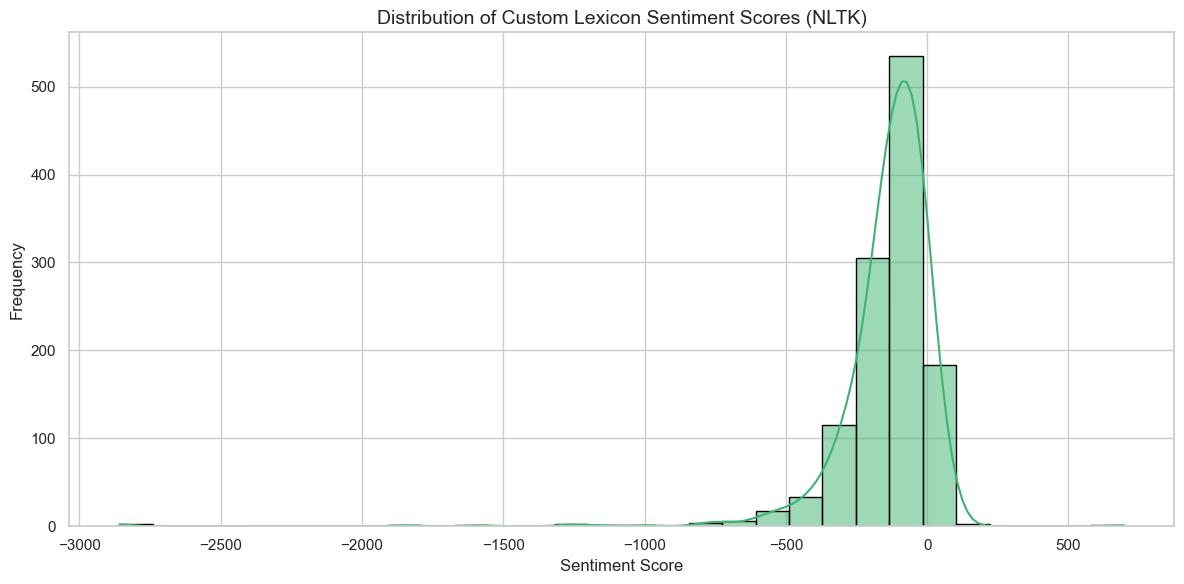

<Figure size 640x480 with 0 Axes>

In [1194]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_uk,
    x="SentimentScore_nltk",
    bins=30,
    kde=True,
    color="mediumseagreen",
    edgecolor="black"
)
plt.title("Distribution of Custom Lexicon Sentiment Scores (NLTK)", fontsize=14)
plt.xlabel("Sentiment Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()
plt.savefig("nltk_sentiment_scores.png", dpi=300, bbox_inches='tight')

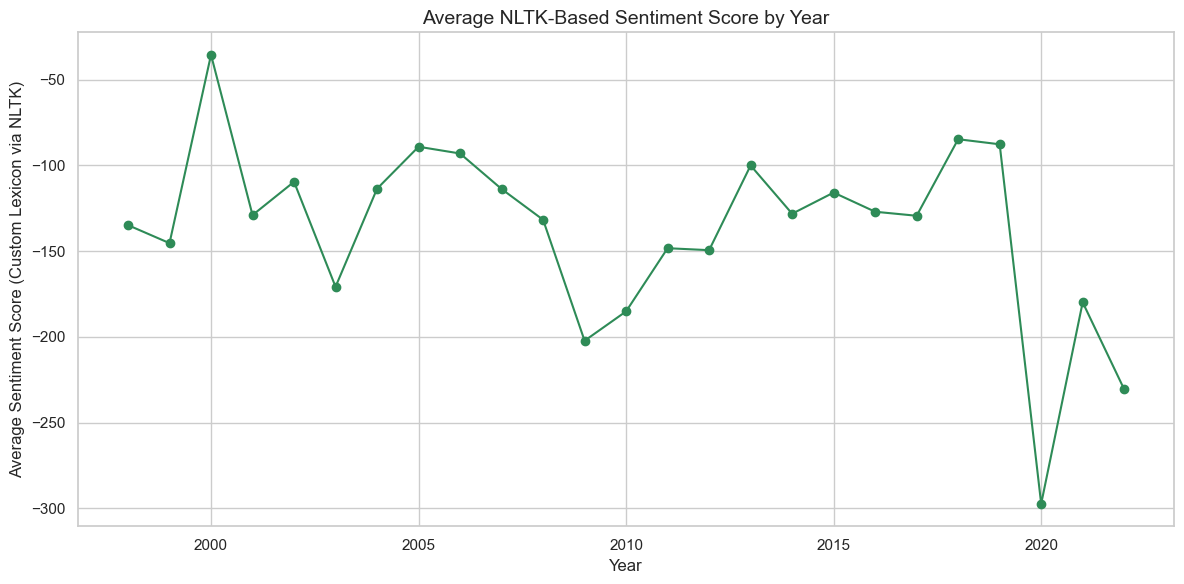

<Figure size 640x480 with 0 Axes>

In [1196]:
import matplotlib.pyplot as plt

# Group by Year and calculate average sentiment
yearly_nltk_avg = df_uk.groupby("Year")["SentimentScore_nltk"].mean().reset_index()

#Plot line graph
plt.figure(figsize=(12, 6))
plt.plot(yearly_nltk_avg["Year"], yearly_nltk_avg["SentimentScore_nltk"], marker='o', linestyle='-', color='seagreen')

plt.title("Average NLTK-Based Sentiment Score by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Sentiment Score (Custom Lexicon via NLTK)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("nltk_sentiment_yearly.png", dpi=300, bbox_inches='tight')

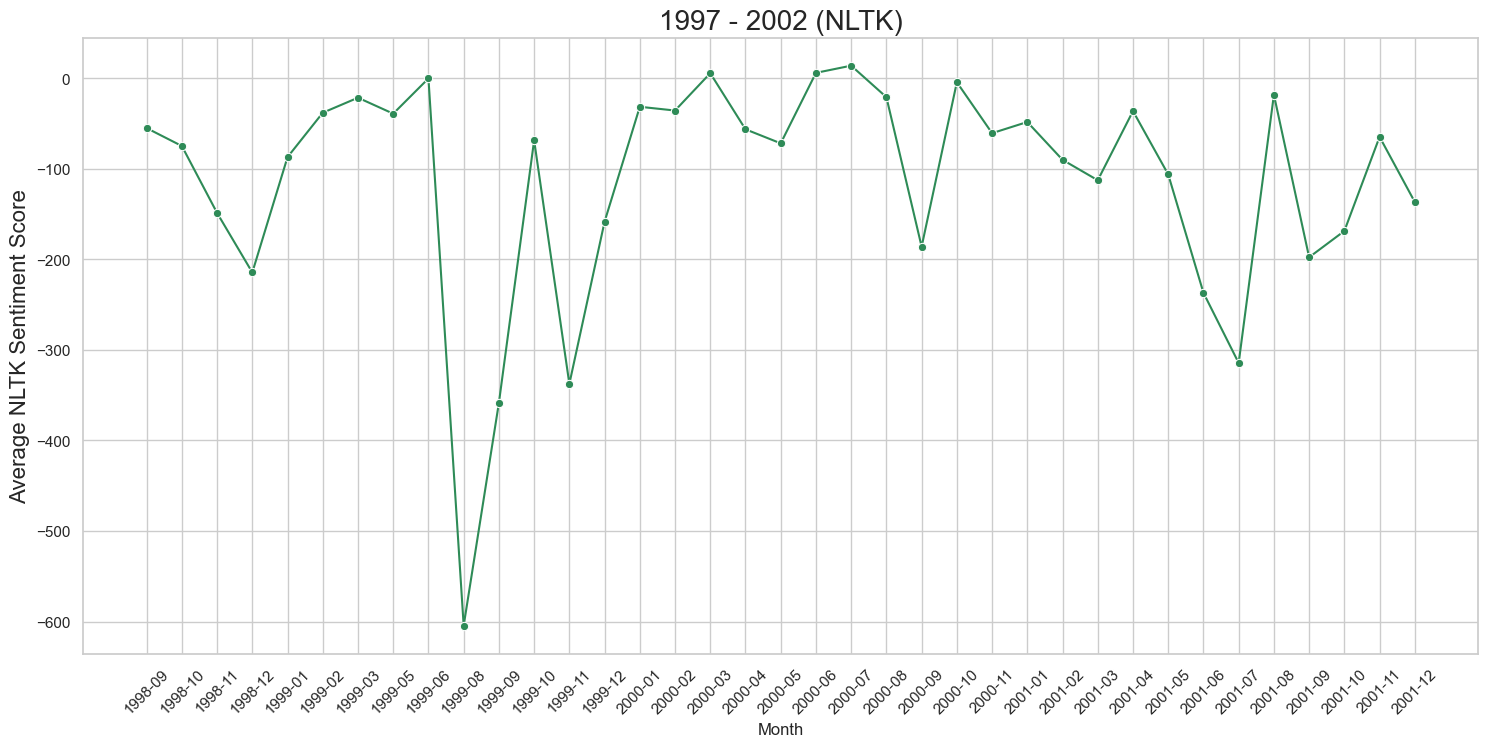

In [1198]:
# 1997-2002 (NLTK)
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk.loc[(df_uk['Year'] >= 1997) & (df_uk['Year'] < 2002)].copy()
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg_nltk = period_df.groupby('Month')['SentimentScore_nltk'].mean().reset_index()
sns.lineplot(data=monthly_avg_nltk, x='Month', y='SentimentScore_nltk', marker='o', color='seagreen', ax=ax)
ax.set_title("1997 - 2002 (NLTK)", fontsize=20)
ax.set_ylabel("Average NLTK Sentiment Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()

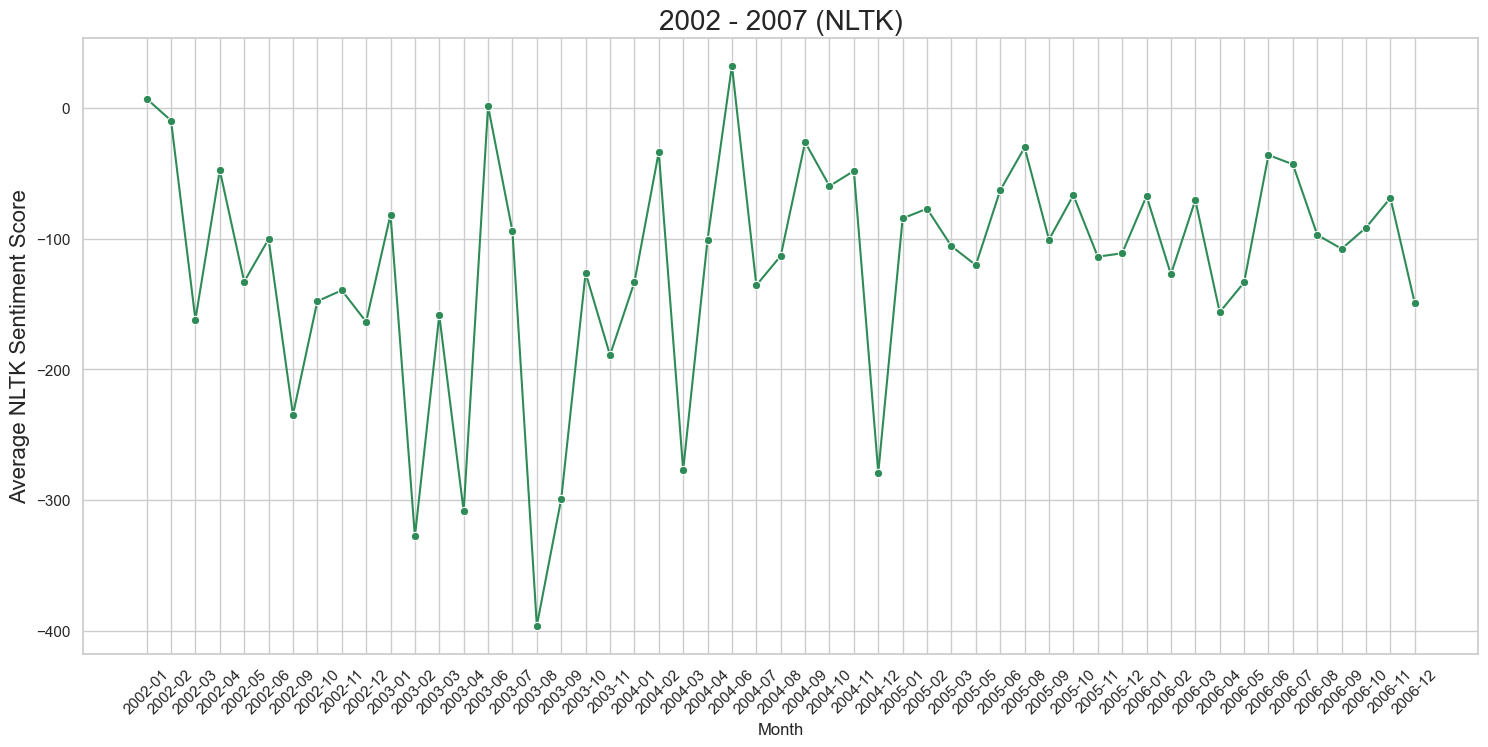

In [1200]:
# 2002-2007 (NLTK)
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk.loc[(df_uk['Year'] >= 2002) & (df_uk['Year'] < 2007)].copy()
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg_nltk = period_df.groupby('Month')['SentimentScore_nltk'].mean().reset_index()
sns.lineplot(data=monthly_avg_nltk, x='Month', y='SentimentScore_nltk', marker='o', color='seagreen', ax=ax)
ax.set_title("2002 - 2007 (NLTK)", fontsize=20)
ax.set_ylabel("Average NLTK Sentiment Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()


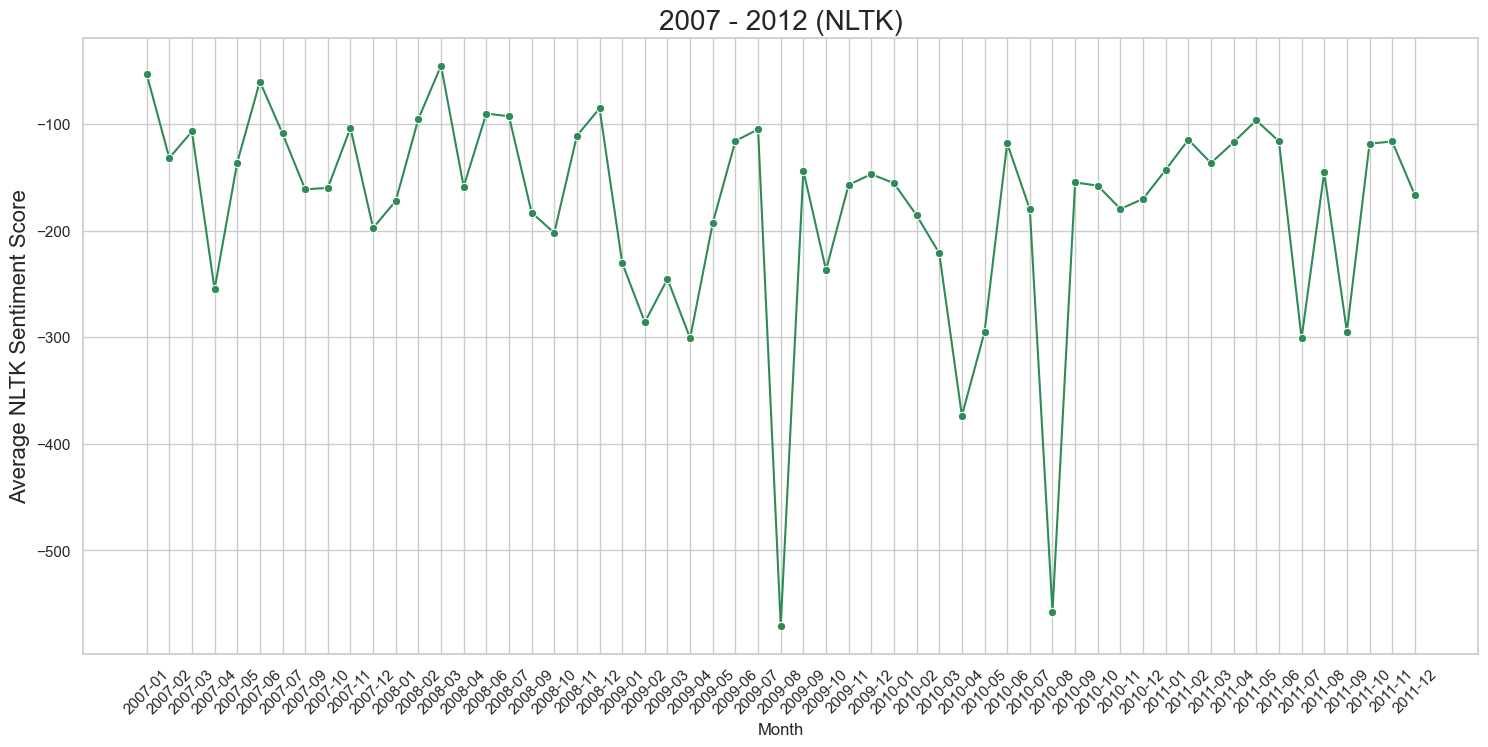

In [1202]:
# 2007-2012 (NLTK)
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk.loc[(df_uk['Year'] >= 2007) & (df_uk['Year'] < 2012)].copy()
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg_nltk = period_df.groupby('Month')['SentimentScore_nltk'].mean().reset_index()
sns.lineplot(data=monthly_avg_nltk, x='Month', y='SentimentScore_nltk', marker='o', color='seagreen', ax=ax)
ax.set_title("2007 - 2012 (NLTK)", fontsize=20)
ax.set_ylabel("Average NLTK Sentiment Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()

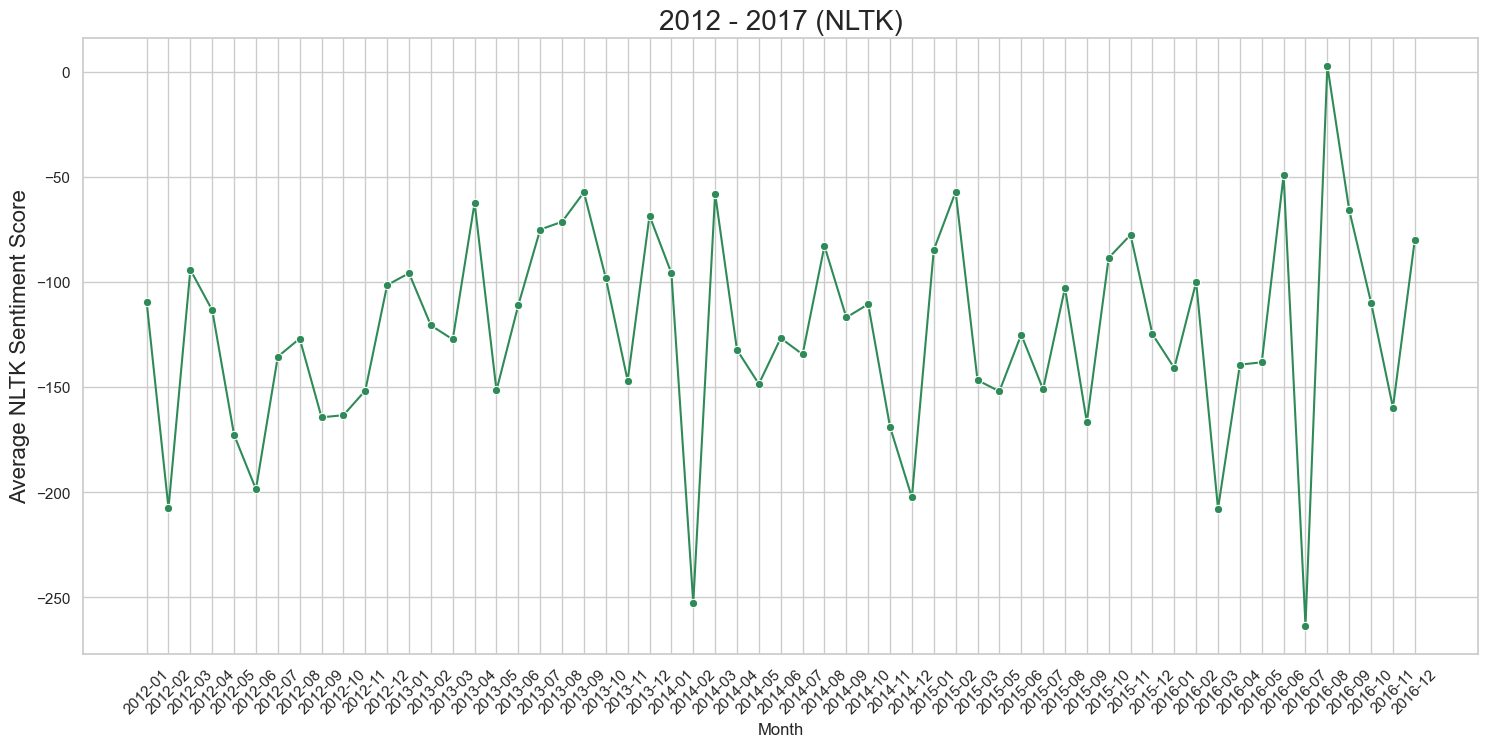

In [1204]:
# 2012-2017 (NLTK)
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk.loc[(df_uk['Year'] >= 2012) & (df_uk['Year'] < 2017)].copy()
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg_nltk = period_df.groupby('Month')['SentimentScore_nltk'].mean().reset_index()
sns.lineplot(data=monthly_avg_nltk, x='Month', y='SentimentScore_nltk', marker='o', color='seagreen', ax=ax)
ax.set_title("2012 - 2017 (NLTK)", fontsize=20)
ax.set_ylabel("Average NLTK Sentiment Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()

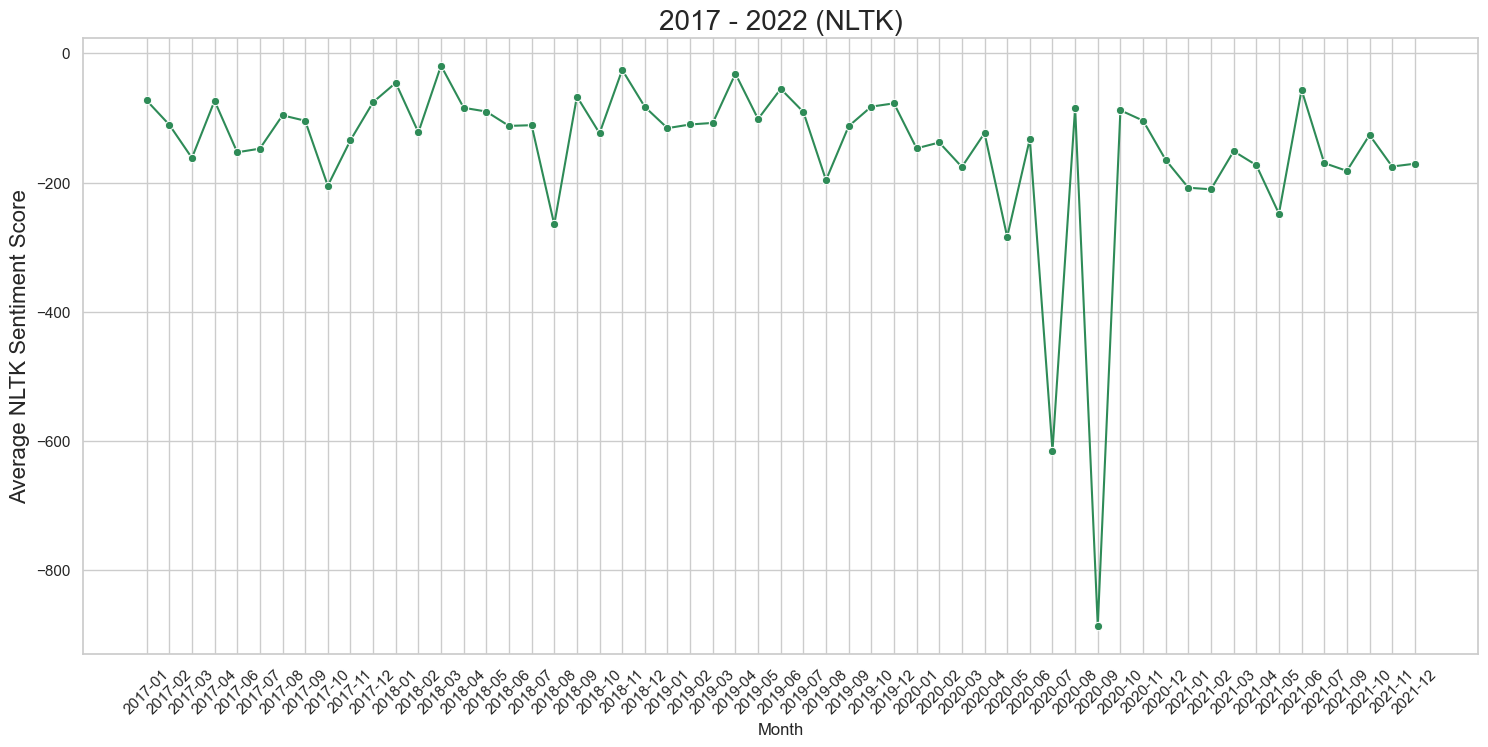

In [1206]:
# 2017-2022 (NLTK)
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk.loc[(df_uk['Year'] >= 2017) & (df_uk['Year'] < 2022)].copy()
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg_nltk = period_df.groupby('Month')['SentimentScore_nltk'].mean().reset_index()
sns.lineplot(data=monthly_avg_nltk, x='Month', y='SentimentScore_nltk', marker='o', color='seagreen', ax=ax)
ax.set_title("2017 - 2022 (NLTK)", fontsize=20)
ax.set_ylabel("Average NLTK Sentiment Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()

#### TextBlob Sentiment Analysis

In [1210]:
%%time
# Demo: Using a self defined function with Textblob to calculate polarity and subjectivity.
def generate_polarity_subjectivity(dfs):
    dft2 = TextBlob(dfs).sentiment
    return pd.Series([dft2[0], dft2[1]])

# Apply the function to the data and add two new columns
df_uk[['polarity','subjectivity']] = df_uk['Text'].apply(generate_polarity_subjectivity)
df_uk.head()

CPU times: total: 8.33 s
Wall time: 8.59 s


Reference         Country       Date  Year      Month  \
0  r980915a_BOE  United Kingdom 1998-09-15  1998  September   
1  r981021b_BOE  United Kingdom 1998-10-21  1998    October   
2  r981021a_BOE  United Kingdom 1998-10-21  1998    October   
3  r981101a_BOE  United Kingdom 1998-11-01  1998   November   
4  r981101b_BOE  United Kingdom 1998-11-01  1998   November   

                                               Title   Author Isgov  \
0                                             Speech   George   Yes   
1                                  Britain in Europe   George   Yes   
2  Impact of the recent turbulence in internation...     King    No   
3        Economic policy, with and without forecasts     Budd    No   
4  Inflation targeting in practice: the UK experi...  Vickers    No   

                                                Text IsGov  \
0  thank chairman actually pleased opportunity re...   Yes   
1  great pleasure beautiful city bruges honoured ...   Yes   
2  industries suffered volatility british economy...    No   
3  topic evening use forecasts economic policymak...    No   
4  six years ago week sterling left exchange rate...    No   

   SentimentScore_nltk  PositiveCount_nltk  NegativeCount_nltk  \
0                -54.9                51.0                86.0   
1                -51.8                92.0               145.0   
2                -97.6                36.0               107.0   
3               -153.8                52.0               186.0   
4               -219.8                54.0               242.0   

   TotalWords_nltk Year_Chunk  polarity  subjectivity  
0           1142.0  1995–1999  0.064537      0.427930  
1           2072.0  1995–1999  0.062791      0.356223  
2           1225.0  1995–1999  0.067741      0.380480  
3           2332.0  1995–1999  0.055705      0.465611  
4           2533.0  1995–1999  0.048789      0.387690

In [1212]:
df_uk = df_uk.rename(columns={'polarity': 'polarity_textblob', 'subjectivity' :'subjectivity_textblob'})

In [1214]:
%%time
# Demo: Frequency distribution review of a single speech.

import nltk
nltk.download('punkt_tab')

# Tokenise the text data.
stop_words=set(stopwords.words('english'))
filtered_text = []

# Example speech using iloc to reference (Hint: Can be used in loops if required).
tokenized_word = word_tokenize(df_uk.iloc[0,8])

# Filter the tokenised words.
for each_word in tokenized_word:
    if each_word.lower() not in stop_words and each_word.isalpha():
        filtered_text.append(each_word.lower())

# Display the filtered list.
#print('Tokenised list without stop words: {}'.format(filtered_text))

# Create a frequency distribution object.
freq_dist_of_words = FreqDist(filtered_text)

# Show the five most common elements in the data set.
freq_dist_of_words.most_common(10)

CPU times: total: 31.2 ms
Wall time: 61.2 ms


[nltk_data] Downloading package punkt_tab to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[('economy', 26),
 ('inflation', 22),
 ('growth', 15),
 ('policy', 13),
 ('demand', 13),
 ('employment', 10),
 ('whole', 9),
 ('sectors', 9),
 ('know', 8),
 ('capacity', 8)]

#### Polarity Histogram

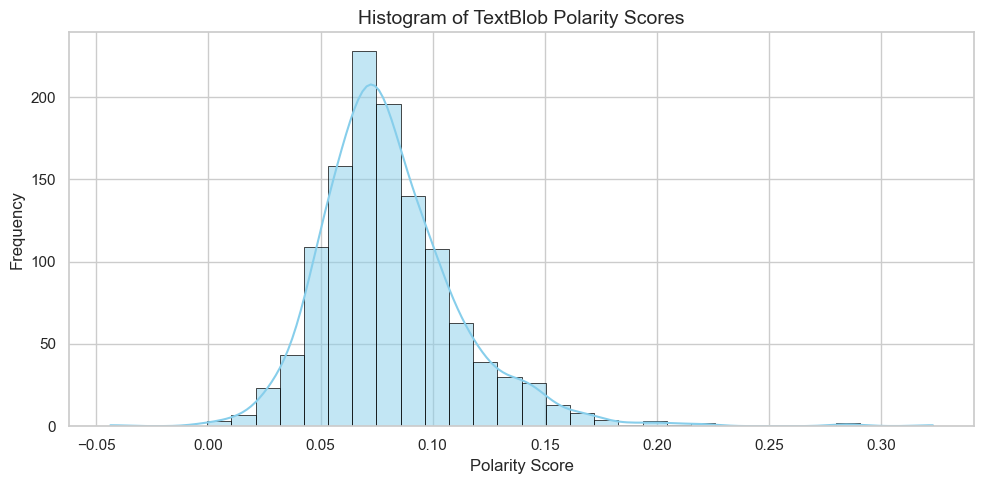

In [1217]:
# Calculate number of bins using the square-root rule
num_bins = int(np.sqrt(len(df_uk)))

# Plot using seaborn to include KDE
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_uk,
    x='polarity_textblob',
    bins=num_bins,
    kde=True,                      # This adds the smooth line
    color='skyblue',
    edgecolor='black',
    linewidth=0.5
)

plt.title('Histogram of TextBlob Polarity Scores', fontsize=14)
plt.xlabel('Polarity Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("histogram_textblob_polarity_scores.png", dpi=300, bbox_inches='tight')
plt.show()


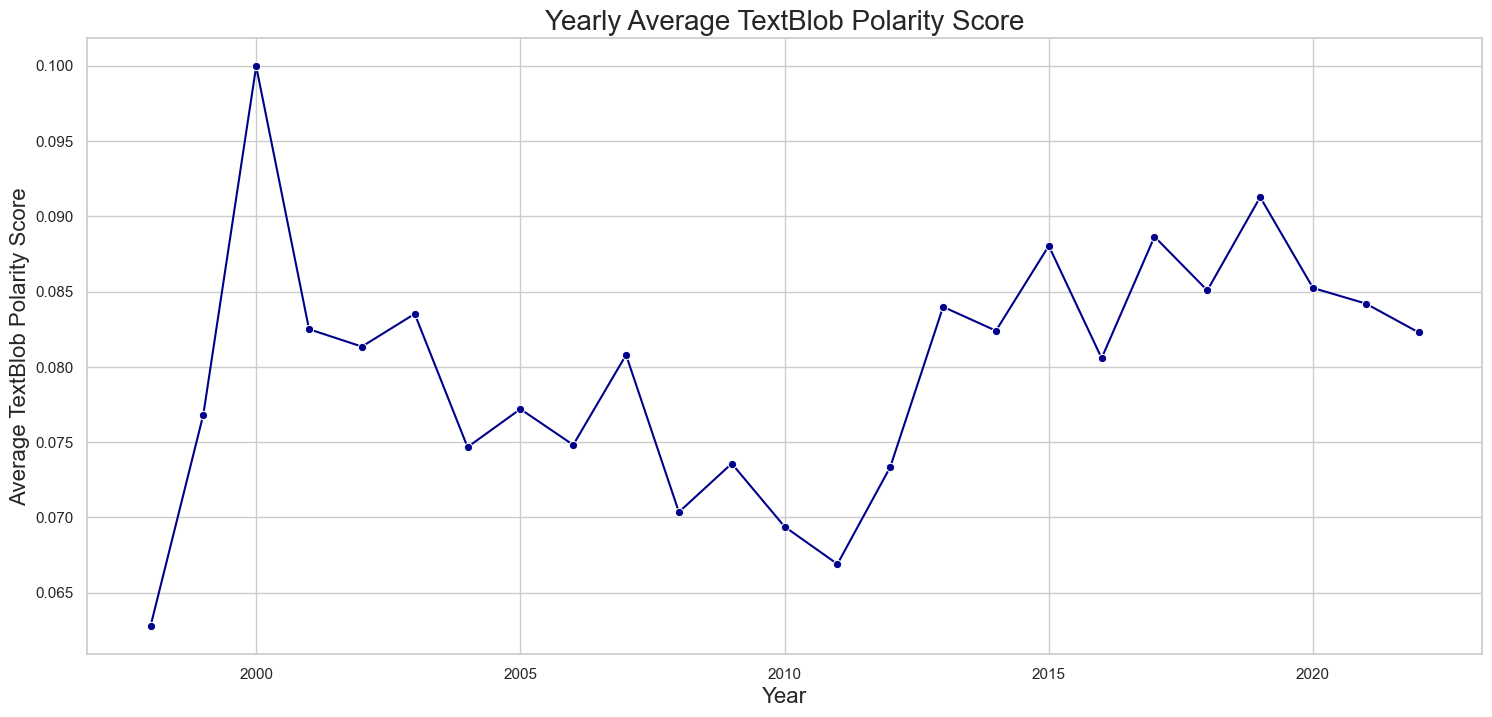

In [1219]:
# Full Yearly Distribution (TextBlob)
fig, ax = plt.subplots(figsize=(18, 8))
yearly_avg_textblob = df_uk.groupby('Year')['polarity_textblob'].mean().reset_index()
sns.lineplot(data=yearly_avg_textblob, x='Year', y='polarity_textblob', marker='o', color='darkblue', ax=ax)
ax.set_title("Yearly Average TextBlob Polarity Score", fontsize=20)
ax.set_ylabel("Average TextBlob Polarity Score", fontsize=16)
ax.set_xlabel("Year", fontsize=16)
ax.tick_params(axis='x')
plt.grid(True)
plt.show()


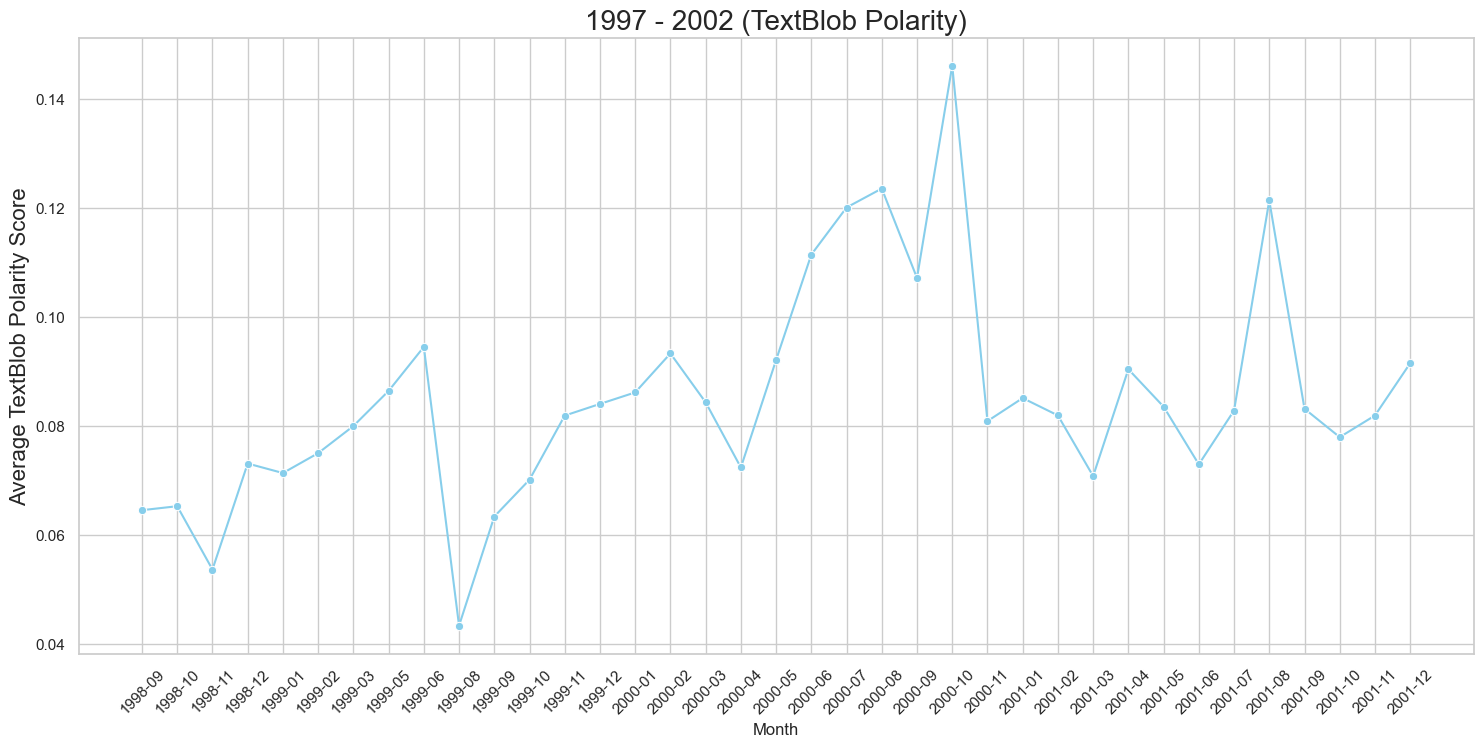

In [1221]:
# 1997-2002 (TextBlob)
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk.loc[(df_uk['Year'] >= 1997) & (df_uk['Year'] < 2002)].copy()
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg_textblob = period_df.groupby('Month')['polarity_textblob'].mean().reset_index()
sns.lineplot(data=monthly_avg_textblob, x='Month', y='polarity_textblob', marker='o', color='skyblue', ax=ax)
ax.set_title("1997 - 2002 (TextBlob Polarity)", fontsize=20)
ax.set_ylabel("Average TextBlob Polarity Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()

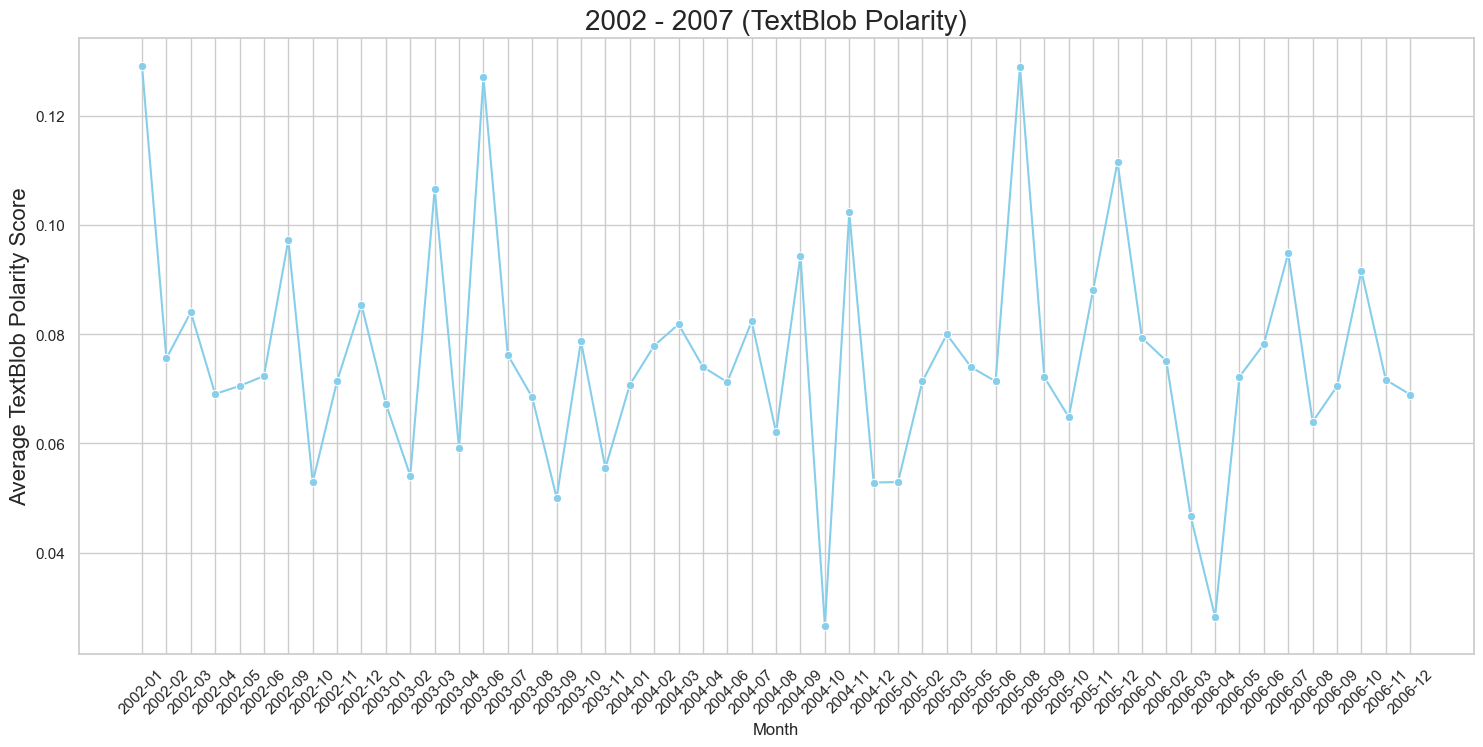

In [1223]:
# 2002-2007 (TextBlob)
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk.loc[(df_uk['Year'] >= 2002) & (df_uk['Year'] < 2007)].copy()
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg_textblob = period_df.groupby('Month')['polarity_textblob'].mean().reset_index()
sns.lineplot(data=monthly_avg_textblob, x='Month', y='polarity_textblob', marker='o', color='skyblue', ax=ax)
ax.set_title("2002 - 2007 (TextBlob Polarity)", fontsize=20)
ax.set_ylabel("Average TextBlob Polarity Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()

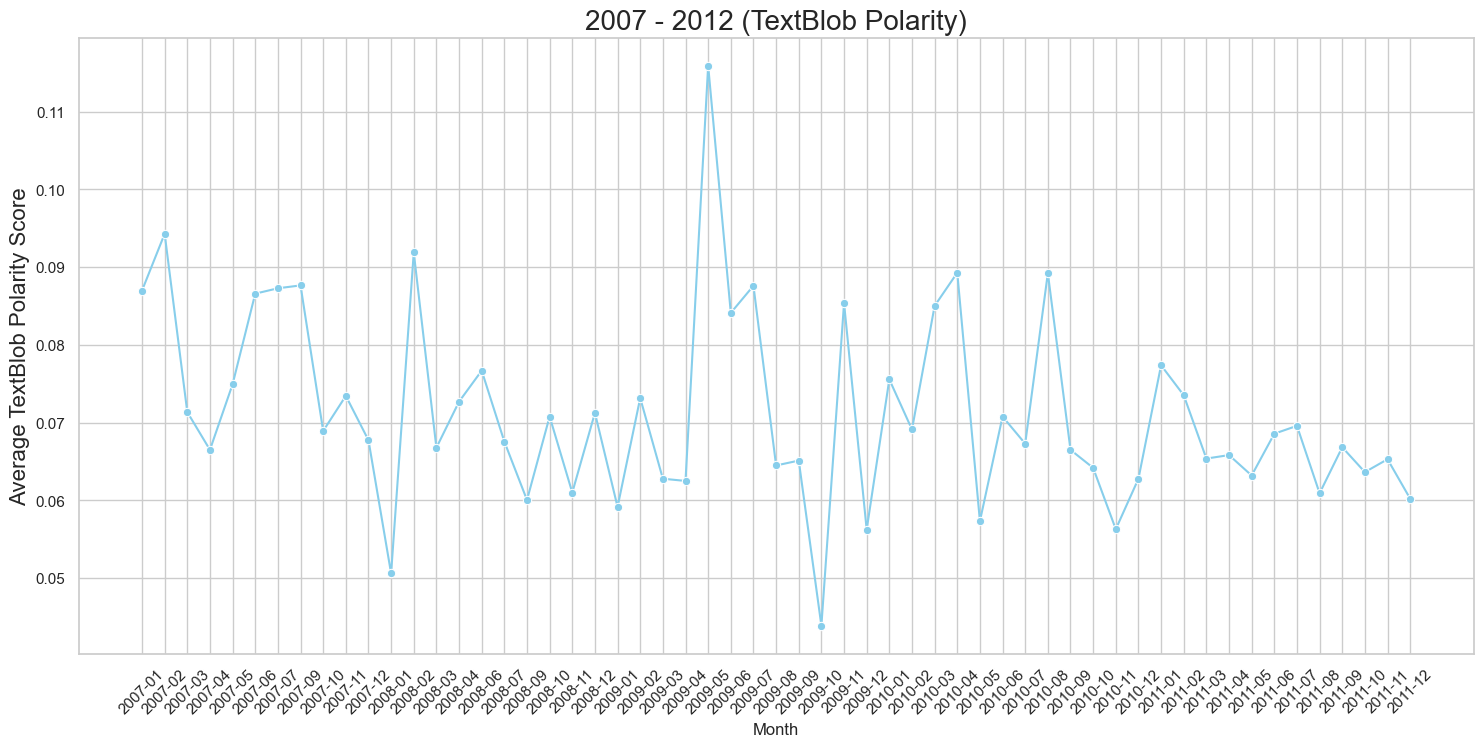

In [1225]:
# 2007-2012 (TextBlob)
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk.loc[(df_uk['Year'] >= 2007) & (df_uk['Year'] < 2012)].copy()
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg_textblob = period_df.groupby('Month')['polarity_textblob'].mean().reset_index()
sns.lineplot(data=monthly_avg_textblob, x='Month', y='polarity_textblob', marker='o', color='skyblue', ax=ax)
ax.set_title("2007 - 2012 (TextBlob Polarity)", fontsize=20)
ax.set_ylabel("Average TextBlob Polarity Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()

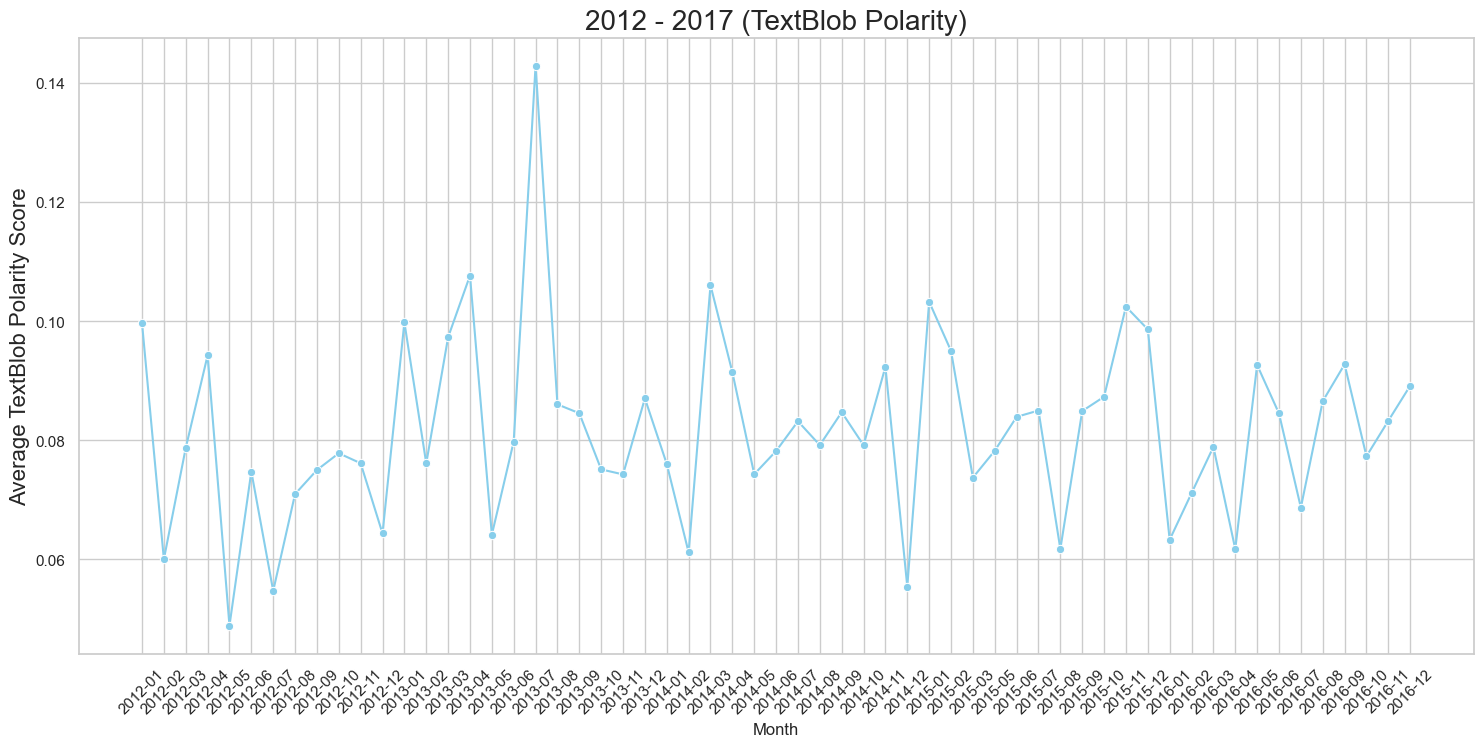

In [1227]:
# 2012-2017 (TextBlob)
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk.loc[(df_uk['Year'] >= 2012) & (df_uk['Year'] < 2017)].copy()
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg_textblob = period_df.groupby('Month')['polarity_textblob'].mean().reset_index()
sns.lineplot(data=monthly_avg_textblob, x='Month', y='polarity_textblob', marker='o', color='skyblue', ax=ax)
ax.set_title("2012 - 2017 (TextBlob Polarity)", fontsize=20)
ax.set_ylabel("Average TextBlob Polarity Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()

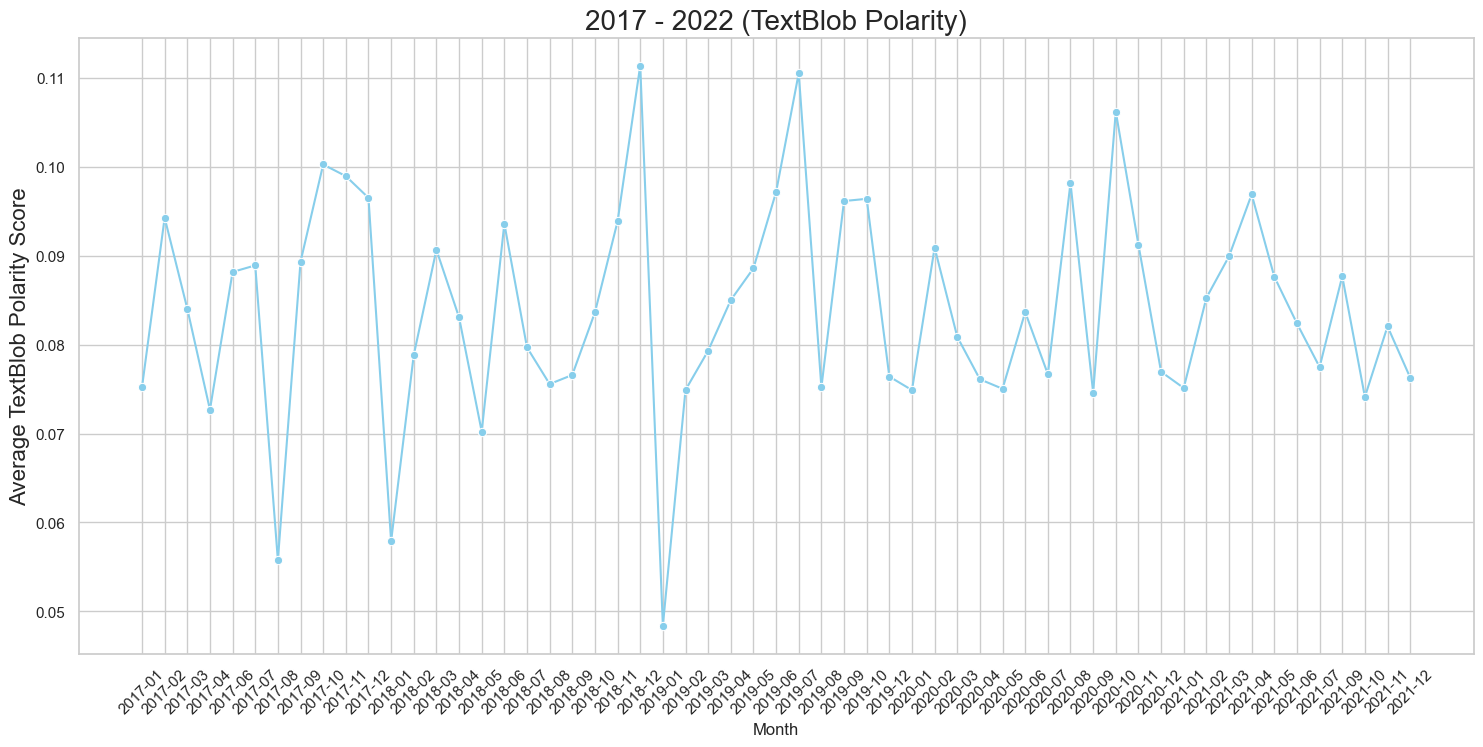

In [1229]:
# 2017-2022 (TextBlob)
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk.loc[(df_uk['Year'] >= 2017) & (df_uk['Year'] < 2022)].copy()
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg_textblob = period_df.groupby('Month')['polarity_textblob'].mean().reset_index()
sns.lineplot(data=monthly_avg_textblob, x='Month', y='polarity_textblob', marker='o', color='skyblue', ax=ax)
ax.set_title("2017 - 2022 (TextBlob Polarity)", fontsize=20)
ax.set_ylabel("Average TextBlob Polarity Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()

In [1231]:
df_uk['polarity_textblob'].describe()

count    1209.000000
mean        0.081110
std         0.031971
min        -0.043709
25%         0.061064
50%         0.076737
75%         0.096477
max         0.323077
Name: polarity_textblob, dtype: float64

#### FinBERT Analysis

In [1234]:
# Import all the necessary packages.
!pip install transformers
!pip install torch torchvision torchaudio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import transformers
import nltk
nltk.download('punkt')

from transformers import BertTokenizer, BertForSequenceClassification

print(transformers.__version__)
print(torch.__version__)

4.51.3
2.7.0+cpu


[nltk_data] Downloading package punkt to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [1235]:
print(df_uk.columns.tolist())


['Reference', 'Country', 'Date', 'Year', 'Month', 'Title', 'Author', 'Isgov', 'Text', 'IsGov', 'SentimentScore_nltk', 'PositiveCount_nltk', 'NegativeCount_nltk', 'TotalWords_nltk', 'Year_Chunk', 'polarity_textblob', 'subjectivity_textblob']


In [1236]:
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
model = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')
model.eval()  # Set model to evaluation mode


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30873, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [1237]:
print("FinBERT labels:", model.config.id2label)
# Should print: {0: 'Neutral', 1: 'Positive', 2: 'Negative'}


FinBERT labels: {0: 'Neutral', 1: 'Positive', 2: 'Negative'}


In [1238]:
def chunk_text(text, max_length=510):
    sentences = sent_tokenize(text)
    current_chunk = []
    chunks = []

    for sentence in sentences:
        current_chunk.append(sentence)
        tokenized = tokenizer(" ".join(current_chunk), return_tensors="pt", truncation=False)
        if tokenized['input_ids'].shape[1] > max_length:
            current_chunk.pop()
            chunks.append(" ".join(current_chunk))
            current_chunk = [sentence]
    if current_chunk:
        chunks.append(" ".join(current_chunk))

    return chunks


In [1239]:
def analyse_sentiment(text):
    chunks = chunk_text(text)
    sentiments = []

    for chunk in chunks:
        inputs = tokenizer(chunk, return_tensors="pt", padding=True, truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1).detach().numpy()[0]
        sentiments.append(probs)

    avg_sentiments = np.mean(sentiments, axis=0)
    sentiment_series = pd.Series({
        'neutral_finbert': avg_sentiments[0],
        'positive_finbert': avg_sentiments[1],
        'negative_finbert': avg_sentiments[2],
        'polarity_score_finbert': avg_sentiments[1] - avg_sentiments[2]
    })
    return sentiment_series


In [1246]:
from tqdm import tqdm
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

tqdm.pandas()  # Enable progress bar
finbert_results = df_uk['Text'].progress_apply(lambda x: analyse_sentiment(str(x)))
df_uk = pd.concat([df_uk.reset_index(drop=True), finbert_results], axis=1)



[nltk_data] Downloading package punkt to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 1209/1209 [07:53<00:00,  2.55it/s]


In [1248]:
yearly_sentiment = df_uk.groupby('Year')['polarity_score_finbert'].mean().reset_index()


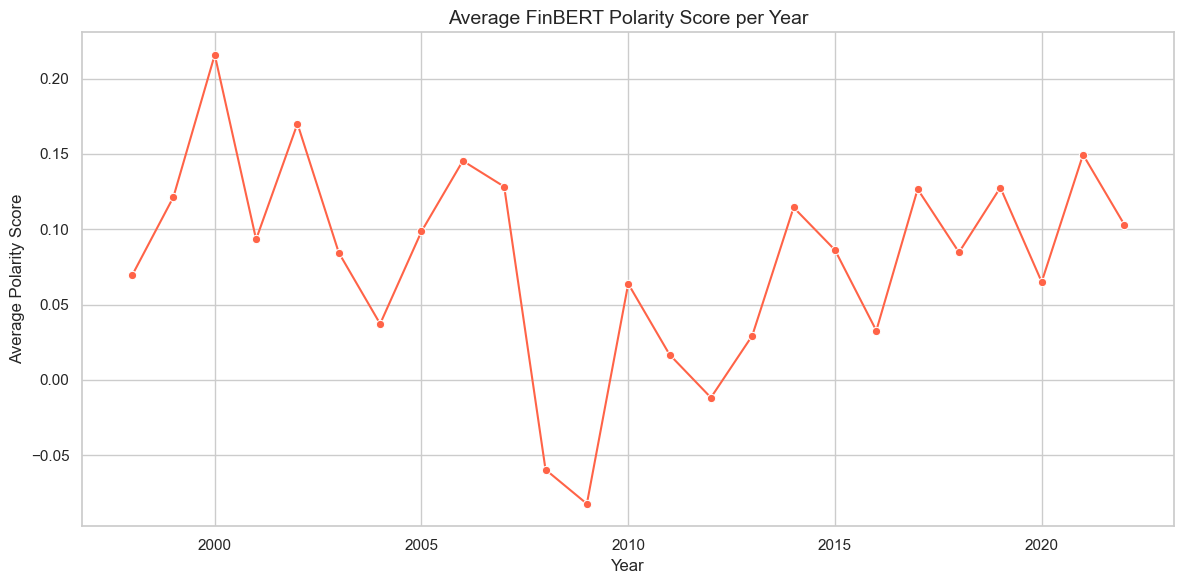

In [1250]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sentiment, x='Year', y='polarity_score_finbert', marker='o', color='tomato')

plt.title('Average FinBERT Polarity Score per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Polarity Score', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("finbert_yearly_sentiment_trend.png", dpi=300)
plt.show()


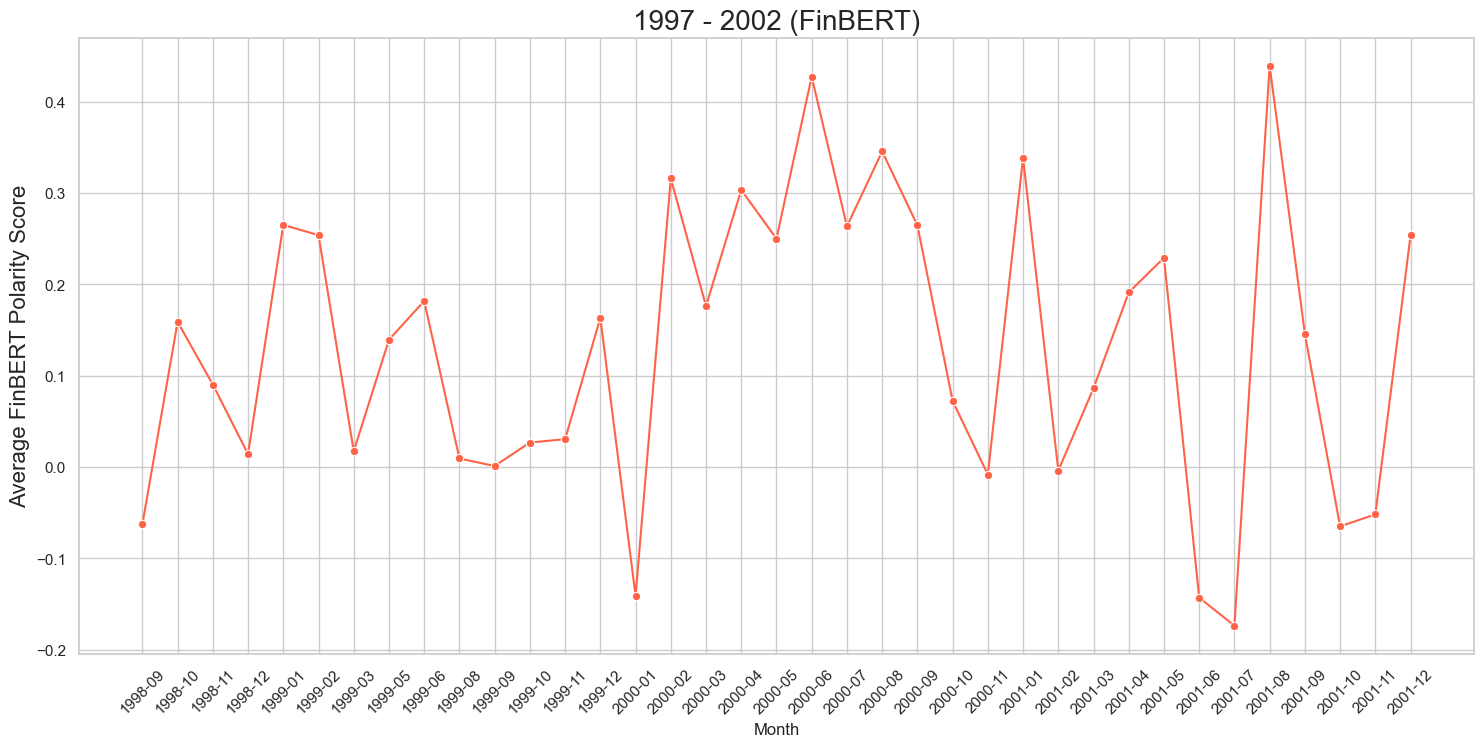

In [1252]:
# 1997-2002 (FinBERT)
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk.loc[(df_uk['Year'] >= 1997) & (df_uk['Year'] < 2002)].copy()
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg_finbert = period_df.groupby('Month')['polarity_score_finbert'].mean().reset_index()
sns.lineplot(data=monthly_avg_finbert, x='Month', y='polarity_score_finbert', marker='o', color='tomato', ax=ax)
ax.set_title("1997 - 2002 (FinBERT)", fontsize=20)
ax.set_ylabel("Average FinBERT Polarity Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()

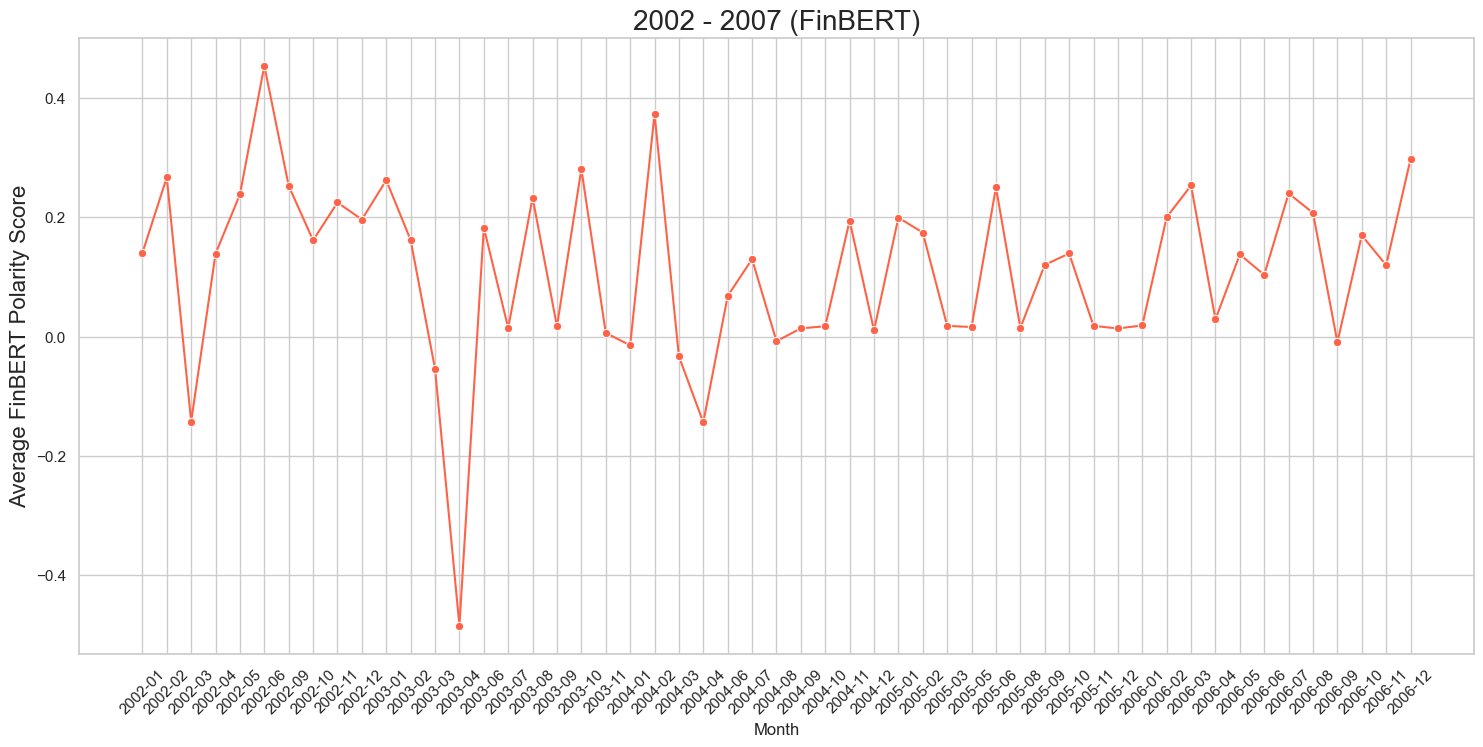

In [1254]:
# 2002-2007 (FinBERT)
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk.loc[(df_uk['Year'] >= 2002) & (df_uk['Year'] < 2007)].copy()
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg_finbert = period_df.groupby('Month')['polarity_score_finbert'].mean().reset_index()
sns.lineplot(data=monthly_avg_finbert, x='Month', y='polarity_score_finbert', marker='o', color='tomato', ax=ax)
ax.set_title("2002 - 2007 (FinBERT)", fontsize=20)
ax.set_ylabel("Average FinBERT Polarity Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()

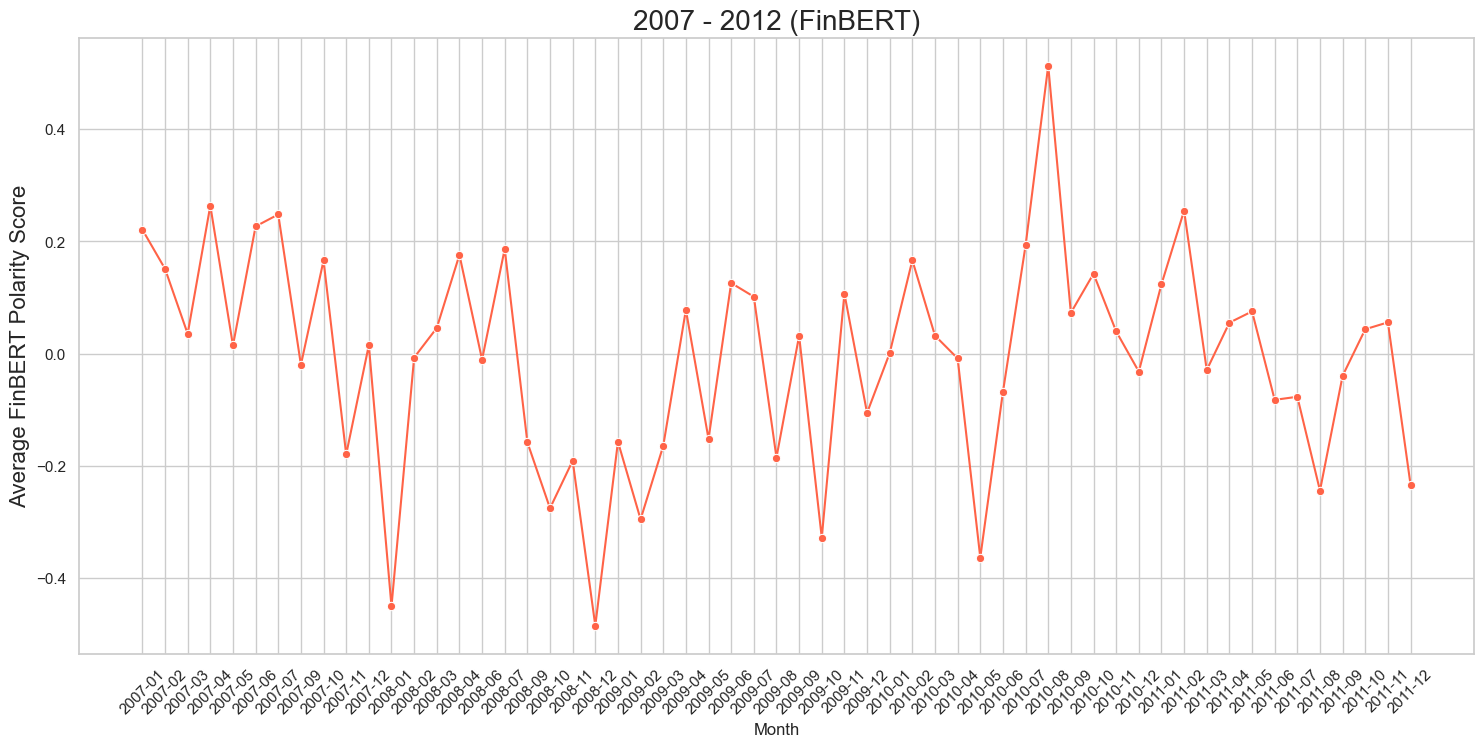

In [1256]:
# 2007-2012 (FinBERT)
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk.loc[(df_uk['Year'] >= 2007) & (df_uk['Year'] < 2012)].copy()
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg_finbert = period_df.groupby('Month')['polarity_score_finbert'].mean().reset_index()
sns.lineplot(data=monthly_avg_finbert, x='Month', y='polarity_score_finbert', marker='o', color='tomato', ax=ax)
ax.set_title("2007 - 2012 (FinBERT)", fontsize=20)
ax.set_ylabel("Average FinBERT Polarity Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()

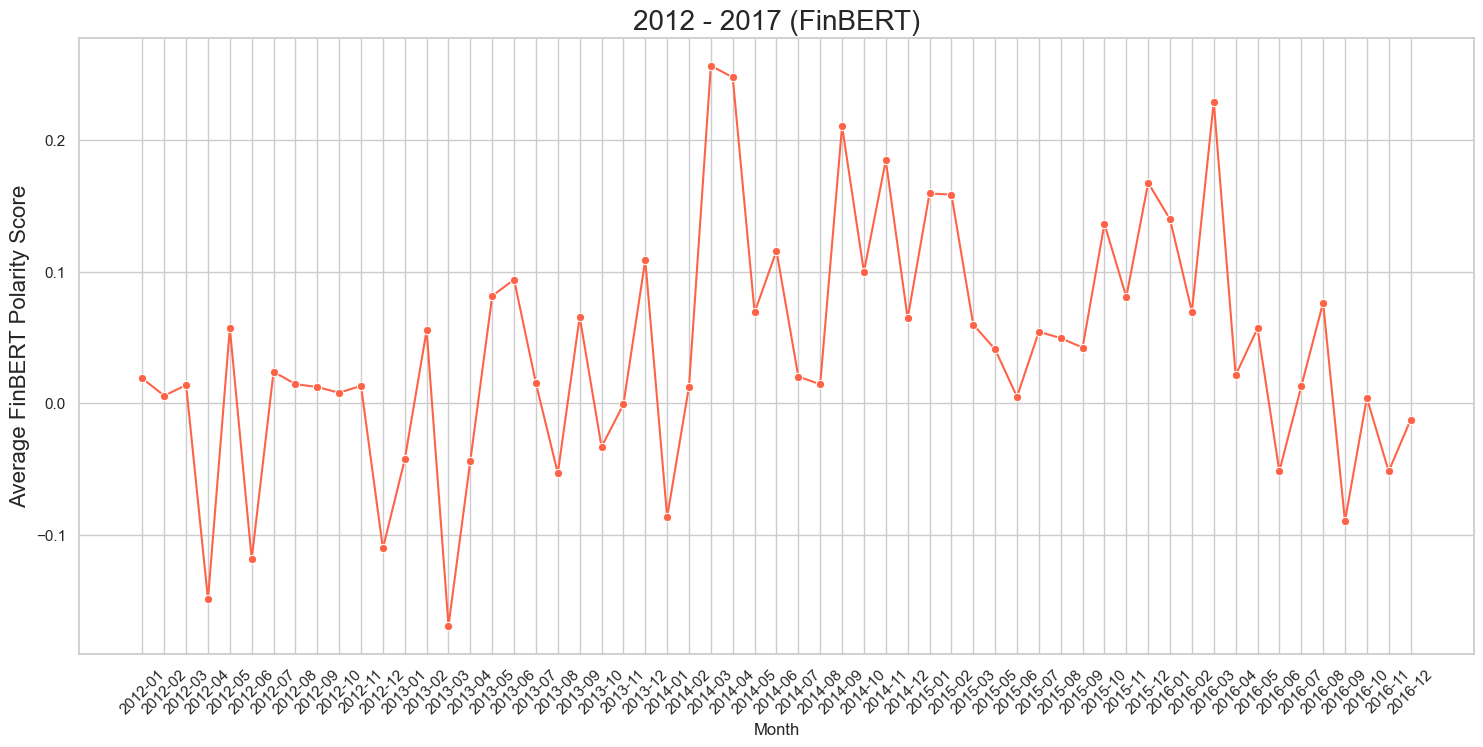

In [1258]:
# 2007-2012 (FinBERT)
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk.loc[(df_uk['Year'] >= 2012) & (df_uk['Year'] < 2017)].copy()
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg_finbert = period_df.groupby('Month')['polarity_score_finbert'].mean().reset_index()
sns.lineplot(data=monthly_avg_finbert, x='Month', y='polarity_score_finbert', marker='o', color='tomato', ax=ax)
ax.set_title("2012 - 2017 (FinBERT)", fontsize=20)
ax.set_ylabel("Average FinBERT Polarity Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()

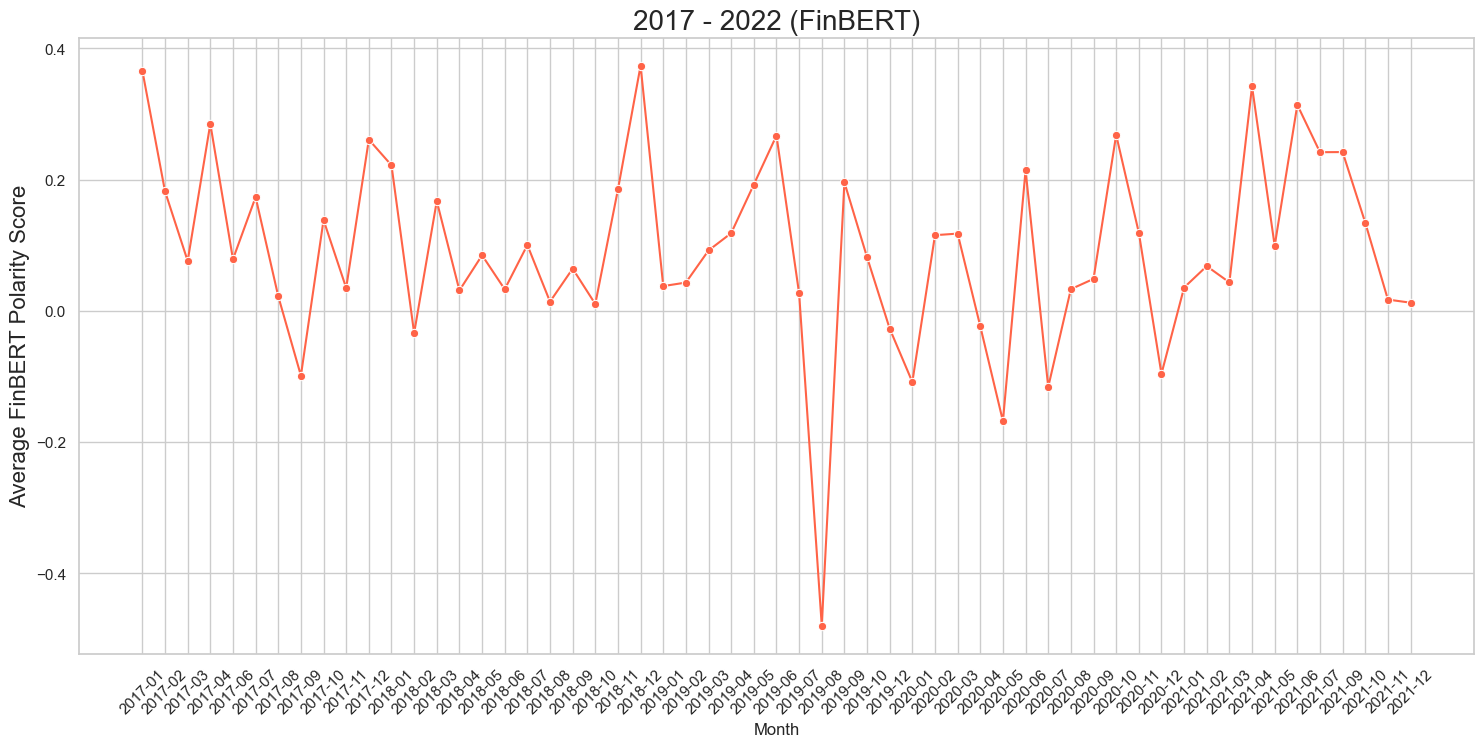

In [1260]:
# 2017-2022 (FinBERT)
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk.loc[(df_uk['Year'] >= 2017) & (df_uk['Year'] < 2022)].copy()
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg_finbert = period_df.groupby('Month')['polarity_score_finbert'].mean().reset_index()
sns.lineplot(data=monthly_avg_finbert, x='Month', y='polarity_score_finbert', marker='o', color='tomato', ax=ax)
ax.set_title("2017 - 2022 (FinBERT)", fontsize=20)
ax.set_ylabel("Average FinBERT Polarity Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()

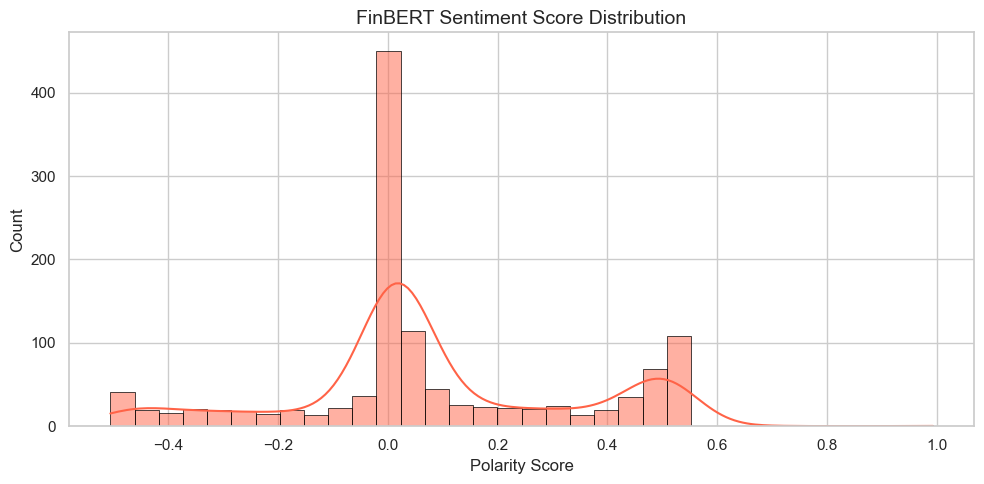

In [1262]:
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_uk,
    x='polarity_score_finbert',
    bins=34,
    kde=True,               # ← This adds the smooth line!
    color='tomato',
    edgecolor='black',
    linewidth=0.5
)

plt.title('FinBERT Sentiment Score Distribution', fontsize=14)
plt.xlabel('Polarity Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig("finbert_polarity_distribution.png", dpi=300)
plt.show()



In [1264]:
df_uk.head()

Reference         Country       Date  Year      Month  \
0  r980915a_BOE  United Kingdom 1998-09-15  1998  September   
1  r981021b_BOE  United Kingdom 1998-10-21  1998    October   
2  r981021a_BOE  United Kingdom 1998-10-21  1998    October   
3  r981101a_BOE  United Kingdom 1998-11-01  1998   November   
4  r981101b_BOE  United Kingdom 1998-11-01  1998   November   

                                               Title   Author Isgov  \
0                                             Speech   George   Yes   
1                                  Britain in Europe   George   Yes   
2  Impact of the recent turbulence in internation...     King    No   
3        Economic policy, with and without forecasts     Budd    No   
4  Inflation targeting in practice: the UK experi...  Vickers    No   

                                                Text IsGov  ...  \
0  thank chairman actually pleased opportunity re...   Yes  ...   
1  great pleasure beautiful city bruges honoured ...   Yes  ...   
2  industries suffered volatility british economy...    No  ...   
3  topic evening use forecasts economic policymak...    No  ...   
4  six years ago week sterling left exchange rate...    No  ...   

   PositiveCount_nltk  NegativeCount_nltk  TotalWords_nltk  Year_Chunk  \
0                51.0                86.0           1142.0   1995–1999   
1                92.0               145.0           2072.0   1995–1999   
2                36.0               107.0           1225.0   1995–1999   
3                52.0               186.0           2332.0   1995–1999   
4                54.0               242.0           2533.0   1995–1999   

  polarity_textblob  subjectivity_textblob  neutral_finbert  positive_finbert  \
0          0.064537               0.427930         0.737529          0.099846   
1          0.062791               0.356223         0.532217          0.466339   
2          0.067741               0.380480         0.808452          0.022303   
3          0.055705               0.465611         0.983587          0.015397   
4          0.048789               0.387690         0.983661          0.015350   

   negative_finbert  polarity_score_finbert  
0          0.162625               -0.062779  
1          0.001444                0.464896  
2          0.169245               -0.146942  
3          0.001015                0.014382  
4          0.000989                0.014361  

[5 rows x 21 columns]

#### VADER SENTIMENT

In [1267]:
df_uk

Reference         Country       Date  Year      Month  \
0     r980915a_BOE  United Kingdom 1998-09-15  1998  September   
1     r981021b_BOE  United Kingdom 1998-10-21  1998    October   
2     r981021a_BOE  United Kingdom 1998-10-21  1998    October   
3     r981101a_BOE  United Kingdom 1998-11-01  1998   November   
4     r981101b_BOE  United Kingdom 1998-11-01  1998   November   
...            ...             ...        ...   ...        ...   
1204  r220523a_BOE  United Kingdom 2022-05-23  2022        May   
1205  r220525a_BOE  United Kingdom 2022-05-25  2022        May   
1206  r220526a_BOE  United Kingdom 2022-05-26  2022        May   
1207  r220608a_BOE  United Kingdom 2022-06-08  2022       June   
1208  r221020a_BOE  United Kingdom 2022-10-20  2022    October   

                                                  Title     Author Isgov  \
0                                                Speech     George   Yes   
1                                     Britain in Europe     George   Yes   
2     Impact of the recent turbulence in internation...       King    No   
3           Economic policy, with and without forecasts       Budd    No   
4     Inflation targeting in practice: the UK experi...    Vickers    No   
...                                                 ...        ...   ...   
1204      Opening remarks at OeNB monetary policy panel     Bailey    No   
1205  What will operational resilience look like goi...  Mackinnon    No   
1206  Four Rs: Creating the conditions for long-term...     Gerken    No   
1207  Climate Biennial Exploratory Scenario: Insuran...      Claus    No   
1208       The inflationary consequences of real shocks  Broadbent    No   

                                                   Text IsGov  ...  \
0     thank chairman actually pleased opportunity re...   Yes  ...   
1     great pleasure beautiful city bruges honoured ...   Yes  ...   
2     industries suffered volatility british economy...    No  ...   
3     topic evening use forecasts economic policymak...    No  ...   
4     six years ago week sterling left exchange rate...    No  ...   
...                                                 ...   ...  ...   
1204  time large economic shocks particularly large ...    No  ...   
1205  important business services impact tolerances ...    No  ...   
1206  asset eligibility liability eligibility calcul...    No  ...   
1207  thank inviting speak today abis climate summit...    No  ...   
1208  covid19 pandemic russias invasion ukraine infl...    No  ...   

      PositiveCount_nltk  NegativeCount_nltk  TotalWords_nltk  Year_Chunk  \
0                   51.0                86.0           1142.0   1995–1999   
1                   92.0               145.0           2072.0   1995–1999   
2                   36.0               107.0           1225.0   1995–1999   
3                   52.0               186.0           2332.0   1995–1999   
4                   54.0               242.0           2533.0   1995–1999   
...                  ...                 ...              ...         ...   
1204                 7.0                12.0            234.0   2020–2024   
1205                69.0               306.0           3756.0   2020–2024   
1206               122.0               653.0           7900.0   2020–2024   
1207                23.0               128.0           1165.0   2020–2024   
1208                51.0               188.0           3325.0   2020–2024   

     polarity_textblob  subjectivity_textblob  neutral_finbert  \
0             0.064537               0.427930         0.737529   
1             0.062791               0.356223         0.532217   
2             0.067741               0.380480         0.808452   
3             0.055705               0.465611         0.983587   
4             0.048789               0.387690         0.983661   
...                ...                    ...              ...   
1204          0.057218               0.393033         0.985162   
1205     

In [1269]:
# Force all entries in 'Word' column to strings, skipping bad ones
df_sentiment_words = df_sentiment_words[df_sentiment_words['Word'].apply(lambda x: isinstance(x, str))]

df_sentiment_words

Word  Negative  Positive  Uncertainty  Litigious  Strong  Weak  \
0          ABANDON         1         0            0          0       0     0   
1        ABANDONED         1         0            0          0       0     0   
2       ABANDONING         1         0            0          0       0     0   
3      ABANDONMENT         1         0            0          0       0     0   
4     ABANDONMENTS         1         0            0          0       0     0   
...            ...       ...       ...          ...        ...     ...   ...   
3874    WRONGDOING         1         0            0          0       0     0   
3875   WRONGDOINGS         1         0            0          0       0     0   
3876      WRONGFUL         1         0            0          0       0     0   
3877    WRONGFULLY         1         0            0          0       0     0   
3878       WRONGLY         1         0            0          0       0     0   

      Constraining  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
3874             0  
3875             0  
3876             0  
3877             0  
3878             0  

[3879 rows x 8 columns]

In [1271]:
custom_lexicon = {}

for _, row in df_sentiment_words.iterrows():
    word = row['Word'].lower()
    
    # Weighted score based on categories
    score = (
        row['Positive'] * 2.0 +
        row['Negative'] * -2.0 +
        row['Uncertainty'] * -0.5 +
        row['Litigious'] * -0.3 +
        row['Strong'] * 1.0 +
        row['Weak'] * -1.0 +
        row['Constraining'] * -0.5
    )
    
    # Only include non-zero scores
    if score != 0:
        custom_lexicon[word] = score

In [1273]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
analyzer.lexicon.update(custom_lexicon)

In [1275]:
# Apply VADER to each speech
df_uk['Sentiment_vader'] = df_uk['Text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df_uk


Reference         Country       Date  Year      Month  \
0     r980915a_BOE  United Kingdom 1998-09-15  1998  September   
1     r981021b_BOE  United Kingdom 1998-10-21  1998    October   
2     r981021a_BOE  United Kingdom 1998-10-21  1998    October   
3     r981101a_BOE  United Kingdom 1998-11-01  1998   November   
4     r981101b_BOE  United Kingdom 1998-11-01  1998   November   
...            ...             ...        ...   ...        ...   
1204  r220523a_BOE  United Kingdom 2022-05-23  2022        May   
1205  r220525a_BOE  United Kingdom 2022-05-25  2022        May   
1206  r220526a_BOE  United Kingdom 2022-05-26  2022        May   
1207  r220608a_BOE  United Kingdom 2022-06-08  2022       June   
1208  r221020a_BOE  United Kingdom 2022-10-20  2022    October   

                                                  Title     Author Isgov  \
0                                                Speech     George   Yes   
1                                     Britain in Europe     George   Yes   
2     Impact of the recent turbulence in internation...       King    No   
3           Economic policy, with and without forecasts       Budd    No   
4     Inflation targeting in practice: the UK experi...    Vickers    No   
...                                                 ...        ...   ...   
1204      Opening remarks at OeNB monetary policy panel     Bailey    No   
1205  What will operational resilience look like goi...  Mackinnon    No   
1206  Four Rs: Creating the conditions for long-term...     Gerken    No   
1207  Climate Biennial Exploratory Scenario: Insuran...      Claus    No   
1208       The inflationary consequences of real shocks  Broadbent    No   

                                                   Text IsGov  ...  \
0     thank chairman actually pleased opportunity re...   Yes  ...   
1     great pleasure beautiful city bruges honoured ...   Yes  ...   
2     industries suffered volatility british economy...    No  ...   
3     topic evening use forecasts economic policymak...    No  ...   
4     six years ago week sterling left exchange rate...    No  ...   
...                                                 ...   ...  ...   
1204  time large economic shocks particularly large ...    No  ...   
1205  important business services impact tolerances ...    No  ...   
1206  asset eligibility liability eligibility calcul...    No  ...   
1207  thank inviting speak today abis climate summit...    No  ...   
1208  covid19 pandemic russias invasion ukraine infl...    No  ...   

      NegativeCount_nltk  TotalWords_nltk  Year_Chunk  polarity_textblob  \
0                   86.0           1142.0   1995–1999           0.064537   
1                  145.0           2072.0   1995–1999           0.062791   
2                  107.0           1225.0   1995–1999           0.067741   
3                  186.0           2332.0   1995–1999           0.055705   
4                  242.0           2533.0   1995–1999           0.048789   
...                  ...              ...         ...                ...   
1204                12.0            234.0   2020–2024           0.057218   
1205               306.0           3756.0   2020–2024           0.147425   
1206               653.0           7900.0   2020–2024           0.111964   
1207               128.0           1165.0   2020–2024           0.086440   
1208               188.0           3325.0   2020–2024           0.054260   

     subjectivity_textblob  neutral_finbert  positive_finbert  \
0                 0.427930         0.737529          0.099846   
1                 0.356223         0.532217          0.466339   
2                 0.380480         0.808452          0.022303   
3                 0.465611         0.983587          0.015397   
4                 0.387690         0.983661          0.015350   
...                    ...              ...               ...   
1204              0.393033         0.985162          0.001903   
1205              0.545723   

In [1276]:
# Group by year and compute average sentiment
yearly_sentiment = df_uk.groupby('Year')['Sentiment_vader'].mean().reset_index()

# Sort by year (optional)
yearly_sentiment = yearly_sentiment.sort_values('Year')
yearly_sentiment

Year  Sentiment_vader
0   1998        -0.721475
1   1999         0.376240
2   2000         0.729411
3   2001         0.035492
4   2002         0.263683
5   2003         0.039368
6   2004         0.246596
7   2005        -0.105364
8   2006         0.137471
9   2007         0.204186
10  2008        -0.347738
11  2009        -0.244379
12  2010        -0.257215
13  2011        -0.334222
14  2012        -0.227632
15  2013         0.152310
16  2014         0.170023
17  2015         0.118064
18  2016         0.199755
19  2017         0.218000
20  2018         0.344637
21  2019         0.124270
22  2020        -0.050539
23  2021        -0.030079
24  2022        -0.109335

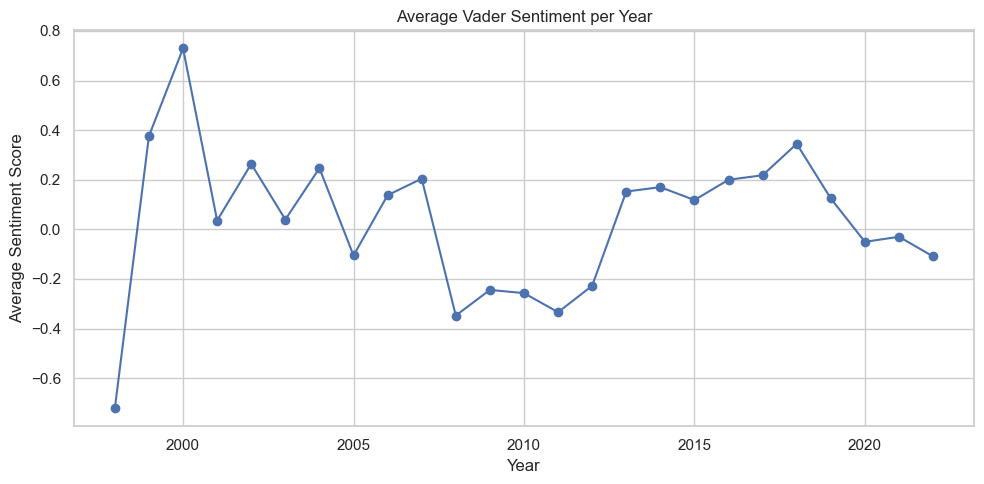

<Figure size 640x480 with 0 Axes>

In [1295]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(yearly_sentiment['Year'], yearly_sentiment['Sentiment_vader'], marker='o')
plt.title('Average Vader Sentiment per Year')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("average_sentiment_vader_peryear", dpi=300)

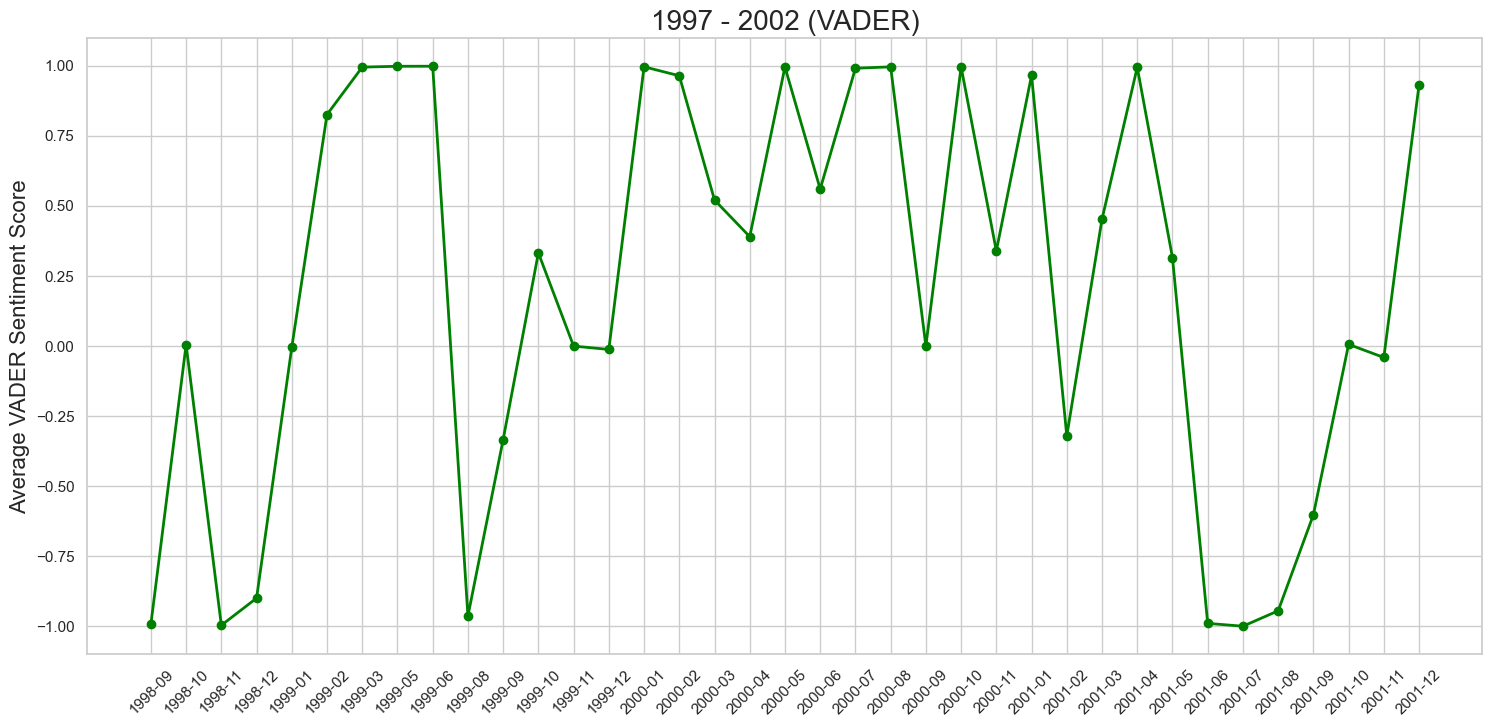

In [1297]:
# 1997-2002 (VADER)
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk.loc[(df_uk['Year'] >= 1997) & (df_uk['Year'] < 2002)].copy()
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg_vader = period_df.groupby('Month')['Sentiment_vader'].mean().reset_index()
ax.plot(monthly_avg_vader['Month'], monthly_avg_vader['Sentiment_vader'], marker='o', linewidth=2, color='green')
ax.set_title("1997 - 2002 (VADER)", fontsize=20)
ax.set_ylabel("Average VADER Sentiment Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()

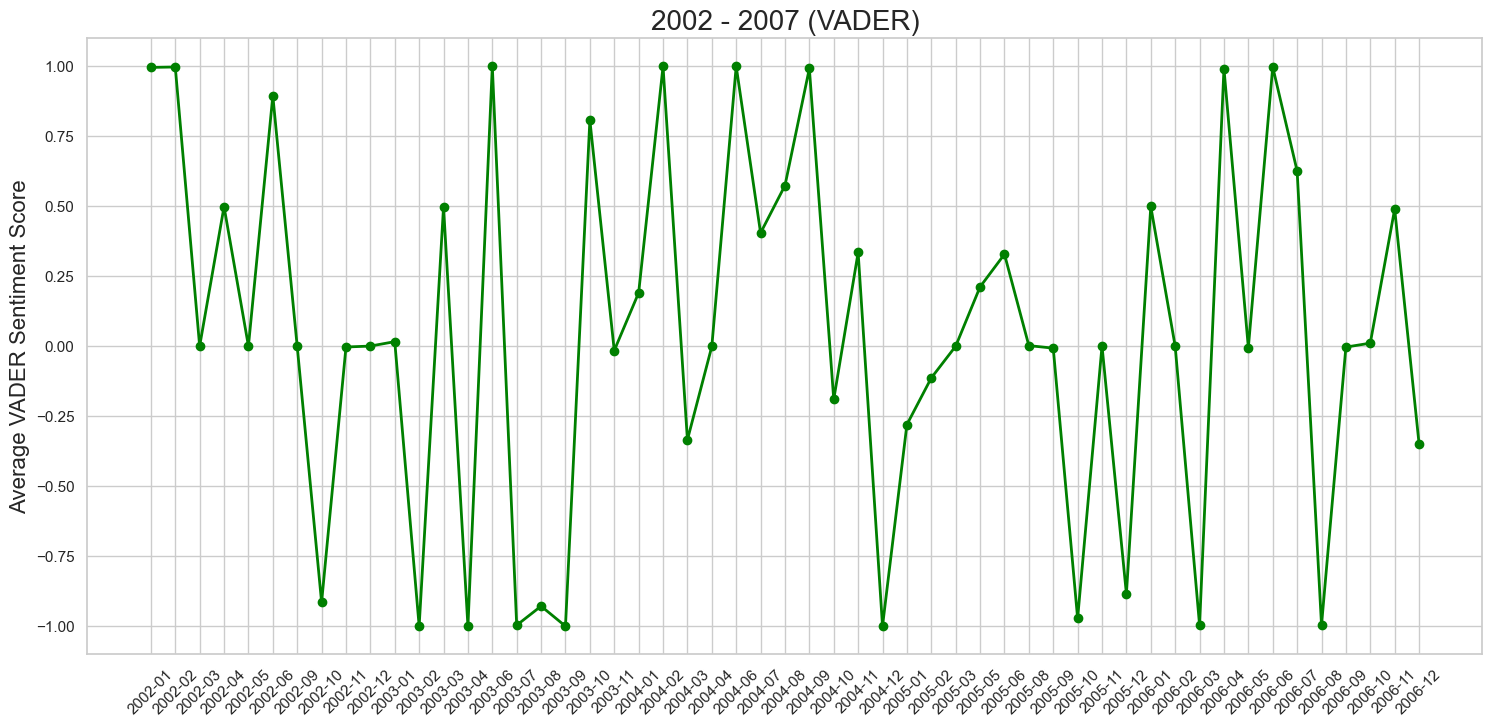

In [1299]:
# 2002-2007 (VADER)
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk.loc[(df_uk['Year'] >= 2002) & (df_uk['Year'] < 2007)].copy()
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg_vader = period_df.groupby('Month')['Sentiment_vader'].mean().reset_index()
ax.plot(monthly_avg_vader['Month'], monthly_avg_vader['Sentiment_vader'], marker='o', linewidth=2, color='green')
ax.set_title("2002 - 2007 (VADER)", fontsize=20)
ax.set_ylabel("Average VADER Sentiment Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()

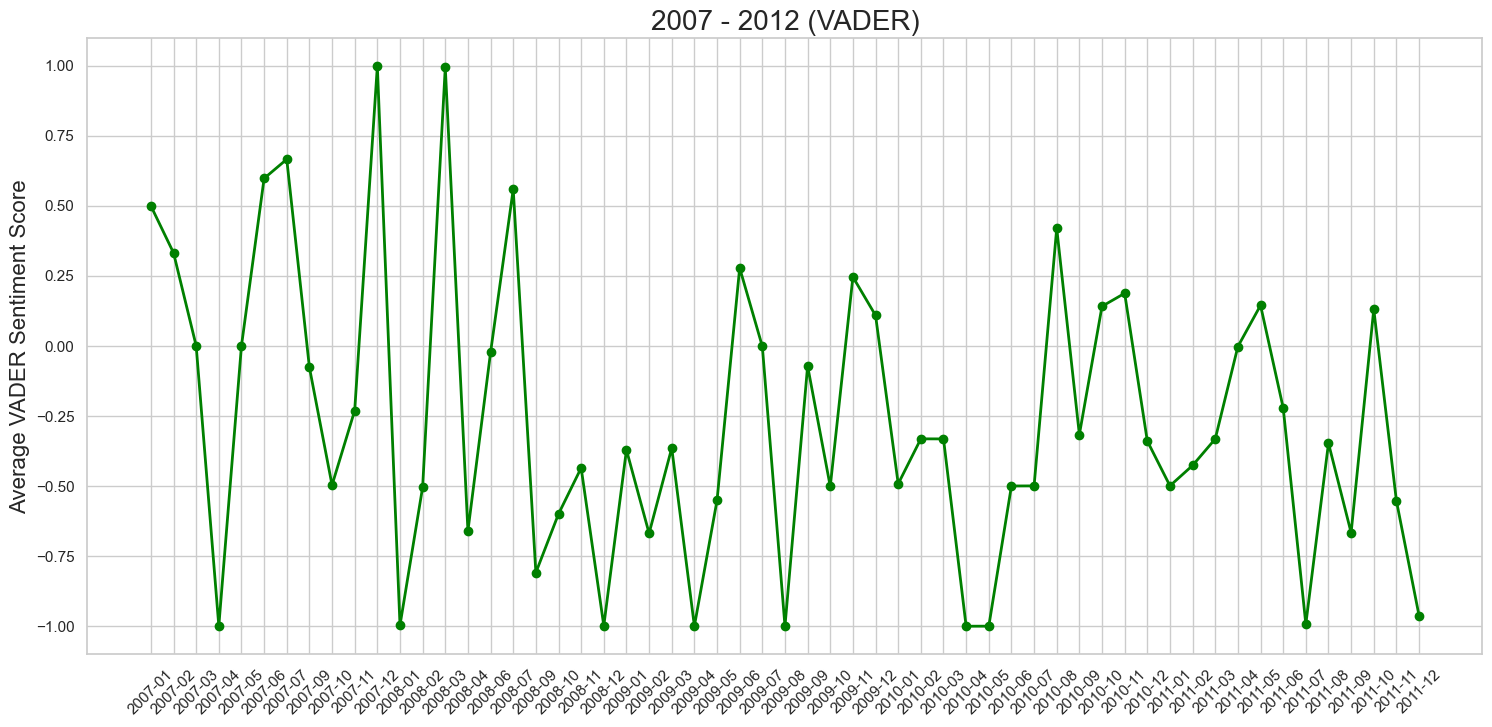

In [1301]:
# 2007-2012 (VADER)
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk.loc[(df_uk['Year'] >= 2007) & (df_uk['Year'] < 2012)].copy()
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg_vader = period_df.groupby('Month')['Sentiment_vader'].mean().reset_index()
ax.plot(monthly_avg_vader['Month'], monthly_avg_vader['Sentiment_vader'], marker='o', linewidth=2, color='green')
ax.set_title("2007 - 2012 (VADER)", fontsize=20)
ax.set_ylabel("Average VADER Sentiment Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()

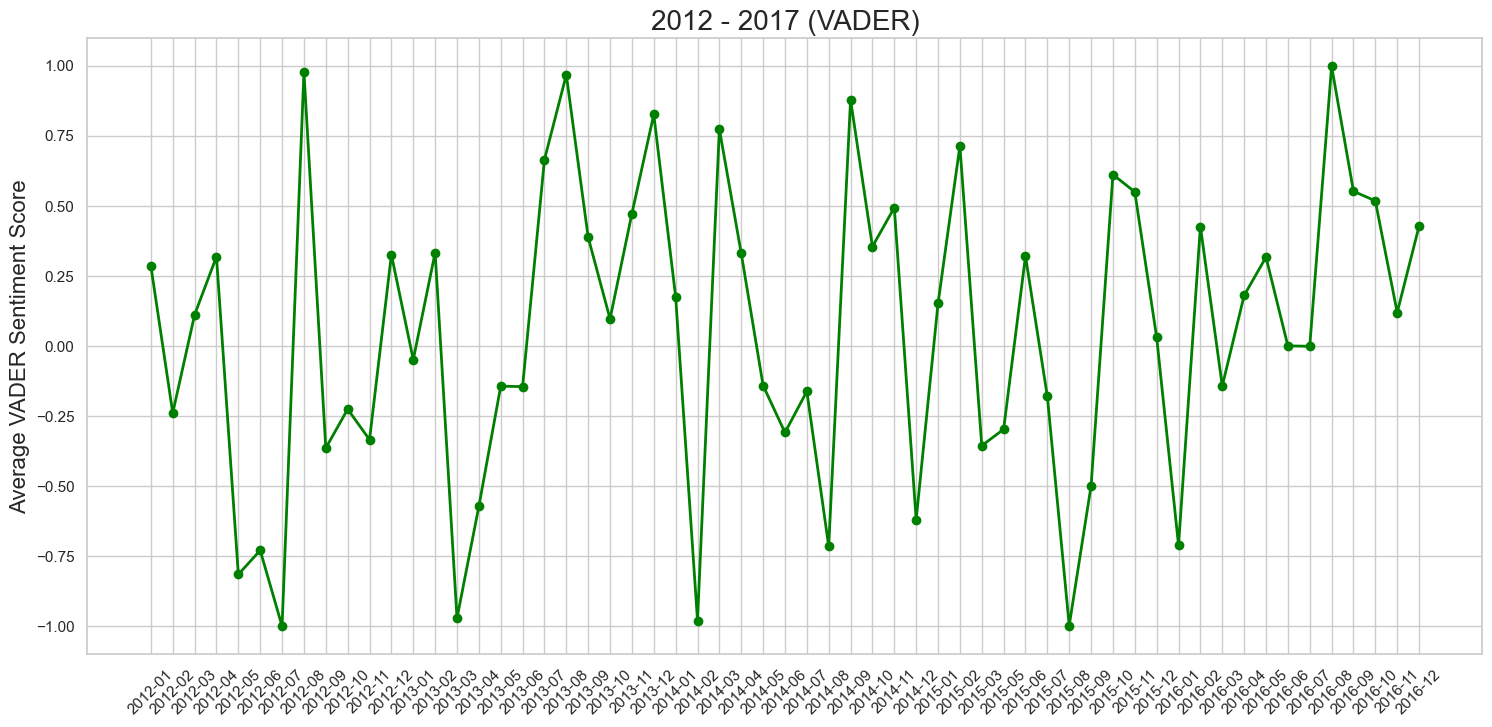

In [1303]:
# 2012-2017 (VADER)
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk.loc[(df_uk['Year'] >= 2012) & (df_uk['Year'] < 2017)].copy()
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg_vader = period_df.groupby('Month')['Sentiment_vader'].mean().reset_index()
ax.plot(monthly_avg_vader['Month'], monthly_avg_vader['Sentiment_vader'], marker='o', linewidth=2, color='green')
ax.set_title("2012 - 2017 (VADER)", fontsize=20)
ax.set_ylabel("Average VADER Sentiment Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()

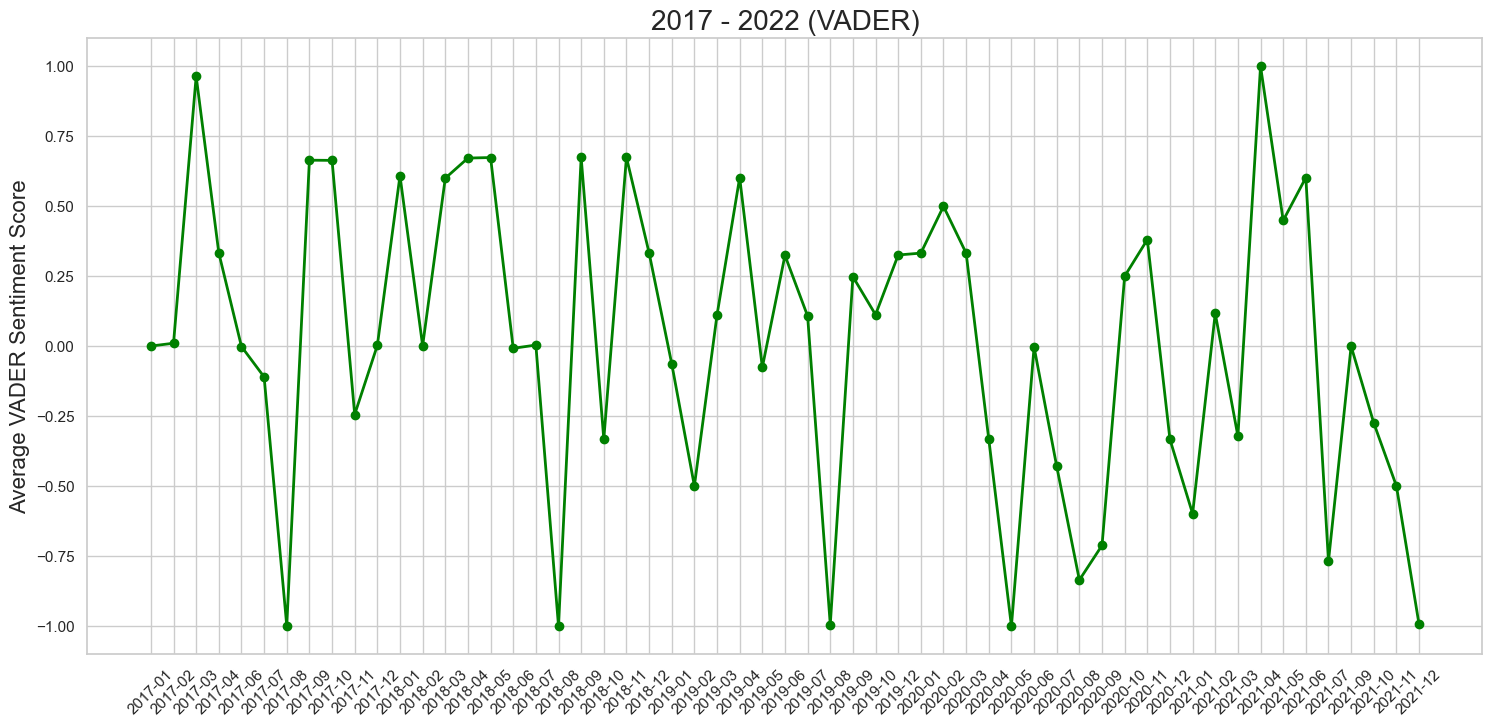

In [1305]:
# 2017-2022 (VADER)
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk.loc[(df_uk['Year'] >= 2017) & (df_uk['Year'] < 2022)].copy()
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg_vader = period_df.groupby('Month')['Sentiment_vader'].mean().reset_index()
ax.plot(monthly_avg_vader['Month'], monthly_avg_vader['Sentiment_vader'], marker='o', linewidth=2, color='green')
ax.set_title("2017 - 2022 (VADER)", fontsize=20)
ax.set_ylabel("Average VADER Sentiment Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()


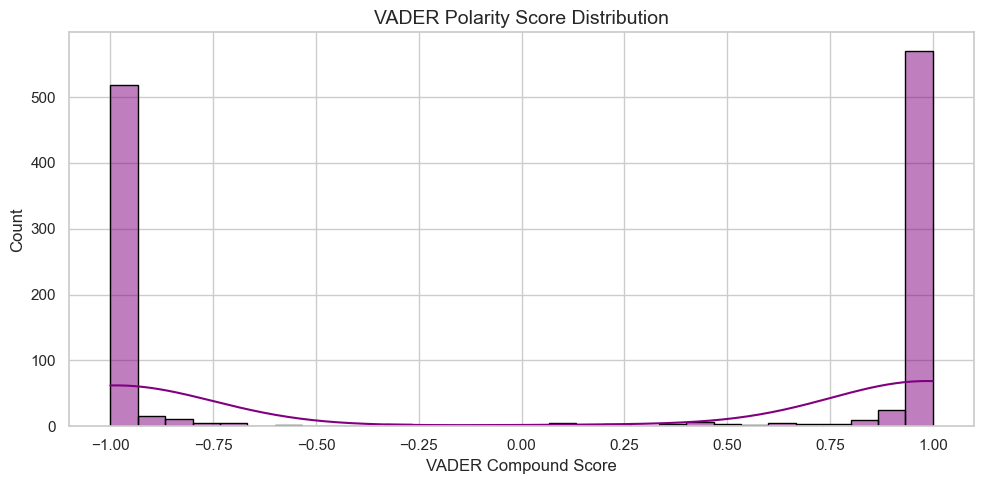

<Figure size 640x480 with 0 Axes>

In [1307]:
# Set style
sns.set(style="whitegrid")

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_uk,
    x='Sentiment_vader',
    bins=30,
    kde=True,
    color='purple',
    edgecolor='black'
)

plt.title('VADER Polarity Score Distribution', fontsize=14)
plt.xlabel('VADER Compound Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()
plt.savefig("vader_polarity_distribution.png", dpi=300)

In [1309]:
# Group by both Year and Author, calculate mean sentiment
author_year_sentiment = df_uk.groupby(['Year', 'Author'])['Sentiment_vader'].mean().reset_index()
author_year_sentiment 

Year    Author  Sentiment_vader
0    1998      Budd        -0.995200
1    1998    Buiter        -0.800000
2    1998    George        -0.329167
3    1998  Governor        -0.999200
4    1998      King        -0.990600
..    ...       ...              ...
436  2022  Sheppard         0.999600
437  2022  Stheeman         0.997500
438  2022  Tenreyro        -0.999800
439  2022   Wilkins         0.999600
440  2022     Woods        -0.004000

[441 rows x 3 columns]

#### Roberta Model Analysis

In [1312]:
# Force all entries in 'Word' column to strings, skipping bad ones
df_sentiment_words = df_sentiment_words[df_sentiment_words['Word'].apply(lambda x: isinstance(x, str))]

df_sentiment_words

Word  Negative  Positive  Uncertainty  Litigious  Strong  Weak  \
0          ABANDON         1         0            0          0       0     0   
1        ABANDONED         1         0            0          0       0     0   
2       ABANDONING         1         0            0          0       0     0   
3      ABANDONMENT         1         0            0          0       0     0   
4     ABANDONMENTS         1         0            0          0       0     0   
...            ...       ...       ...          ...        ...     ...   ...   
3874    WRONGDOING         1         0            0          0       0     0   
3875   WRONGDOINGS         1         0            0          0       0     0   
3876      WRONGFUL         1         0            0          0       0     0   
3877    WRONGFULLY         1         0            0          0       0     0   
3878       WRONGLY         1         0            0          0       0     0   

      Constraining  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
3874             0  
3875             0  
3876             0  
3877             0  
3878             0  

[3879 rows x 8 columns]

In [1314]:
custom_lexicon = {}

for _, row in df_sentiment_words.iterrows():
    word = row['Word'].lower()
    
    # Weighted score based on categories
    score = (
        row['Positive'] * 2.0 +
        row['Negative'] * -2.0 +
        row['Uncertainty'] * -0.5 +
        row['Litigious'] * -0.3 +
        row['Strong'] * 1.0 +
        row['Weak'] * -1.0 +
        row['Constraining'] * -0.5
    )
    
    # Only include non-zero scores
    if score != 0:
        custom_lexicon[word] = score

In [1316]:
# Install Hugging Face Transformers (only needed once)
!pip install transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

In [1317]:
# --- Define Lexicon Scoring Function ---
def compute_lexicon_score(text):
    score = 0
    for word in text.lower().split():
        score += custom_lexicon.get(word, 0)
    return score

# --- Load RoBERTa Finance Sentiment Model ---
model_name = "yiyanghkust/finbert-tone"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
roberta_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# --- Apply Sentiment Analysis ---
def roberta_sentiment(text):
    try:
        result = roberta_pipeline(text[:512])[0]  # Truncate long texts
        return result['label']
    except Exception as e:
        return "ERROR"

# --- Process Data ---
df_uk["lexicon_score"] = df_uk["Text"].apply(compute_lexicon_score)
df_uk["roberta_sentiment"] = df_uk["Text"].apply(roberta_sentiment)


Device set to use cpu


In [1320]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

model_name = "yiyanghkust/finbert-tone"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Set pipeline with device= -1 to force CPU
roberta_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=-1)


Device set to use cpu


In [1322]:
# Sample data if running on CPU
sample_df = df_uk.sample(100, random_state=42).copy()

# Apply RoBERTa sentiment
sample_df["roberta_sentiment"] = sample_df["Text"].apply(lambda x: roberta_pipeline(x[:512])[0]['label'])


In [1323]:
from tqdm import tqdm

tqdm.pandas()
sample_df["roberta_sentiment"] = sample_df["Text"].progress_apply(lambda x: roberta_pipeline(x[:512])[0]['label'])


100%|██████████| 100/100 [00:07<00:00, 13.80it/s]


In [1326]:
sample_df["lexicon_score"] = sample_df["Text"].apply(compute_lexicon_score)

# Optional: Combine to a hybrid label
def hybrid_sentiment(roberta_label, lex_score):
    if abs(lex_score) > 10:
        return "POSITIVE" if lex_score > 0 else "NEGATIVE"
    else:
        return roberta_label

sample_df["hybrid_sentiment"] = sample_df.apply(
    lambda x: hybrid_sentiment(x["roberta_sentiment"], x["lexicon_score"]), axis=1
)

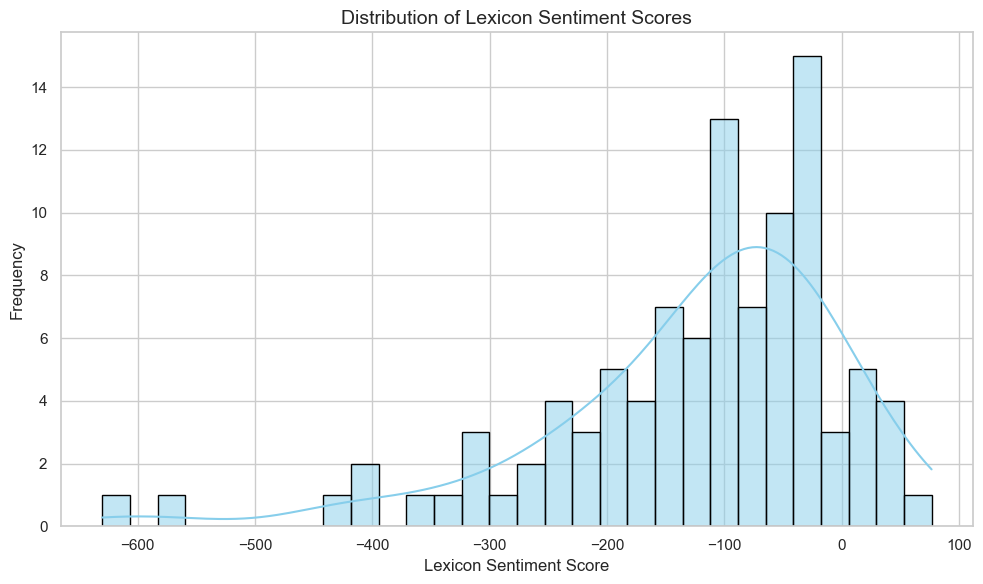

In [1328]:
# Set Seaborn style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(
    data=sample_df,
    x="lexicon_score",
    bins=30,
    kde=True,
    color="skyblue",
    edgecolor="black"
)

plt.title("Distribution of Lexicon Sentiment Scores", fontsize=14)
plt.xlabel("Lexicon Sentiment Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


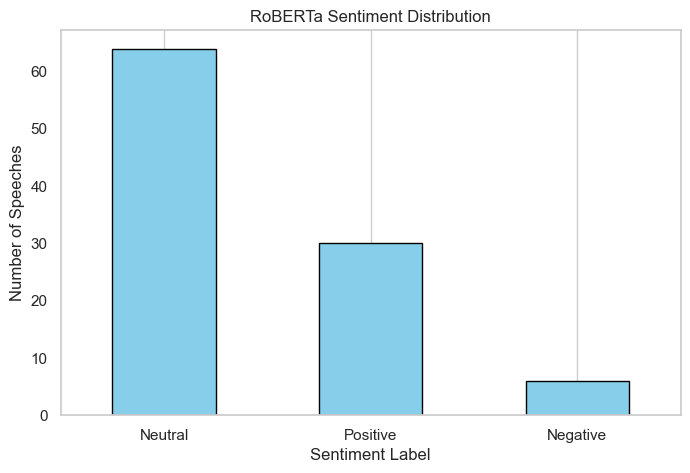

In [1330]:
# Convert labels to countable categories
roberta_counts = sample_df["roberta_sentiment"].value_counts()

# Plot
plt.figure(figsize=(8, 5))
roberta_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("RoBERTa Sentiment Distribution")
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Speeches")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [1332]:
def compute_lexicon_score(text):
    return sum(custom_lexicon.get(w.lower(), 0) for w in text.split())

# Load RoBERTa Financial Sentiment Model 
model_name = "yiyanghkust/finbert-tone"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, top_k=None, device=-1)

# Sample and Score 
df_uk_sample = df_uk.sample(500, random_state=42).copy()

def get_roberta_score(text):
    try:
        result = classifier(text[:512])[0]
        scores = {r['label'].lower(): r['score'] for r in result}
        return scores["positive"] - scores["negative"]
    except:
        return 0

# Apply scoring
df_uk_sample["roberta_score"] = df_uk_sample["Text"].apply(get_roberta_score)
df_uk_sample["lexicon_score_raw"] = df_uk_sample["Text"].apply(compute_lexicon_score)

# Normalize lexicon score to (-1, 1), safely
lex_min = df_uk_sample["lexicon_score_raw"].min()
lex_max = df_uk_sample["lexicon_score_raw"].max()
if lex_max - lex_min != 0:
    df_uk_sample["lexicon_score"] = df_uk_sample["lexicon_score_raw"].apply(
        lambda x: 2 * ((x - lex_min) / (lex_max - lex_min)) - 1
    )
else:
    df_uk_sample["lexicon_score"] = 0

# Combine scores and clip to range
df_uk_sample["combined_score"] = df_uk_sample["roberta_score"] + df_uk_sample["lexicon_score"]
df_uk_sample["combined_score"] = df_uk_sample["combined_score"].clip(-1, 1)


Device set to use cpu


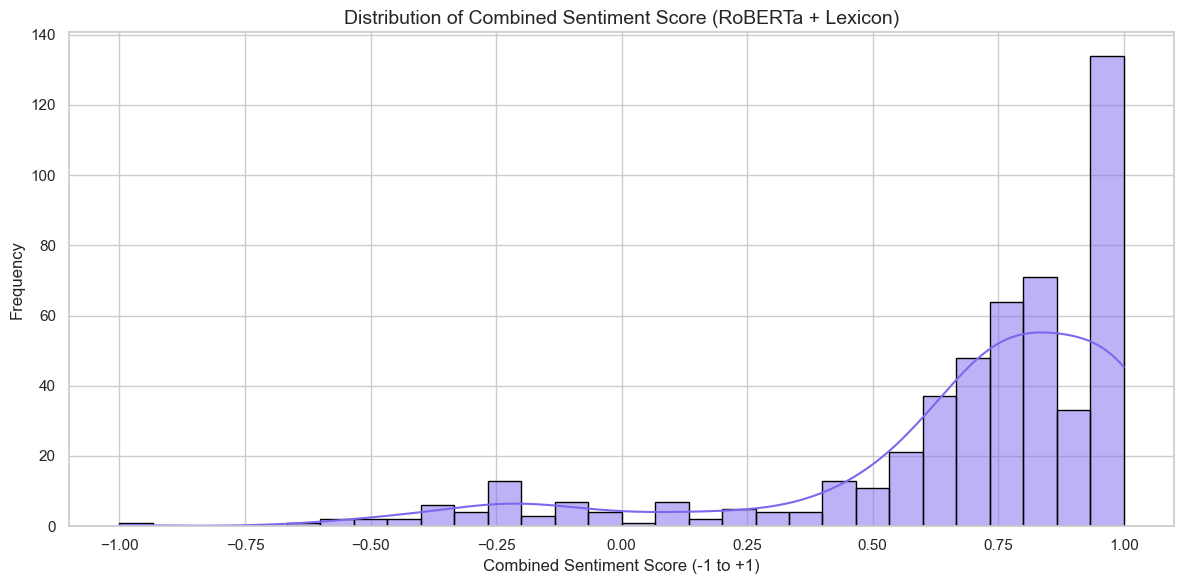

In [1334]:
# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_uk_sample,
    x="combined_score",
    bins=30,
    kde=True,
    color="mediumslateblue",
    edgecolor="black"
)

plt.title("Distribution of Combined Sentiment Score (RoBERTa + Lexicon)", fontsize=14)
plt.xlabel("Combined Sentiment Score (-1 to +1)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Device set to use cpu


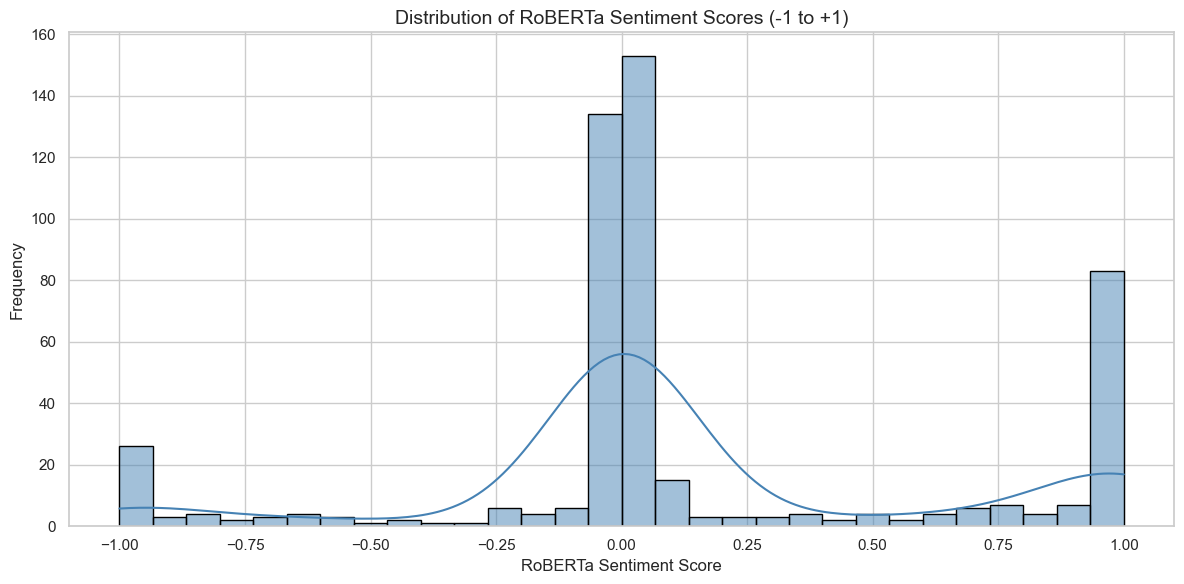

In [1336]:
#Roberta distribution without lexicon 
classifier = pipeline(
    "sentiment-analysis", 
    model=model, 
    tokenizer=tokenizer, 
    top_k=None,     # return all scores
    device=-1       # force CPU
)

# Take a Sample of df_uk for Processing 
df_uk_sample = df_uk.sample(500, random_state=42).copy()

# Define RoBERTa Sentiment Scoring Function
def get_roberta_score(text):
    try:
        result = classifier(text[:512])[0]  # limit to 512 tokens
        scores = {r['label'].lower(): r['score'] for r in result}
        return scores.get("positive", 0) - scores.get("negative", 0)
    except Exception as e:
        print(f"Error processing text: {e}")
        return 0

# Apply to Speech Texts 
df_uk_sample["roberta_score"] = df_uk_sample["Text"].apply(get_roberta_score)

#Seaborn Histogram with KDE Line 
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.histplot(
    data=df_uk_sample,
    x="roberta_score",
    bins=30,
    kde=True,
    color="steelblue",
    edgecolor="black"
)

plt.title("Distribution of RoBERTa Sentiment Scores (-1 to +1)", fontsize=14)
plt.xlabel("RoBERTa Sentiment Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_37872\4036888546.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_uk_sample, x="Year", y="roberta_score", palette="coolwarm")


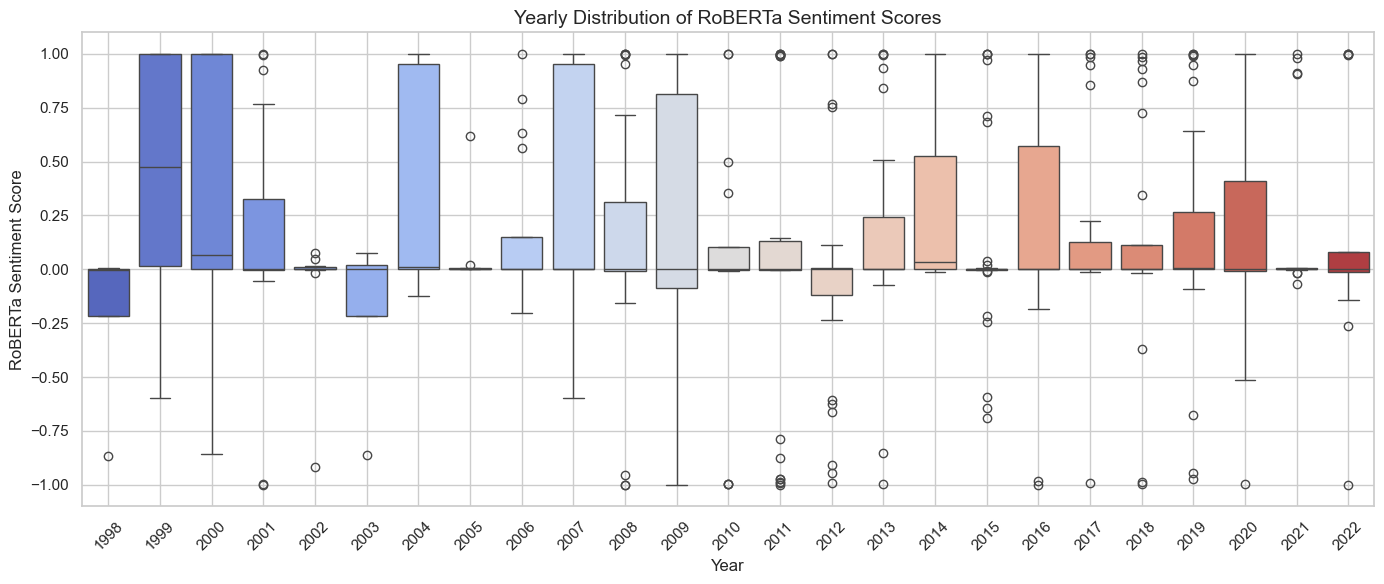

<Figure size 640x480 with 0 Axes>

In [1337]:
# Plot Boxplot of RoBERTa Scores by Year ---
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_uk_sample, x="Year", y="roberta_score", palette="coolwarm")
plt.title("Yearly Distribution of RoBERTa Sentiment Scores", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("RoBERTa Sentiment Score", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("sentiment_distribution_yearly_box.png", dpi=300, bbox_inches='tight') 

In [1338]:
df_uk

Reference         Country       Date  Year      Month  \
0     r980915a_BOE  United Kingdom 1998-09-15  1998  September   
1     r981021b_BOE  United Kingdom 1998-10-21  1998    October   
2     r981021a_BOE  United Kingdom 1998-10-21  1998    October   
3     r981101a_BOE  United Kingdom 1998-11-01  1998   November   
4     r981101b_BOE  United Kingdom 1998-11-01  1998   November   
...            ...             ...        ...   ...        ...   
1204  r220523a_BOE  United Kingdom 2022-05-23  2022        May   
1205  r220525a_BOE  United Kingdom 2022-05-25  2022        May   
1206  r220526a_BOE  United Kingdom 2022-05-26  2022        May   
1207  r220608a_BOE  United Kingdom 2022-06-08  2022       June   
1208  r221020a_BOE  United Kingdom 2022-10-20  2022    October   

                                                  Title     Author Isgov  \
0                                                Speech     George   Yes   
1                                     Britain in Europe     George   Yes   
2     Impact of the recent turbulence in internation...       King    No   
3           Economic policy, with and without forecasts       Budd    No   
4     Inflation targeting in practice: the UK experi...    Vickers    No   
...                                                 ...        ...   ...   
1204      Opening remarks at OeNB monetary policy panel     Bailey    No   
1205  What will operational resilience look like goi...  Mackinnon    No   
1206  Four Rs: Creating the conditions for long-term...     Gerken    No   
1207  Climate Biennial Exploratory Scenario: Insuran...      Claus    No   
1208       The inflationary consequences of real shocks  Broadbent    No   

                                                   Text IsGov  ...  \
0     thank chairman actually pleased opportunity re...   Yes  ...   
1     great pleasure beautiful city bruges honoured ...   Yes  ...   
2     industries suffered volatility british economy...    No  ...   
3     topic evening use forecasts economic policymak...    No  ...   
4     six years ago week sterling left exchange rate...    No  ...   
...                                                 ...   ...  ...   
1204  time large economic shocks particularly large ...    No  ...   
1205  important business services impact tolerances ...    No  ...   
1206  asset eligibility liability eligibility calcul...    No  ...   
1207  thank inviting speak today abis climate summit...    No  ...   
1208  covid19 pandemic russias invasion ukraine infl...    No  ...   

      Year_Chunk  polarity_textblob  subjectivity_textblob  neutral_finbert  \
0      1995–1999           0.064537               0.427930         0.737529   
1      1995–1999           0.062791               0.356223         0.532217   
2      1995–1999           0.067741               0.380480         0.808452   
3      1995–1999           0.055705               0.465611         0.983587   
4      1995–1999           0.048789               0.387690         0.983661   
...          ...                ...                    ...              ...   
1204   2020–2024           0.057218               0.393033         0.985162   
1205   2020–2024           0.147425               0.545723         0.503304   
1206   2020–2024           0.111964               0.437292         0.983631   
1207   2020–2024           0.086440               0.400447         0.925728   
1208   2020–2024           0.054260               0.364871         0.974222   

     positive_finbert  negative_finbert  polarity_score_finbert  \
0            0.099846          0.162625               -0.062779   
1            0.466339          0.001444                0.464896   
2            0.022303          0.169245               -0.146942   
3            0.015397          0.001015                0.014382   
4            0.015350          0.000989                0.014361   
...               ...               ...                     ...   
1204         0.001903          0.012935     

In [1339]:
df_uk_sample

Reference         Country       Date  Year      Month  \
101   r010222a_BOE  United Kingdom 2001-02-22  2001   February   
432   r110916a_BOE  United Kingdom 2011-09-16  2011  September   
309   r080117a_BOE  United Kingdom 2008-01-17  2008    January   
109   r010516a_BOE  United Kingdom 2001-05-16  2001        May   
1001  r191217a_BOE  United Kingdom 2019-12-17  2019   December   
...            ...             ...        ...   ...        ...   
770   r160923a_BOE  United Kingdom 2016-09-23  2016  September   
708   r151202a_BOE  United Kingdom 2015-12-02  2015   December   
71    r000414a_BOE  United Kingdom 2000-04-14  2000      April   
94    r010122a_BOE  United Kingdom 2001-01-22  2001    January   
583   r130614a_BOE  United Kingdom 2013-06-14  2013       June   

                                                  Title      Author Isgov  \
101     The Impact of the US Slowdown on the UK Economy    Wadhwani    No   
432   Macroprudential Policy: Addressing the Things ...       Large    No   
309   The Impact of the Financial Market Disruption ...       Gieve    No   
109           Has UK Labour Market Performance Changed?     Nickell    No   
1001                            Après Benoît le déluge?      Carney    No   
...                                                 ...         ...   ...   
770   Rebuilding Trust through the 'FX Global Code':...      Salmon    No   
708   Policy priorities for prudential regulation an...     Moulder    No   
71                       Balancing the Economic See-Saw        King    No   
94        Current Threats to Global Financial Stability    Clementi    No   
583                 Inflation targeting and flexibility  Mccafferty    No   

                                                   Text IsGov  ...  \
101   great privilege opportunity meet learn evaluat...    No  ...   
432   group thirtys mission deepen understanding int...    No  ...   
309   testing times mpc latest official figures grow...    No  ...   
109   however inflation also fell 1998 around 23 mil...    No  ...   
1001  begin must emphasise might searching cryptic c...    No  ...   
...                                                 ...   ...  ...   
770   good evening delighted aci uks square mile deb...    No  ...   
708   thank invitation speak today although speech t...    No  ...   
71    delighted receive invitation speak 187th anniv...    No  ...   
94    great pleasure new york last british chamber c...    No  ...   
583   speeches available online today would like sha...    No  ...   

      polarity_textblob  subjectivity_textblob  neutral_finbert  \
101            0.071297               0.430627         0.809173   
432            0.085555               0.418259         0.980077   
309            0.046000               0.429045         0.484771   
109            0.078704               0.432797         0.983267   
1001           0.099131               0.381331         0.525303   
...                 ...                    ...              ...   
770            0.141776               0.466549         0.518553   
708            0.112808               0.459312         0.890803   
71             0.029172               0.413047         0.745918   
94             0.078820               0.388936         0.486081   
583            0.101048               0.379132         0.974397   

      positive_finbert negative_finbert  polarity_score_finbert  \
101           0.037447         0.153380               -0.115932   
432           0.017954         0.001969                0.015985   
309           0.017708         0.497520               -0.479812   
109           0.015502         0.001232                0.014270   
1001          0.385849         0.088848                0.297001   
...                ...              ...                     ...   
770           0.016091         0.465356               -0.449265   
708           0.103009         0.006187                0.096822   
71            0.084044         0.170038   

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_37872\848416087.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')


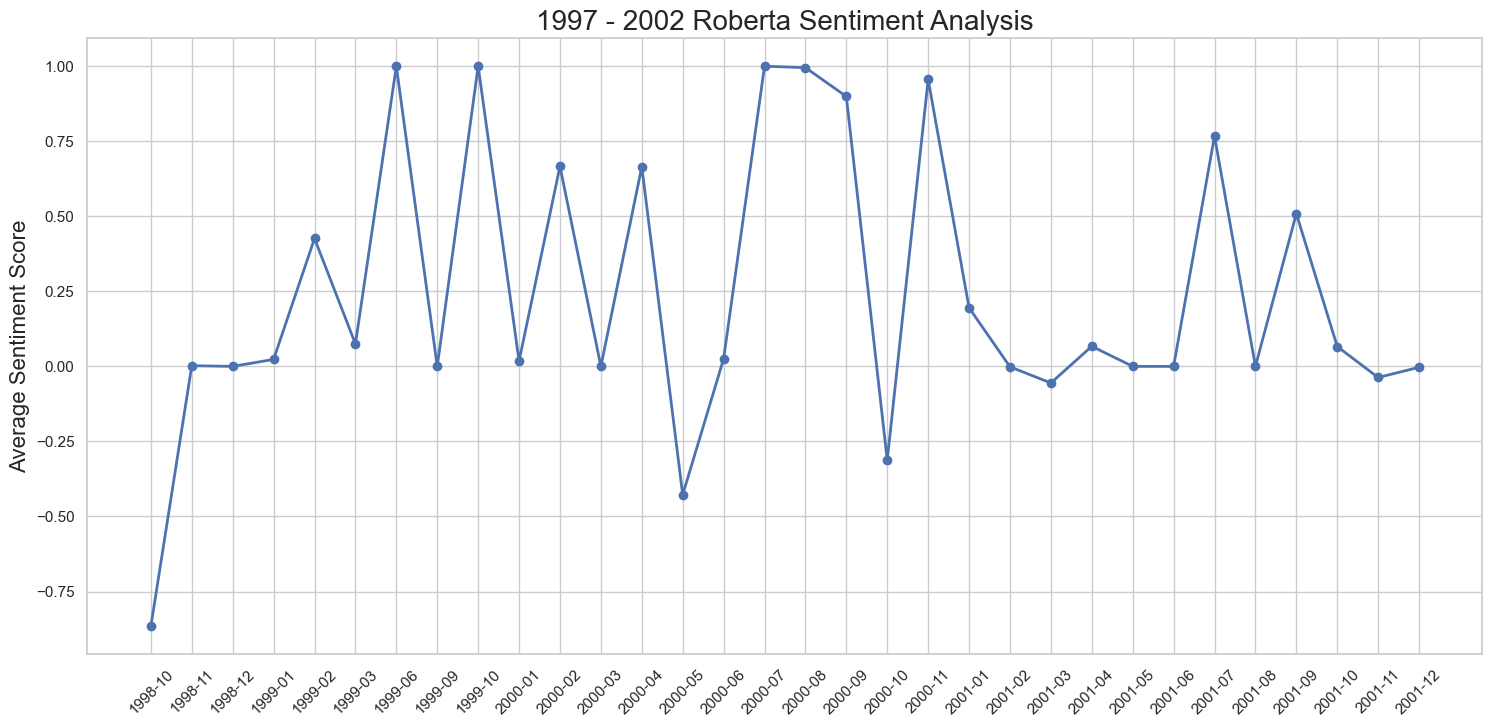

In [1340]:
# 1997-2002
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk_sample[(df_uk_sample['Year'] >= 1997) & (df_uk_sample['Year'] < 2002)]
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg = period_df.groupby('Month')['roberta_score'].mean().reset_index()
ax.plot(monthly_avg['Month'], monthly_avg['roberta_score'], marker='o', linewidth=2)
ax.set_title("1997 - 2002 Roberta Sentiment Analysis", fontsize=20)
ax.set_ylabel("Average Sentiment Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_37872\2847086186.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')


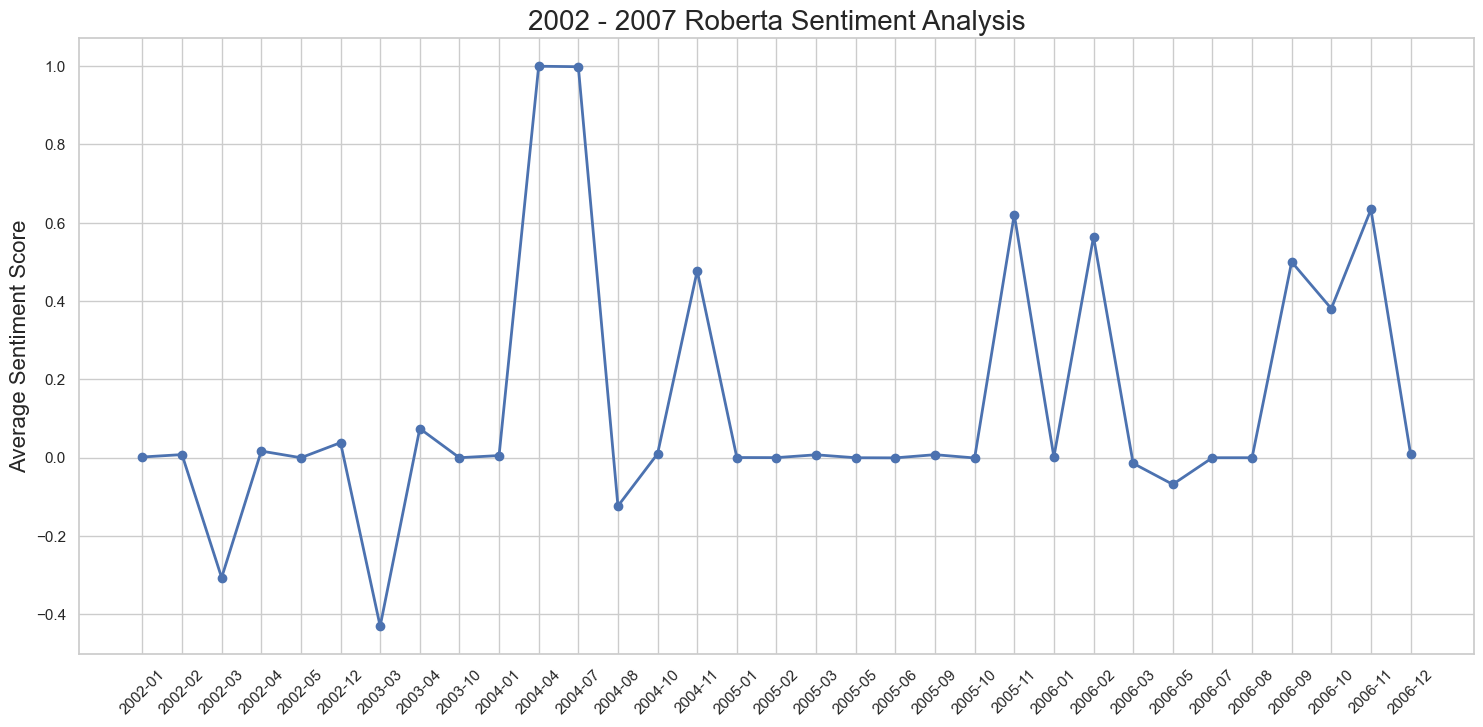

In [1341]:
# 2002-2007
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk_sample[(df_uk_sample['Year'] >= 2002) & (df_uk_sample['Year'] < 2007)]
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg = period_df.groupby('Month')['roberta_score'].mean().reset_index()
ax.plot(monthly_avg['Month'], monthly_avg['roberta_score'], marker='o', linewidth=2)
ax.set_title("2002 - 2007 Roberta Sentiment Analysis", fontsize=20)
ax.set_ylabel("Average Sentiment Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_37872\3716172037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')


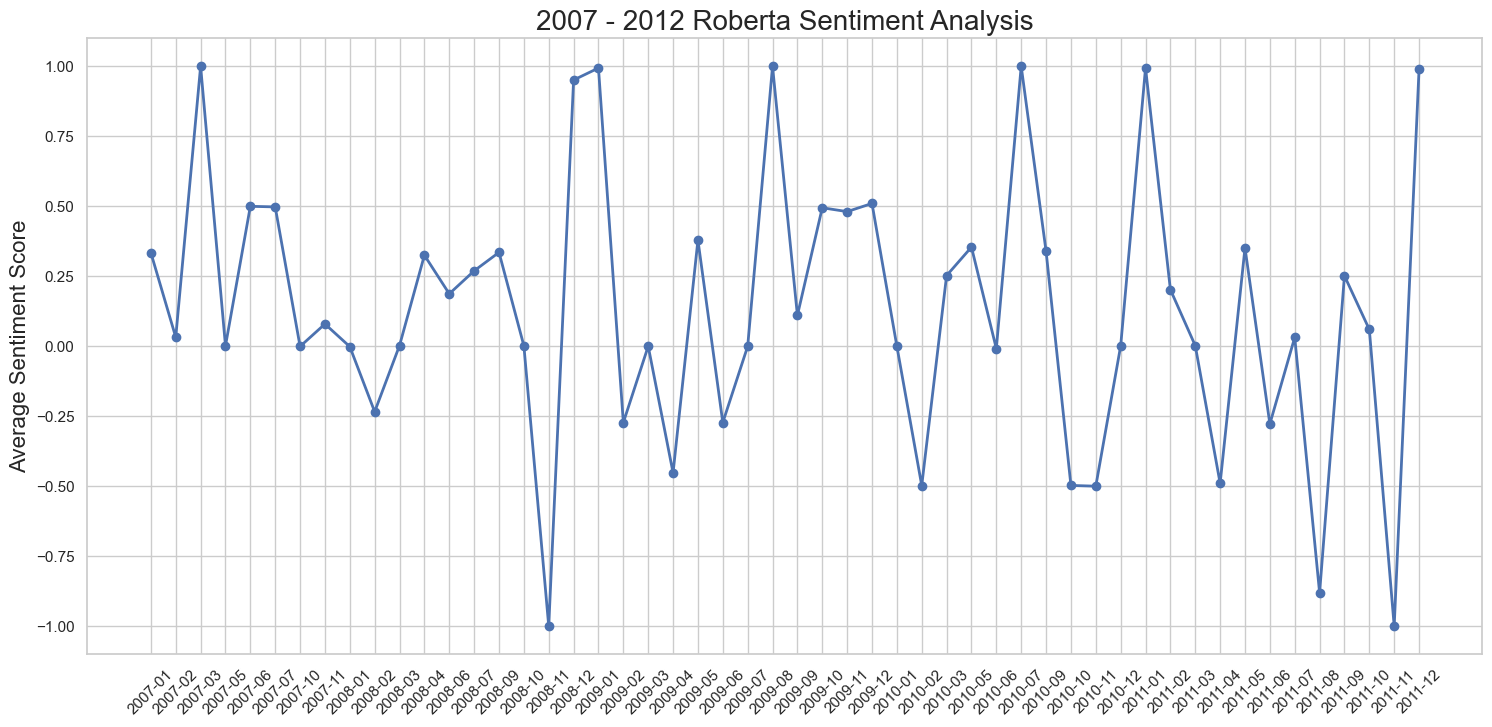

In [1356]:
# 2007-2012
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk_sample[(df_uk_sample['Year'] >= 2007) & (df_uk_sample['Year'] < 2012)]
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg = period_df.groupby('Month')['roberta_score'].mean().reset_index()
ax.plot(monthly_avg['Month'], monthly_avg['roberta_score'], marker='o', linewidth=2)
ax.set_title("2007 - 2012 Roberta Sentiment Analysis", fontsize=20)
ax.set_ylabel("Average Sentiment Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_37872\661734869.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')


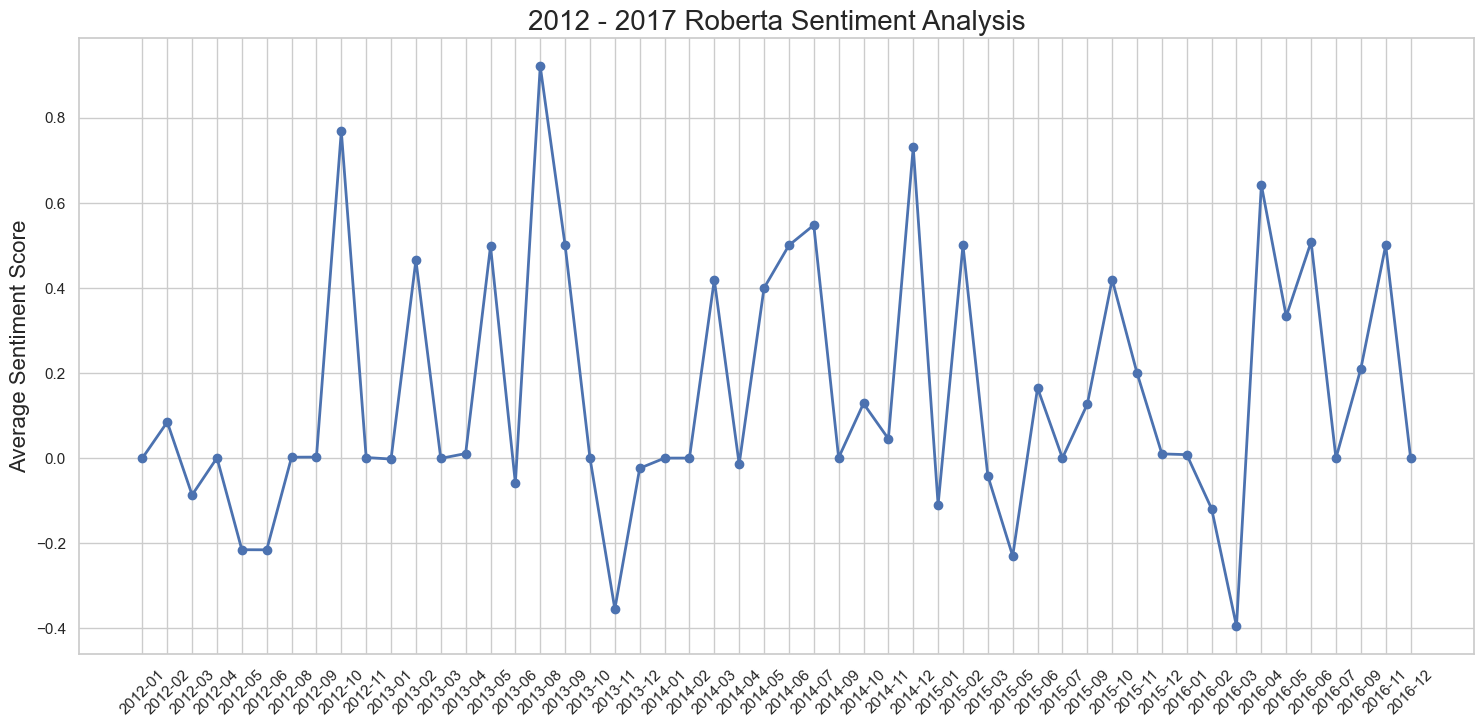

In [1358]:
# 2012-2017
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk_sample[(df_uk_sample['Year'] >= 2012) & (df_uk_sample['Year'] < 2017)]
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg = period_df.groupby('Month')['roberta_score'].mean().reset_index()
ax.plot(monthly_avg['Month'], monthly_avg['roberta_score'], marker='o', linewidth=2)
ax.set_title("2012 - 2017 Roberta Sentiment Analysis", fontsize=20)
ax.set_ylabel("Average Sentiment Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_37872\3093847610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')


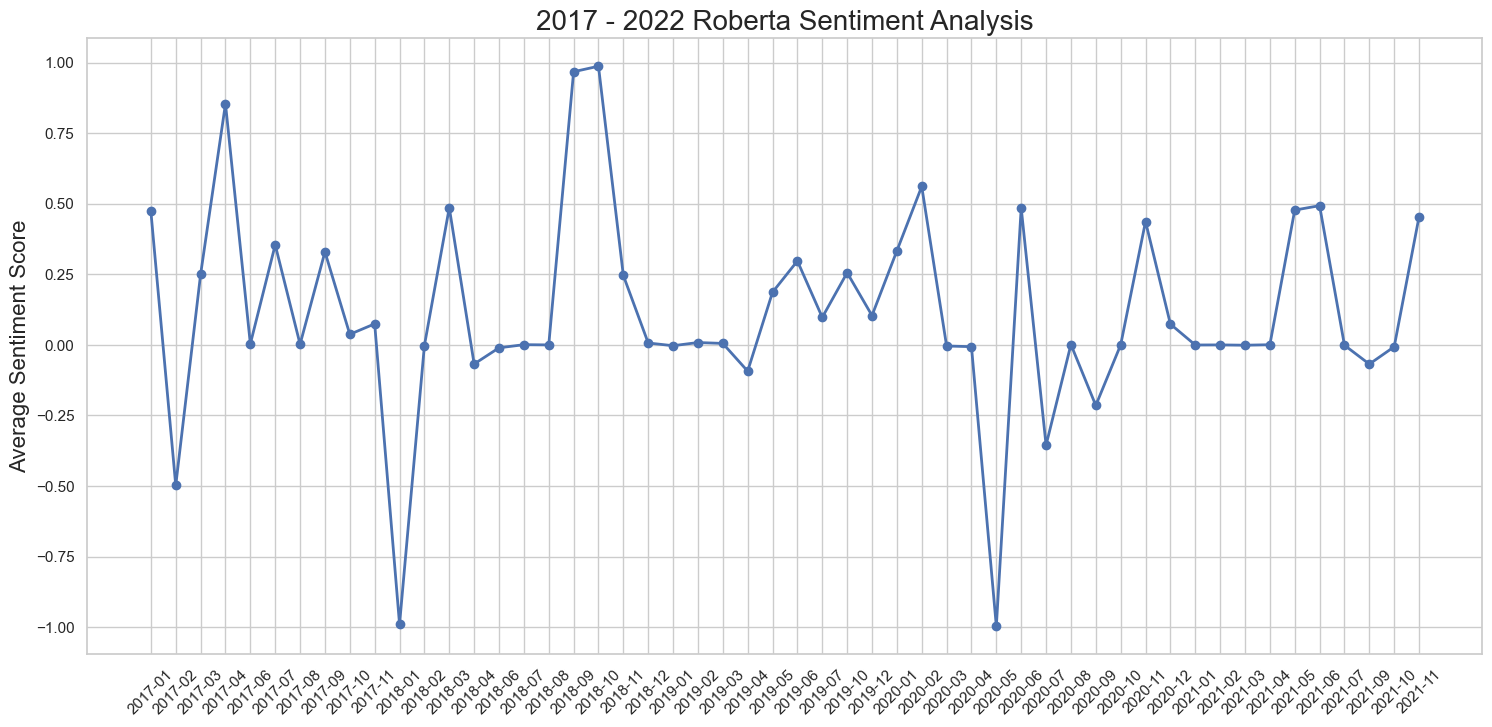

In [1360]:
# 2017-2022
fig, ax = plt.subplots(figsize=(18, 8))
period_df = df_uk_sample[(df_uk_sample['Year'] >= 2017) & (df_uk_sample['Year'] < 2022)]
period_df['Month'] = pd.to_datetime(period_df['Date']).dt.strftime('%Y-%m')
monthly_avg = period_df.groupby('Month')['roberta_score'].mean().reset_index()
ax.plot(monthly_avg['Month'], monthly_avg['roberta_score'], marker='o', linewidth=2)
ax.set_title("2017 - 2022 Roberta Sentiment Analysis", fontsize=20)
ax.set_ylabel("Average Sentiment Score", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.show()

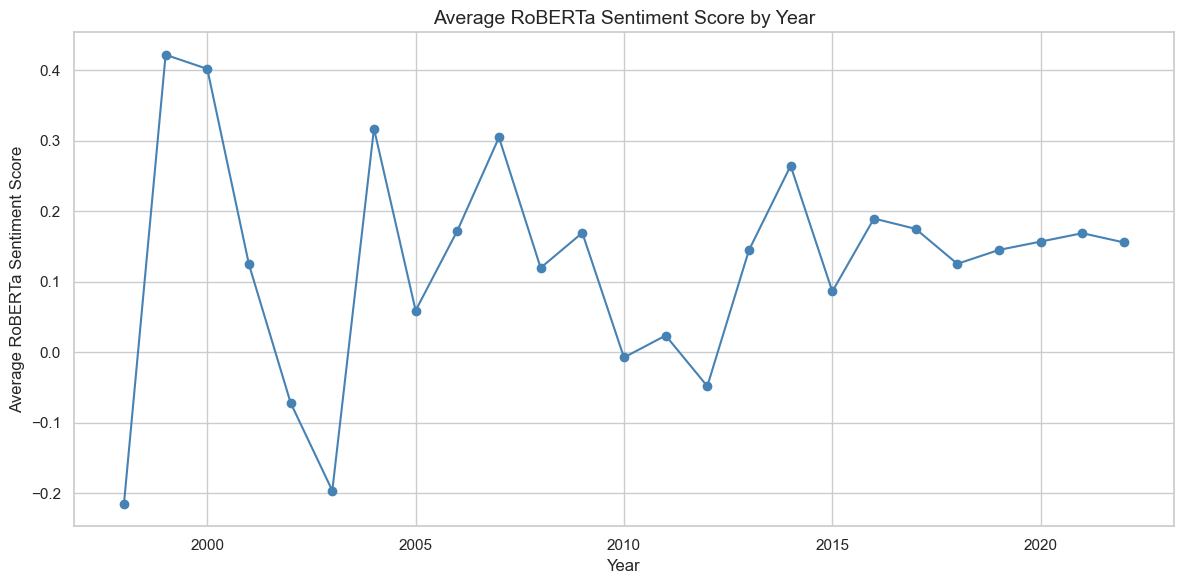

In [1362]:

# Group by year and calculate mean sentiment ---
yearly_avg = df_uk_sample.groupby("Year")["roberta_score"].mean().reset_index()

# Plot as line chart 
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg["Year"], yearly_avg["roberta_score"], marker='o', linestyle='-', color='steelblue')

plt.title("Average RoBERTa Sentiment Score by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average RoBERTa Sentiment Score", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Economic Indicators

In [1365]:
# Gamze's path
# customer_confidence = pd.read_excel(
#    r"C:\Users\gamze bozkurt omar\Desktop\Employer_Project\Consumer Confidence\Consumer Confidence\GfK Consumer Confidence.xlsx", 
#   skiprows=3)


# Elif's path
#customer_confidence = pd.read_csv(
#    r"C:\Users\elif\Desktop\LSE BoE project\economicdata\customer_confidence.xlsx",  # even if named .xlsx
#    skiprows=3
#)


url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/source_economic_data/consumer_confidence.xlsx'
customer_confidence = pd.read_excel(url,skiprows=4,header=None)
customer_confidence.head()

0   1
0 1990-01-15 -19
1 1990-02-15 -24
2 1990-03-15 -35
3 1990-04-15 -31
4 1990-05-15 -30

In [1367]:
#Cleaning customer data 
#Drop completely empty rows and columns
customer_confidence.dropna(how='all', axis=0, inplace=True)
customer_confidence.dropna(how='all', axis=1, inplace=True)


In [1369]:
#Rename columns for clarity
customer_confidence.columns = ['Date', 'confidence_score']
customer_confidence

Date  confidence_score
0   1990-01-15               -19
1   1990-02-15               -24
2   1990-03-15               -35
3   1990-04-15               -31
4   1990-05-15               -30
..         ...               ...
419 2024-12-15               -17
420 2025-01-15               -22
421 2025-02-15               -20
422 2025-03-15               -19
423 2025-04-15               -23

[424 rows x 2 columns]

In [788]:
#Convert 'date' to datetime (format like '2001 MAR')
#customer_confidence['Date'] = pd.to_datetime(customer_confidence['Date'])

# Create Year column 
#customer_confidence['Year'] = pd.to_datetime(customer_confidence['Date']).dt.year

# Create month column with the full name of the month
#customer_confidence['Month'] = pd.to_datetime(customer_confidence['Date']).dt.strftime('%B')

# View the data frame 
#customer_confidence

Date  confidence_score  Year     Month
0   1990-01-15               -19  1990   January
1   1990-02-15               -24  1990  February
2   1990-03-15               -35  1990     March
3   1990-04-15               -31  1990     April
4   1990-05-15               -30  1990       May
..         ...               ...   ...       ...
419 2024-12-15               -17  2024  December
420 2025-01-15               -22  2025   January
421 2025-02-15               -20  2025  February
422 2025-03-15               -19  2025     March
423 2025-04-15               -23  2025     April

[424 rows x 4 columns]

In [790]:
#customer_confidence_yearly_avg = customer_confidence.groupby('Year')['confidence_score'].mean().reset_index()

#customer_confidence_yearly_avg 


Year  confidence_score
0   1990        -26.666667
1   1991        -17.750000
2   1992        -16.500000
3   1993        -12.750000
4   1994        -12.250000
5   1995         -9.750000
6   1996         -4.666667
7   1997          4.416667
8   1998         -0.833333
9   1999          1.416667
10  2000         -0.333333
11  2001          1.083333
12  2002          3.083333
13  2003         -4.416667
14  2004         -3.416667
15  2005         -3.083333
16  2006         -5.500000
17  2007         -6.916667
18  2008        -28.916667
19  2009        -24.666667
20  2010        -18.333333
21  2011        -29.083333
22  2012        -28.750000
23  2013        -18.583333
24  2014         -2.583333
25  2015          3.083333
26  2016         -3.250000
27  2017         -8.750000
28  2018         -9.500000
29  2019        -12.666667
30  2020        -26.250000
31  2021        -14.500000
32  2022        -38.500000
33  2023        -29.333333
34  2024        -17.750000
35  2025        -21.000000

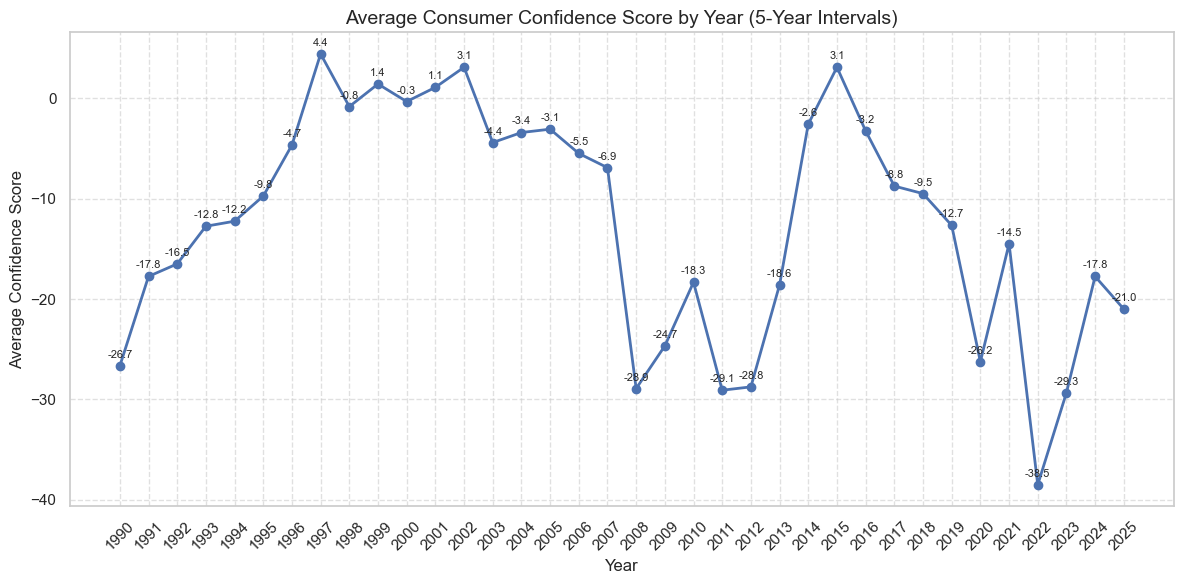

In [792]:
# Draw visual
# Create a smooth line chart for better visual appeal
#plt.figure(figsize=(12, 6))
#plt.plot(customer_confidence_yearly_avg ['Year'], customer_confidence_yearly_avg ['confidence_score'], marker='o', linewidth=2)

# Add annotations for values
#for i, row in customer_confidence_yearly_avg.iterrows():
 #   plt.text(row['Year'], row['confidence_score'] + 0.8, f"{row['confidence_score']:.1f}", ha='center', fontsize=8)

# Style the plot
#plt.title('Average Consumer Confidence Score by Year (5-Year Intervals)', fontsize=14)
#plt.xlabel('Year', fontsize=12)
#plt.ylabel('Average Confidence Score', fontsize=12)
#plt.grid(True, linestyle='--', alpha=0.6)
#plt.xticks(customer_confidence_yearly_avg['Year'], rotation=45)
#plt.tight_layout()
#plt.show()

In [794]:
# Create a 5-year chunk column
#def label_5yr_chunk(year):
#    start = (year // 5) * 5
#    end = start + 4
 #   return f"{start}–{end}"

#customer_confidence['Year_Chunk'] = customer_confidence['Year'].apply(label_5yr_chunk)

In [412]:
#customer_confidence

Date  confidence_score  Year     Month Year_Chunk
0   1990-01-15               -19  1990   January  1990–1994
1   1990-02-15               -24  1990  February  1990–1994
2   1990-03-15               -35  1990     March  1990–1994
3   1990-04-15               -31  1990     April  1990–1994
4   1990-05-15               -30  1990       May  1990–1994
..         ...               ...   ...       ...        ...
419 2024-12-15               -17  2024  December  2020–2024
420 2025-01-15               -22  2025   January  2025–2029
421 2025-02-15               -20  2025  February  2025–2029
422 2025-03-15               -19  2025     March  2025–2029
423 2025-04-15               -23  2025     April  2025–2029

[424 rows x 5 columns]

In [796]:
#grouped_customer_confidence = customer_confidence.groupby('Year_Chunk')['confidence_score'].mean().reset_index()

#grouped_customer_confidence


Year_Chunk  confidence_score
0  1990–1994        -17.183333
1  1995–1999         -1.883333
2  2000–2004         -0.800000
3  2005–2009        -13.816667
4  2010–2014        -19.466667
5  2015–2019         -6.216667
6  2020–2024        -25.266667
7  2025–2029        -21.000000

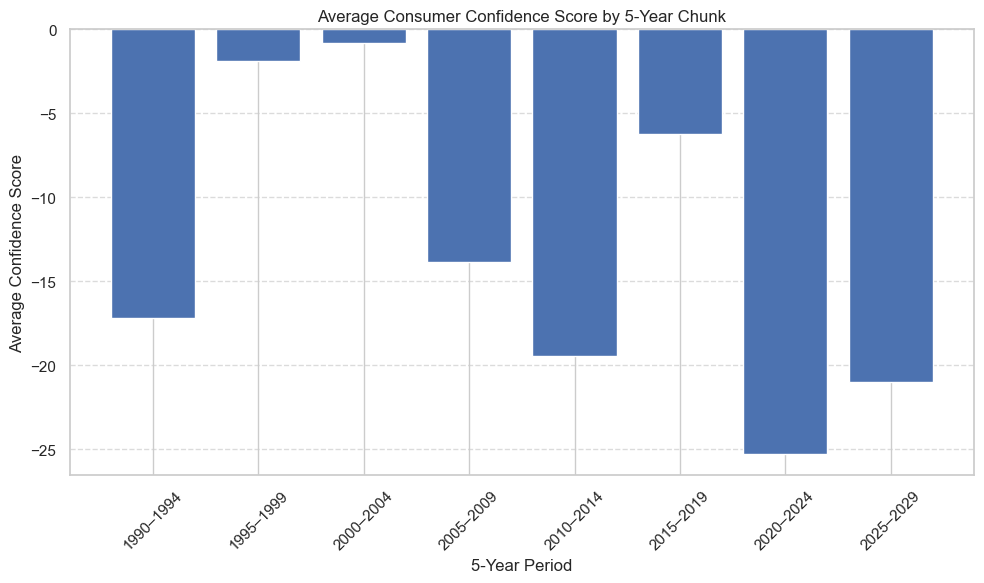

In [798]:
# Draw visual 

# Plotting
#plt.figure(figsize=(10, 6))
#plt.bar(grouped_customer_confidence['Year_Chunk'], grouped_customer_confidence['confidence_score'])
#plt.title('Average Consumer Confidence Score by 5-Year Chunk')
#plt.xlabel('5-Year Period')
#plt.ylabel('Average Confidence Score')
#plt.xticks(rotation=45)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout()
#plt.show()

In [800]:
customer_confidence.to_csv("customer_confidence.csv", index=False)

In [1632]:
# Gamze's path
# ftse_250 = pd.read_excel(r'C:\Users\gamze bozkurt omar\Desktop\Employer_Project\FTSE indices\FTSE indices\FTSE250.xlsx', skiprows=15)

# Elif's path
#ftse_250 = pd.read_csv(r'C:\\Users\\elif\\Desktop\\LSE BoE project\\economicdata\\ftse_250.xls', skiprows=15)

#ftse_250

url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/source_economic_data/ftse_250.xlsx'
ftse_250 = pd.read_excel(url,skiprows=15)
customer_confidence.head()

ftse_250.head(10)

Date        Price  CVol     Change  % Change  \
0 1989-12-29  2661.760010   NaN        NaN       NaN   
1 1990-01-02  2678.939941   NaN  17.179932  0.645435   
2 1990-01-03  2723.300049   NaN  44.360107  1.655883   
3 1990-01-04  2737.810059   NaN  14.510010  0.532810   
4 1990-01-05  2725.350098   NaN -12.459961 -0.455107   
5 1990-01-08  2722.050049   NaN  -3.300049 -0.121087   
6 1990-01-09  2724.629883   NaN   2.579834  0.094775   
7 1990-01-10  2707.239990   NaN -17.389893 -0.638248   
8 1990-01-11  2706.360107   NaN  -0.879883 -0.032501   
9 1990-01-12  2669.780029   NaN -36.580078 -1.351634   

   Total Return (Gross, Unhedged)  Cumulative Return % (Gross, Unhedged)  \
0                      803.789978                                    NaN   
1                      808.969971                               0.644446   
2                      822.369995                               2.311551   
3                      826.750000                               2.856470   
4                      822.989990                               2.388685   
5                      821.989990                               2.264275   
6                      822.770020                               2.361319   
7                      817.520020                               1.708163   
8                      817.250000                               1.674570   
9                      806.210022                               0.301079   

   Open         High          Low  
0   NaN  2661.760010  2661.760010  
1   NaN  2678.939941  2678.939941  
2   NaN  2723.300049  2723.300049  
3   NaN  2737.810059  2737.810059  
4   NaN  2725.350098  2725.350098  
5   NaN  2722.050049  2722.050049  
6   NaN  2724.629883  2724.629883  
7   NaN  2707.239990  2707.239990  
8   NaN  2706.360107  2706.360107  
9   NaN  2669.780029  2669.780029

In [1634]:
print(ftse_250.columns.tolist())


['Date', 'Price', 'CVol', 'Change', '% Change', 'Total Return (Gross, Unhedged)', 'Cumulative Return % (Gross, Unhedged)', 'Open', 'High', 'Low']


In [1636]:
# Drop completely empty rows and columns
ftse_250.dropna(how='all', axis=0, inplace=True)
ftse_250.dropna(how='all', axis=1, inplace=True)

# Rename first relevant columns if needed
ftse_250.columns = ftse_250.columns.str.strip()  # remove whitespace
print("Columns after cleaning:", ftse_250.columns.tolist())

# Convert Date column to datetime
ftse_250['Date'] = pd.to_datetime(ftse_250['Date'], errors='coerce')

# Convert numeric columns
ftse_250['Price'] = pd.to_numeric(ftse_250['Price'], errors='coerce')
ftse_250['Total Return (Gross, Unhedged)'] = pd.to_numeric(ftse_250['Total Return (Gross, Unhedged)'], errors='coerce')

# Drop rows where any of the key values are missing
ftse_250 = ftse_250.dropna(subset=['Date', 'Price', 'Total Return (Gross, Unhedged)'])

# Keep only essential columns
ftse_250 = ftse_250[['Date', 'Price', 'Total Return (Gross, Unhedged)']].copy()

# Reset index
ftse_250.reset_index(drop=True, inplace=True)

# Preview
ftse_250.head()

Columns after cleaning: ['Date', 'Price', 'CVol', 'Change', '% Change', 'Total Return (Gross, Unhedged)', 'Cumulative Return % (Gross, Unhedged)', 'Open', 'High', 'Low']


Date        Price  Total Return (Gross, Unhedged)
0 1989-12-29  2661.760010                      803.789978
1 1990-01-02  2678.939941                      808.969971
2 1990-01-03  2723.300049                      822.369995
3 1990-01-04  2737.810059                      826.750000
4 1990-01-05  2725.350098                      822.989990

In [1638]:
# Extract only the last day of each month
ftse_250["Month"] = ftse_250["Date"].dt.to_period("M")
ftse_250 = ftse_250.sort_values(by="Date").drop_duplicates(subset=["Month"], keep="last").drop(columns=["Month"]).reset_index(drop=True)
ftse_250.head()

Date        Price  Total Return (Gross, Unhedged)
0 1989-12-29  2661.760010                      803.789978
1 1990-01-31  2591.129883                      783.250000
2 1990-02-28  2463.879883                      746.010010
3 1990-03-30  2437.370117                      741.700012
4 1990-04-30  2285.780029                      701.510010

In [1640]:
# Set the day to 1st for all rows, keeping the month and year the same
ftse_250["Date"] = ftse_250["Date"].apply(lambda x: x.replace(day=1))
ftse_250.head()

Date        Price  Total Return (Gross, Unhedged)
0 1989-12-01  2661.760010                      803.789978
1 1990-01-01  2591.129883                      783.250000
2 1990-02-01  2463.879883                      746.010010
3 1990-03-01  2437.370117                      741.700012
4 1990-04-01  2285.780029                      701.510010

In [1381]:
ftse_250.to_csv("ftse_250.csv", index=False)

In [1383]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/source_economic_data/ftse_350.xlsx'
ftse_350 = pd.read_excel(url,skiprows=15)
ftse_350.head(10)

Date        Price  CVol     Change  % Change  \
0 1990-01-01  1205.910034   NaN        NaN       NaN   
1 1990-01-02  1212.040039   NaN   6.130005  0.508330   
2 1990-01-03  1227.989990   NaN  15.949951  1.315959   
3 1990-01-04  1224.829956   NaN  -3.160034 -0.257334   
4 1990-01-05  1220.810059   NaN  -4.019897 -0.328200   
5 1990-01-08  1215.430054   NaN  -5.380005 -0.440691   
6 1990-01-09  1217.599976   NaN   2.169922  0.178531   
7 1990-01-10  1206.709961   NaN -10.890015 -0.894384   
8 1990-01-11  1208.660034   NaN   1.950073  0.161602   
9 1990-01-12  1190.359985   NaN -18.300049 -1.514077   

   Total Return (Gross, Unhedged)  Cumulative Return % (Gross, Unhedged)  \
0                      748.419983                                    NaN   
1                      752.219971                               0.507735   
2                      762.119995                               1.830525   
3                      760.159973                               1.568637   
4                      758.200012                               1.306757   
5                      754.849976                               0.859142   
6                      756.200012                               1.039527   
7                      749.440002                               0.136290   
8                      750.650024                               0.297967   
9                      739.280029                              -1.221233   

   Open         High          Low  
0   NaN  1205.910034  1205.910034  
1   NaN  1212.040039  1212.040039  
2   NaN  1227.989990  1227.989990  
3   NaN  1224.829956  1224.829956  
4   NaN  1220.810059  1220.810059  
5   NaN  1215.430054  1215.430054  
6   NaN  1217.599976  1217.599976  
7   NaN  1206.709961  1206.709961  
8   NaN  1208.660034  1208.660034  
9   NaN  1190.359985  1190.359985

In [1384]:
# Drop completely empty rows and columns
ftse_350.dropna(how='all', axis=0, inplace=True)
ftse_350.dropna(how='all', axis=1, inplace=True)

# Rename first relevant columns if needed
ftse_350.columns = ftse_350.columns.str.strip()  # remove whitespace
print("Columns after cleaning:", ftse_350.columns.tolist())

# Convert Date column to datetime
ftse_350['Date'] = pd.to_datetime(ftse_350['Date'], errors='coerce')

# Convert numeric columns
ftse_350['Price'] = pd.to_numeric(ftse_350['Price'], errors='coerce')
ftse_350['Total Return (Gross, Unhedged)'] = pd.to_numeric(ftse_350['Total Return (Gross, Unhedged)'], errors='coerce')

# Drop rows where any of the key values are missing
ftse_350 = ftse_350.dropna(subset=['Date', 'Price', 'Total Return (Gross, Unhedged)'])

# Keep only essential columns
ftse_350 = ftse_350[['Date', 'Price', 'Total Return (Gross, Unhedged)']].copy()

# Reset index
ftse_350.reset_index(drop=True, inplace=True)

# Preview
ftse_350.head()

Columns after cleaning: ['Date', 'Price', 'CVol', 'Change', '% Change', 'Total Return (Gross, Unhedged)', 'Cumulative Return % (Gross, Unhedged)', 'Open', 'High', 'Low']


Date        Price  Total Return (Gross, Unhedged)
0 1990-01-01  1205.910034                      748.419983
1 1990-01-02  1212.040039                      752.219971
2 1990-01-03  1227.989990                      762.119995
3 1990-01-04  1224.829956                      760.159973
4 1990-01-05  1220.810059                      758.200012

In [1386]:
# Extract only the last day of each month
ftse_350["Month"] = ftse_350["Date"].dt.to_period("M")
ftse_350 = ftse_350.sort_values(by="Date").drop_duplicates(subset=["Month"], keep="last").drop(columns=["Month"]).reset_index(drop=True)
ftse_350.head()

Date        Price  Total Return (Gross, Unhedged)
0 1990-01-31  1165.829956                      725.320007
1 1990-02-28  1121.469971                      700.580017
2 1990-03-30  1115.699951                      701.400024
3 1990-04-30  1044.619995                      660.010010
4 1990-05-31  1158.219971                      735.140015

In [1389]:
# Set the day to 1st for all rows, keeping the month and year the same
ftse_350["Date"] = ftse_350["Date"].apply(lambda x: x.replace(day=1))
ftse_350.head()

Date        Price  Total Return (Gross, Unhedged)
0 1990-01-01  1165.829956                      725.320007
1 1990-02-01  1121.469971                      700.580017
2 1990-03-01  1115.699951                      701.400024
3 1990-04-01  1044.619995                      660.010010
4 1990-05-01  1158.219971                      735.140015

In [1391]:
ftse_350.to_csv("ftse_350.csv", index=False)

In [1393]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/source_economic_data/Unemployment.csv'
unemployment = pd.read_csv(url, skiprows=505, header=None)
unemployment.head(10)

# file_path = r"C:\Users\gamze bozkurt omar\Desktop\Employer_Project\Unemployment rate\Unemployment rate\Unemployment.csv"
# unemployment = pd.read_csv(file_path, skiprows=277)
# unemployment.head(100)

0    1
0  1990 JAN  6.9
1  1990 FEB  6.9
2  1990 MAR  6.9
3  1990 APR  6.9
4  1990 MAY  6.9
5  1990 JUN  6.9
6  1990 JUL  7.0
7  1990 AUG  7.1
8  1990 SEP  7.2
9  1990 OCT  7.3

In [1395]:
# Rename the columns properly
unemployment.columns = ['Date', 'unemployment_rate']

# Convert 'date' to datetime
unemployment['Date'] = pd.to_datetime(unemployment['Date'], format='%Y %b', errors='coerce')

# Convert unemployment_rate to numeric
unemployment['unemployment_rate'] = pd.to_numeric(unemployment['unemployment_rate'], errors='coerce')

#Drop the original 'date' column 
unemployment_clean = unemployment[['Date', 'unemployment_rate']].copy()

#preview
unemployment_clean.head(12)


Date  unemployment_rate
0  1990-01-01                6.9
1  1990-02-01                6.9
2  1990-03-01                6.9
3  1990-04-01                6.9
4  1990-05-01                6.9
5  1990-06-01                6.9
6  1990-07-01                7.0
7  1990-08-01                7.1
8  1990-09-01                7.2
9  1990-10-01                7.3
10 1990-11-01                7.5
11 1990-12-01                7.6

In [1397]:
unemployment.to_csv("unemployment.csv", index=False)

In [1399]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/source_economic_data/Wage_growth.csv'
wage = pd.read_csv(url, skiprows=8, header=None)
wage.head(10)


# file_path = r"C:\Users\gamze bozkurt omar\Desktop\Employer_Project\Wage growth\Wage growth\Wage growth.csv"
# wage = pd.read_csv(file_path, skiprows=7)
# wage.head(100)

0    1
0  2001 MAR  6.1
1  2001 APR  6.2
2  2001 MAY  5.1
3  2001 JUN  5.5
4  2001 JUL  5.2
5  2001 AUG  5.3
6  2001 SEP  4.8
7  2001 OCT  4.8
8  2001 NOV  4.6
9  2001 DEC  4.2

In [1401]:
# Drop fully empty columns
# wage.dropna(axis=1, how='all', inplace=True)

# View column names to identify correct ones
print(wage.columns)

Index([0, 1], dtype='int64')


In [1403]:
# Let's say the first two columns are what you want:
wage = wage.iloc[:, :2]
wage.columns = ['Date', 'growth_rate']

# Convert 'date' and 'growth_rate'
wage['Date'] = pd.to_datetime(wage['Date'], format='%Y %b', errors='coerce')
wage['growth_rate'] = pd.to_numeric(wage['growth_rate'], errors='coerce')

# Final cleaned version
wage_clean = wage[['Date', 'growth_rate']].dropna()
wage_clean.reset_index(drop=True, inplace=True)

# Preview
wage_clean.head()


Date  growth_rate
0 2001-03-01          6.1
1 2001-04-01          6.2
2 2001-05-01          5.1
3 2001-06-01          5.5
4 2001-07-01          5.2

In [1405]:
wage.to_csv("wage.csv", index=False)


In [1407]:
# file_path = r"C:\Users\gamze bozkurt omar\Desktop\Employer_Project\UK gilts\UK gilts\UK gilts 0-2 years.xls"
# price_02 = pd.read_excel(file_path, skiprows=15)
# price_02.head(10)

url = 'https://raw.githubusercontent.com/gamzebb/group-project/main/source_economic_data/UK_gilts_02_years.xlsx'
price_02 = pd.read_excel(url, skiprows=15)
price_02.head(10)

Date  Price  CVol  Change  % Change  Total Return (Gross, Unhedged)  \
0 1989-12-29    NaN   NaN     NaN       NaN                             NaN   
1 1990-01-02    NaN   NaN     NaN       NaN                             NaN   
2 1990-01-03    NaN   NaN     NaN       NaN                             NaN   
3 1990-01-04    NaN   NaN     NaN       NaN                             NaN   
4 1990-01-05    NaN   NaN     NaN       NaN                             NaN   
5 1990-01-08    NaN   NaN     NaN       NaN                             NaN   
6 1990-01-09    NaN   NaN     NaN       NaN                             NaN   
7 1990-01-10    NaN   NaN     NaN       NaN                             NaN   
8 1990-01-11    NaN   NaN     NaN       NaN                             NaN   
9 1990-01-12    NaN   NaN     NaN       NaN                             NaN   

   Cumulative Return % (Gross, Unhedged)  Open  High  Low  
0                                    NaN   NaN   NaN  NaN  
1                                    NaN   NaN   NaN  NaN  
2                                    NaN   NaN   NaN  NaN  
3                                    NaN   NaN   NaN  NaN  
4                                    NaN   NaN   NaN  NaN  
5                                    NaN   NaN   NaN  NaN  
6                                    NaN   NaN   NaN  NaN  
7                                    NaN   NaN   NaN  NaN  
8                                    NaN   NaN   NaN  NaN  
9                                    NaN   NaN   NaN  NaN

In [1408]:
# Drop completely empty rows and columns
price_02.dropna(how='all', axis=0, inplace=True)
price_02.dropna(how='all', axis=1, inplace=True)

# Rename first relevant columns if needed
price_02.columns = price_02.columns.str.strip()  # remove whitespace
print("Columns after cleaning:", price_02.columns.tolist())

# Convert Date column to datetime
price_02['Date'] = pd.to_datetime(price_02['Date'], errors='coerce')

# Convert numeric columns
price_02['Price'] = pd.to_numeric(price_02['Price'], errors='coerce')
price_02['Total Return (Gross, Unhedged)'] = pd.to_numeric(price_02['Total Return (Gross, Unhedged)'], errors='coerce')

# Drop rows where any of the key values are missing
price_02 = price_02.dropna(subset=['Date', 'Price', 'Total Return (Gross, Unhedged)'])

# Keep only essential columns
price_02 = price_02[['Date', 'Price', 'Total Return (Gross, Unhedged)']].copy()

# Reset index
price_02.reset_index(drop=True, inplace=True)

# Preview
price_02.head()

Columns after cleaning: ['Date', 'Price', 'Change', '% Change', 'Total Return (Gross, Unhedged)', 'Cumulative Return % (Gross, Unhedged)', 'High', 'Low']


Date       Price  Total Return (Gross, Unhedged)
0 1998-06-30  101.433370                         100.000
1 1998-07-01  101.438240                         100.030
2 1998-07-02  101.416245                         100.033
3 1998-07-06  101.390590                         100.107
4 1998-07-07  101.356990                         100.099

In [1411]:
# Extract only the last day of each month
price_02["Month"] = price_02["Date"].dt.to_period("M")
price_02 = price_02.sort_values(by="Date").drop_duplicates(subset=["Month"], keep="last").drop(columns=["Month"]).reset_index(drop=True)
price_02.head()

Date       Price  Total Return (Gross, Unhedged)
0 1998-06-30  101.433370                         100.000
1 1998-07-31  102.384260                         100.665
2 1998-08-31  102.724594                         101.796
3 1998-09-30  102.841484                         102.608
4 1998-10-30  102.788030                         103.335

In [1413]:
# Set the day to 1st for all rows, keeping the month and year the same
price_02["Date"] = price_02["Date"].apply(lambda x: x.replace(day=1))
price_02.head()

Date       Price  Total Return (Gross, Unhedged)
0 1998-06-01  101.433370                         100.000
1 1998-07-01  102.384260                         100.665
2 1998-08-01  102.724594                         101.796
3 1998-09-01  102.841484                         102.608
4 1998-10-01  102.788030                         103.335

In [1415]:
price_02.to_csv("price_02.csv", index=False)

In [1417]:
# file_path = r"C:\Users\gamze bozkurt omar\Desktop\Employer_Project\UK gilts\UK gilts\PriceHistory_05.xlsx"
# price_05 = pd.read_excel(file_path, skiprows=15)
# price_05.head(10)

url = 'https://raw.githubusercontent.com/gamzebb/group-project/main/source_economic_data/UK_gilts_5_years.xlsx'
price_05 = pd.read_excel(url, skiprows=15)
price_05.head(10)

Date  Price  CVol  Change  % Change  Total Return (Gross, Unhedged)  \
0 1989-12-29    NaN   NaN     NaN       NaN                             NaN   
1 1990-01-02    NaN   NaN     NaN       NaN                             NaN   
2 1990-01-03    NaN   NaN     NaN       NaN                             NaN   
3 1990-01-04    NaN   NaN     NaN       NaN                             NaN   
4 1990-01-05    NaN   NaN     NaN       NaN                             NaN   
5 1990-01-08    NaN   NaN     NaN       NaN                             NaN   
6 1990-01-09    NaN   NaN     NaN       NaN                             NaN   
7 1990-01-10    NaN   NaN     NaN       NaN                             NaN   
8 1990-01-11    NaN   NaN     NaN       NaN                             NaN   
9 1990-01-12    NaN   NaN     NaN       NaN                             NaN   

   Cumulative Return % (Gross, Unhedged)  Open  High  Low  
0                                    NaN   NaN   NaN  NaN  
1                                    NaN   NaN   NaN  NaN  
2                                    NaN   NaN   NaN  NaN  
3                                    NaN   NaN   NaN  NaN  
4                                    NaN   NaN   NaN  NaN  
5                                    NaN   NaN   NaN  NaN  
6                                    NaN   NaN   NaN  NaN  
7                                    NaN   NaN   NaN  NaN  
8                                    NaN   NaN   NaN  NaN  
9                                    NaN   NaN   NaN  NaN

In [1418]:
# Drop completely empty rows and columns
price_05.dropna(how='all', axis=0, inplace=True)
price_05.dropna(how='all', axis=1, inplace=True)

# Rename first relevant columns if needed
price_05.columns = price_05.columns.str.strip()  # remove whitespace
print("Columns after cleaning:", price_05.columns.tolist())

# Convert Date column to datetime
price_05['Date'] = pd.to_datetime(price_05['Date'], errors='coerce')

# Convert numeric columns
price_05['Price'] = pd.to_numeric(price_05['Price'], errors='coerce')
price_05['Total Return (Gross, Unhedged)'] = pd.to_numeric(price_05['Total Return (Gross, Unhedged)'], errors='coerce')

# Drop rows where any of the key values are missing
price_05 = price_05.dropna(subset=['Date', 'Price', 'Total Return (Gross, Unhedged)'])

# Keep only essential columns
price_05 = price_05[['Date', 'Price', 'Total Return (Gross, Unhedged)']].copy()

# Reset index
price_05.reset_index(drop=True, inplace=True)

# Preview
price_05.head()

Columns after cleaning: ['Date', 'Price', 'Change', '% Change', 'Total Return (Gross, Unhedged)', 'Cumulative Return % (Gross, Unhedged)', 'High', 'Low']


Date       Price  Total Return (Gross, Unhedged)
0 1998-06-30  120.226746                         100.000
1 1998-07-01  120.347590                         100.101
2 1998-07-02  120.558136                         100.276
3 1998-07-06  120.872734                         100.537
4 1998-07-07  120.592600                         100.304

In [1419]:
# Extract only the last day of each month
price_05["Month"] = price_05["Date"].dt.to_period("M")
price_05 = price_05.sort_values(by="Date").drop_duplicates(subset=["Month"], keep="last").drop(columns=["Month"]).reset_index(drop=True)
price_05.head()

Date       Price  Total Return (Gross, Unhedged)
0 1998-06-30  120.226746                         100.000
1 1998-07-31  119.992150                         101.012
2 1998-08-31  124.220000                         104.757
3 1998-09-30  128.875000                         109.078
4 1998-10-30  127.111050                         107.962

In [1423]:
# Set the day to 1st for all rows, keeping the month and year the same
price_05["Date"] = price_05["Date"].apply(lambda x: x.replace(day=1))
price_05.head()

Date       Price  Total Return (Gross, Unhedged)
0 1998-06-01  120.226746                         100.000
1 1998-07-01  119.992150                         101.012
2 1998-08-01  124.220000                         104.757
3 1998-09-01  128.875000                         109.078
4 1998-10-01  127.111050                         107.962

In [1425]:
price_05.to_csv("price_05.csv", index=False)

In [1427]:
# file_path = r"C:\Users\gamze bozkurt omar\Desktop\Employer_Project\UK gilts\UK gilts\PriceHistory_10.xlsx"
# price_10 = pd.read_excel(file_path, skiprows=15)
# price_10.head(10)

url = 'https://raw.githubusercontent.com/gamzebb/group-project/main/source_economic_data/UK_gilts_10_years.xlsx'
price_10 = pd.read_excel(url, skiprows=15)
price_10.head(10)

Date  Price  CVol  Change  % Change  Total Return (Gross, Unhedged)  \
0 1989-12-29    NaN   NaN     NaN       NaN                             NaN   
1 1990-01-02    NaN   NaN     NaN       NaN                             NaN   
2 1990-01-03    NaN   NaN     NaN       NaN                             NaN   
3 1990-01-04    NaN   NaN     NaN       NaN                             NaN   
4 1990-01-05    NaN   NaN     NaN       NaN                             NaN   
5 1990-01-08    NaN   NaN     NaN       NaN                             NaN   
6 1990-01-09    NaN   NaN     NaN       NaN                             NaN   
7 1990-01-10    NaN   NaN     NaN       NaN                             NaN   
8 1990-01-11    NaN   NaN     NaN       NaN                             NaN   
9 1990-01-12    NaN   NaN     NaN       NaN                             NaN   

   Total Return - rebased  Cumulative Return % (Gross, Unhedged)  Open  High  \
0                     NaN                                    NaN   NaN   NaN   
1                     NaN                                    NaN   NaN   NaN   
2                     NaN                                    NaN   NaN   NaN   
3                     NaN                                    NaN   NaN   NaN   
4                     NaN                                    NaN   NaN   NaN   
5                     NaN                                    NaN   NaN   NaN   
6                     NaN                                    NaN   NaN   NaN   
7                     NaN                                    NaN   NaN   NaN   
8                     NaN                                    NaN   NaN   NaN   
9                     NaN                                    NaN   NaN   NaN   

   Low  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  
5  NaN  
6  NaN  
7  NaN  
8  NaN  
9  NaN

In [1428]:
# Drop completely empty rows and columns
price_10.dropna(how='all', axis=0, inplace=True)
price_10.dropna(how='all', axis=1, inplace=True)

# Rename first relevant columns if needed
price_10.columns = price_10.columns.str.strip()  # remove whitespace
print("Columns after cleaning:", price_10.columns.tolist())

# Convert Date column to datetime
price_10['Date'] = pd.to_datetime(price_10['Date'], errors='coerce')

# Convert numeric columns
price_10['Price'] = pd.to_numeric(price_10['Price'], errors='coerce')
price_10['Total Return (Gross, Unhedged)'] = pd.to_numeric(price_10['Total Return (Gross, Unhedged)'], errors='coerce')

# Drop rows where any of the key values are missing
price_10 = price_10.dropna(subset=['Date', 'Price', 'Total Return (Gross, Unhedged)'])

# Keep only essential columns
price_10 = price_10[['Date', 'Price', 'Total Return (Gross, Unhedged)']].copy()

# Reset index
price_10.reset_index(drop=True, inplace=True)

# Preview
price_10.head()

Columns after cleaning: ['Date', 'Price', 'Change', '% Change', 'Total Return (Gross, Unhedged)', 'Total Return - rebased', 'Cumulative Return % (Gross, Unhedged)', 'High', 'Low']


Date      Price  Total Return (Gross, Unhedged)
0 1996-12-31  106.49000                         343.756
1 1997-01-02  103.35029                         340.691
2 1997-01-03  102.62843                         338.425
3 1997-01-06  102.19505                         337.243
4 1997-01-07  102.14857                         337.165

In [1431]:
# Extract only the last day of each month
price_10["Month"] = price_10["Date"].dt.to_period("M")
price_10 = price_10.sort_values(by="Date").drop_duplicates(subset=["Month"], keep="last").drop(columns=["Month"]).reset_index(drop=True)
price_10.head()

Date    Price  Total Return (Gross, Unhedged)
0 1996-12-31  106.490                         343.756
1 1997-01-31  105.410                         347.208
2 1997-02-28  107.230                         354.659
3 1997-03-31  104.107                         346.213
4 1997-04-30  105.982                         353.532

In [1433]:
# Set the day to 1st for all rows, keeping the month and year the same
price_10["Date"] = price_10["Date"].apply(lambda x: x.replace(day=1))
price_10.head()

Date    Price  Total Return (Gross, Unhedged)
0 1996-12-01  106.490                         343.756
1 1997-01-01  105.410                         347.208
2 1997-02-01  107.230                         354.659
3 1997-03-01  104.107                         346.213
4 1997-04-01  105.982                         353.532

In [1435]:
price_10.to_csv("price_10.csv", index=False)


In [1487]:
# Gamze's path
#base_rate = pd.read_csv(r"C:\Users\gamze bozkurt omar\Desktop\Employer_Project\boe_base_rate.csv")

# Elif's path
# base_rate = pd.read_csv(r"C:\Users\elif\Desktop\LSE BoE project\base_rate.xls")


url = 'https://raw.githubusercontent.com/gamzebb/group-project/main/source_economic_data/boe_base_rate.csv'
base_rate = pd.read_csv(url)
base_rate.head(10)

base_rate.head()

Date Changed  Rate
0    06 Feb 25  4.50
1    07 Nov 24  4.75
2    01 Aug 24  5.00
3    03 Aug 23  5.25
4    22 Jun 23  5.00

In [1489]:
# Rename 'Date Changed' to 'Date' for consistency
base_rate.rename(columns={'Date Changed': 'Date'}, inplace=True)

# Convert the Date column to datetime format
base_rate['Date'] = pd.to_datetime(base_rate['Date'], format='%d %b %y', errors='coerce')

# Drop rows with missing dates
base_rate.dropna(subset=["Date"], inplace=True)

# Set the date as the index for resampling
base_rate.set_index("Date", inplace=True)

# Resample to month-end frequency, using interpolation for missing months
base_rate = base_rate.resample("M").mean().interpolate()

# Reset the index to get the Date column back in the correct format
base_rate.reset_index(inplace=True)

# Convert the date back to 'YYYY-MM-DD' format if needed
base_rate['Date'] = base_rate['Date'].dt.strftime('%Y-%m-%d')

# Preview the result
base_rate.head()


C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_37872\1866069636.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  base_rate = base_rate.resample("M").mean().interpolate()


Date    Rate
0  1975-01-31  11.125
1  1975-02-28  10.625
2  1975-03-31  10.125
3  1975-04-30   9.750
4  1975-05-31  10.000

In [1491]:
# Convert the Date column to the 1st of each month
base_rate['Date'] = pd.to_datetime(base_rate['Date'], errors='coerce')
base_rate.dropna(subset=['Date'], inplace=True)

# Set the day to the 1st of each month
base_rate['Date'] = base_rate['Date'].dt.to_period("M").dt.to_timestamp()

base_rate.head()

Date    Rate
0 1975-01-01  11.125
1 1975-02-01  10.625
2 1975-03-01  10.125
3 1975-04-01   9.750
4 1975-05-01  10.000

In [1493]:
base_rate.to_csv("base_rate.csv", index=False)

In [1462]:
#Create copy of df 
base_rate_new = base_rate.copy()
# Rename column
base_rate_new.rename(columns={'Date Changed': 'Date'}, inplace=True)

# Convert Date column to datetime
base_rate_new['Date'] = pd.to_datetime(base_rate_new['Date'], format='%d %b %y')

# Extract Year and Month
base_rate_new['Year'] = base_rate_new['Date'].dt.year
# Add month names instead of numeric month values
base_rate_new['Month'] = base_rate_new['Date'].dt.strftime('%B')
base_rate_new

Date   Rate  Year     Month  RateChange Direction  Magnitude
254 1975-01-20  11.25  1975   January        0.00     Start       0.00
253 1975-01-27  11.00  1975   January       -0.25      Down       0.25
252 1975-02-10  10.75  1975  February       -0.25      Down       0.25
251 1975-02-17  10.50  1975  February       -0.25      Down       0.25
250 1975-03-10  10.25  1975     March       -0.25      Down       0.25
..         ...    ...   ...       ...         ...       ...        ...
4   2023-06-22   5.00  2023      June        0.50        Up       0.50
3   2023-08-03   5.25  2023    August        0.25        Up       0.25
2   2024-08-01   5.00  2024    August       -0.25      Down       0.25
1   2024-11-07   4.75  2024  November       -0.25      Down       0.25
0   2025-02-06   4.50  2025  February       -0.25      Down       0.25

[255 rows x 7 columns]

**To determine the direction and magnitude of the change in the interest rate over time, we can compute the difference between each rate and the previous one using the diff() function in pandas.
Here’s how to interpret it:
Direction:
Positive → Rate increased
Negative → Rate decreased
Zero → No change
Magnitude:
The absolute value of the difference (e.g., abs(+0.75) = 0.75)**

In [1465]:
base_rate_new = base_rate_new.sort_values(by="Date")  # Ensure it's sorted chronologically
# Calculate RateChange, Direction, and Magnitude
base_rate_new['RateChange'] = base_rate_new['Rate'].diff().fillna(0)
base_rate_new['Direction'] = base_rate_new['RateChange'].apply(lambda x: 'Up' if x > 0 else 'Down' if x < 0 else 'Start')
base_rate_new['Magnitude'] = base_rate_new['RateChange'].abs()

base_rate_new


Date   Rate  Year     Month  RateChange Direction  Magnitude
254 1975-01-20  11.25  1975   January        0.00     Start       0.00
253 1975-01-27  11.00  1975   January       -0.25      Down       0.25
252 1975-02-10  10.75  1975  February       -0.25      Down       0.25
251 1975-02-17  10.50  1975  February       -0.25      Down       0.25
250 1975-03-10  10.25  1975     March       -0.25      Down       0.25
..         ...    ...   ...       ...         ...       ...        ...
4   2023-06-22   5.00  2023      June        0.50        Up       0.50
3   2023-08-03   5.25  2023    August        0.25        Up       0.25
2   2024-08-01   5.00  2024    August       -0.25      Down       0.25
1   2024-11-07   4.75  2024  November       -0.25      Down       0.25
0   2025-02-06   4.50  2025  February       -0.25      Down       0.25

[255 rows x 7 columns]

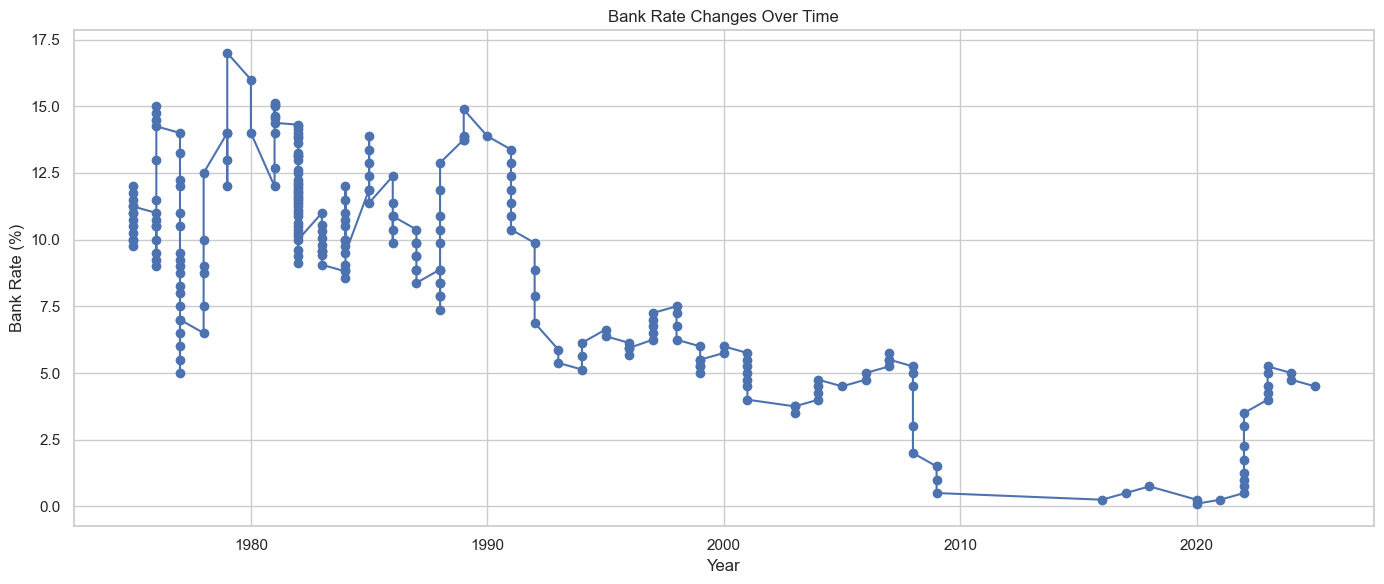

In [1467]:
# Plot interest rate over time with rate changes
plt.figure(figsize=(14, 6))
plt.plot(base_rate_new['Year'], base_rate_new['Rate'], marker='o', linestyle='-')

# Annotate each point with direction and magnitude
for idx, row in base_rate_new.iterrows():
    label = f"{row['Direction']} ({row['Magnitude']:.2f})" if row['Direction'] != 'Start' else "Start"
    plt.annotate(label, (row['Date'], row['Rate']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.title("Bank Rate Changes Over Time")
plt.xlabel("Year")
plt.ylabel("Bank Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [1469]:
# Filter data for years between 2019 and 2021
df_magnitude_year = base_rate_new[(base_rate_new['Year'] >= 2000) & (base_rate_new['Year'] <= 2023)]

df_magnitude_year

Date  Rate  Year      Month  RateChange Direction  Magnitude
52 2000-01-13  5.75  2000    January        0.25        Up       0.25
51 2000-02-10  6.00  2000   February        0.25        Up       0.25
50 2001-02-08  5.75  2001   February       -0.25      Down       0.25
49 2001-04-05  5.50  2001      April       -0.25      Down       0.25
48 2001-05-10  5.25  2001        May       -0.25      Down       0.25
47 2001-08-02  5.00  2001     August       -0.25      Down       0.25
46 2001-09-18  4.75  2001  September       -0.25      Down       0.25
45 2001-10-04  4.50  2001    October       -0.25      Down       0.25
44 2001-11-08  4.00  2001   November       -0.50      Down       0.50
43 2003-02-06  3.75  2003   February       -0.25      Down       0.25
42 2003-07-10  3.50  2003       July       -0.25      Down       0.25
41 2003-11-06  3.75  2003   November        0.25        Up       0.25
40 2004-02-05  4.00  2004   February        0.25        Up       0.25
39 2004-05-06  4.25  2004        May        0.25        Up       0.25
38 2004-06-10  4.50  2004       June        0.25        Up       0.25
37 2004-08-05  4.75  2004     August        0.25        Up       0.25
36 2005-08-04  4.50  2005     August       -0.25      Down       0.25
35 2006-08-03  4.75  2006     August        0.25        Up       0.25
34 2006-11-09  5.00  2006   November        0.25        Up       0.25
33 2007-01-11  5.25  2007    January        0.25        Up       0.25
32 2007-05-10  5.50  2007        May        0.25        Up       0.25
31 2007-07-05  5.75  2007       July        0.25        Up       0.25
30 2007-12-06  5.50  2007   December       -0.25      Down       0.25
29 2008-02-07  5.25  2008   February       -0.25      Down       0.25
28 2008-04-10  5.00  2008      April       -0.25      Down       0.25
27 2008-10-08  4.50  2008    October       -0.50      Down       0.50
26 2008-11-06  3.00  2008   November       -1.50      Down       1.50
25 2008-12-04  2.00  2008   December       -1.00      Down       1.00
24 2009-01-08  1.50  2009    January       -0.50      Down       0.50
23 2009-02-05  1.00  2009   February       -0.50      Down       0.50
22 2009-03-05  0.50  2009      March       -0.50      Down       0.50
21 2016-08-04  0.25  2016     August       -0.25      Down       0.25
20 2017-11-02  0.50  2017   November        0.25        Up       0.25
19 2018-08-02  0.75  2018     August        0.25        Up       0.25
18 2020-03-11  0.25  2020      March       -0.50      Down       0.50
17 2020-03-19  0.10  2020      March       -0.15      Down       0.15
16 2021-12-16  0.25  2021   December        0.15        Up       0.15
15 2022-02-03  0.50  2022   February        0.25        Up       0.25
14 2022-03-17  0.75  2022      March        0.25        Up       0.25
13 2022-05-05  1.00  2022        May        0.25        Up       0.25
12 2022-06-16  1.25  2022       June        0.25        Up       0.25
11 2022-08-04  1.75  2022     August        0.50        Up       0.50
10 2022-09-22  2.25  2022  September        0.50        Up       0.50
9  2022-11-03  3.00  2022   November        0.75        Up       0.75
8  2022-12-15  3.50  2022   December        0.50        Up       0.50
7  2023-02-02  4.00  2023   February        0.50        Up       0.50
6  2023-03-23  4.25  2023      March        0.25        Up       0.25
5  2023-05-11  4.50  2023        May        0.25        Up       0.25
4  2023-06-22  5.00  2023       June        0.50        Up       0.50
3  2023-08-03  5.25  2023     August        0.25        Up       0.25

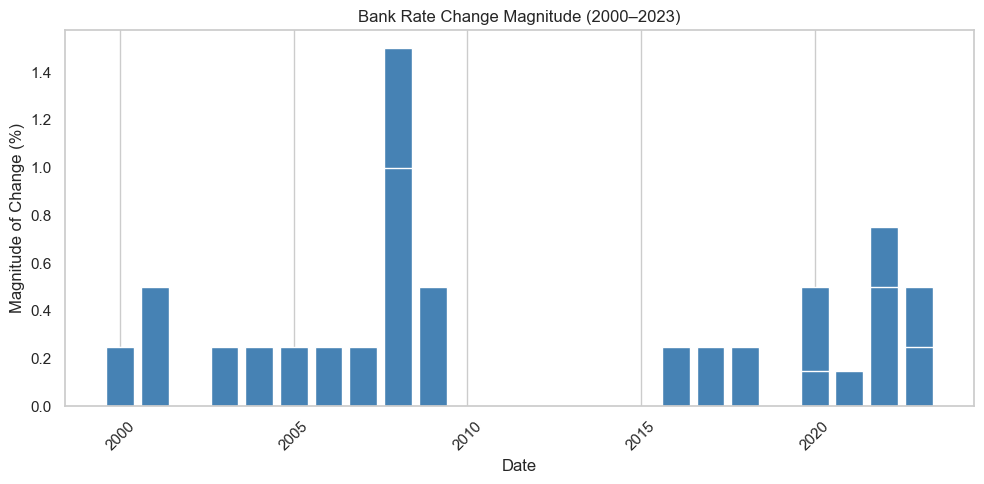

In [1471]:
# Plot magnitude over time
plt.figure(figsize=(10, 5))
plt.bar(df_magnitude_year['Year'], df_magnitude_year['Magnitude'], color='steelblue')
plt.title("Bank Rate Change Magnitude (2000–2023)")
plt.xlabel("Date")
plt.ylabel("Magnitude of Change (%)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Spike Around 2008–2009

The largest changes occurred during the 2008 financial crisis, including a change over 1.5% — a very rare and aggressive policy move.

Multiple large changes in short succession reflect high volatility and emergency monetary policy.

Relatively Flat Periods

From roughly 2010 to 2016, there were few or no rate changes (flat periods in the chart), indicating a stable policy environment.

Increased Activity Around 2020–2022

A cluster of smaller-to-moderate changes reflects responses to COVID-19 and post-pandemic inflation.

What It Implies:
The Bank of England tends to make small, incremental adjustments (e.g., 0.25%).
Major economic shocks (e.g., 2008, 2020) lead to larger or more frequent changes.


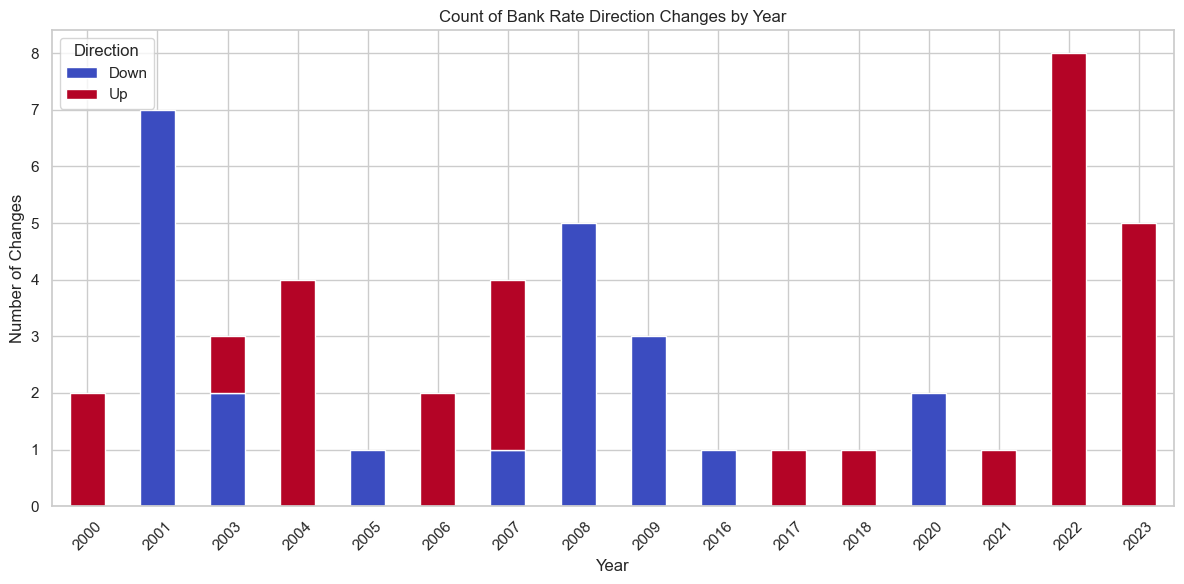

In [1473]:
# Count directions by year
direction_by_year = df_magnitude_year.groupby(['Year', 'Direction']).size().unstack(fill_value=0)

# Plot stacked bar chart
direction_by_year.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title("Count of Bank Rate Direction Changes by Year")
plt.xlabel("Year")
plt.ylabel("Number of Changes")
plt.xticks(rotation=45)
plt.legend(title="Direction")
plt.tight_layout()
plt.show()

 * Key Observations:
2001:

Very high number of rate cuts (7) — likely a response to the dot-com crash and post-9/11 economic slowdown.

* 2008–2009:

Sharp cluster of rate cuts, consistent with the global financial crisis.

Shows aggressive monetary easing.

* 2022–2023:

Most active period of rate hikes in the entire chart — 8 in 2022, 5 in 2023.

Reflects post-COVID inflation and central bank tightening to fight price surges.

* Long Stable Periods:

2010–2019 shows very few changes, reflecting a decade of stable, low interest rates.

* Interpretation:
  
Blue-dominant years = recession response

Red-dominant years = inflation response or recovery

This chart helps track policy stances over time: expansionary (rate cuts) vs. contractionary (rate hikes).

In [1495]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/source_economic_data/CPI.csv'
cpi = pd.read_csv(url, skiprows=7, header=None)
cpi.head(10)

# cpi = pd.read_csv(r"C:\Users\gamze bozkurt omar\Desktop\Employer_Project\CPI data.csv", skiprows=6)
# cpi.head()

0    1
0  1990 JAN  5.7
1  1990 FEB  5.9
2  1990 MAR  6.0
3  1990 APR  6.4
4  1990 MAY  6.8
5  1990 JUN  6.9
6  1990 JUL  6.8
7  1990 AUG  7.7
8  1990 SEP  8.1
9  1990 OCT  8.1

In [1497]:
# Rename columns
cpi.columns = ['Date', 'CPI']

# Convert 'Date' column to datetime (assuming format 'YYYY MON')
cpi['Date'] = pd.to_datetime(cpi['Date'], format='%Y %b')

# Preview
cpi.head()

Date  CPI
0 1990-01-01  5.7
1 1990-02-01  5.9
2 1990-03-01  6.0
3 1990-04-01  6.4
4 1990-05-01  6.8

In [1499]:
cpi.to_csv("cpi.csv", index=False)

In [1501]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/source_economic_data/GDP.csv'
gdp = pd.read_csv(url, skiprows=8, header=None)
gdp.head(10)

# gdp = pd.read_csv(r"C:\Users\gamze bozkurt omar\Desktop\Employer_Project\GDP.csv", skiprows=11)
# gdp.head()

0    1
0  1955 Q2  0.0
1  1955 Q3  2.0
2  1955 Q4 -0.6
3  1956 Q1  1.1
4  1956 Q2 -0.1
5  1956 Q3 -0.1
6  1956 Q4  0.6
7  1957 Q1  1.9
8  1957 Q2  0.0
9  1957 Q3 -0.6

In [1503]:
# Rename the columns for easier processing
gdp.columns = ["Date", "GDP"]

# Convert GDP values to numeric, forcing errors to NaN to handle any non-numeric entries
gdp["GDP"] = pd.to_numeric(gdp["GDP"], errors="coerce")

# Drop any rows with missing GDP values
gdp.dropna(inplace=True)

# Function to expand quarters to full date format
def expand_quarters(row):
    year, quarter = row["Date"].split()
    if quarter == "Q1":
        months = ["12-01", "01-01", "02-01"]  # Dec, Jan, Feb
    elif quarter == "Q2":
        months = ["03-01", "04-01", "05-01"]  # Mar, Apr, May
    elif quarter == "Q3":
        months = ["06-01", "07-01", "08-01"]  # Jun, Jul, Aug
    elif quarter == "Q4":
        months = ["09-01", "10-01", "11-01"]  # Sep, Oct, Nov
    
    # Adjust year for Q1 (spanning two years)
    years = [int(year)-1, int(year), int(year)] if quarter == "Q1" else [int(year)] * 3
    
    # Return one row per month with full date
    return pd.DataFrame({
        "Date": [f"{y}-{m}" for y, m in zip(years, months)],
        "GDP": [row["GDP"]] * 3
    })

# Apply the function to each row to expand quarters into months
gdp_df = pd.concat(gdp.apply(expand_quarters, axis=1).to_list(), ignore_index=True)

# Print the final DataFrame
gdp_df.head()

Date  GDP
0  1955-03-01  0.0
1  1955-04-01  0.0
2  1955-05-01  0.0
3  1955-06-01  2.0
4  1955-07-01  2.0

In [1505]:
gdp_df.to_csv("gdp_df.csv", index=False)

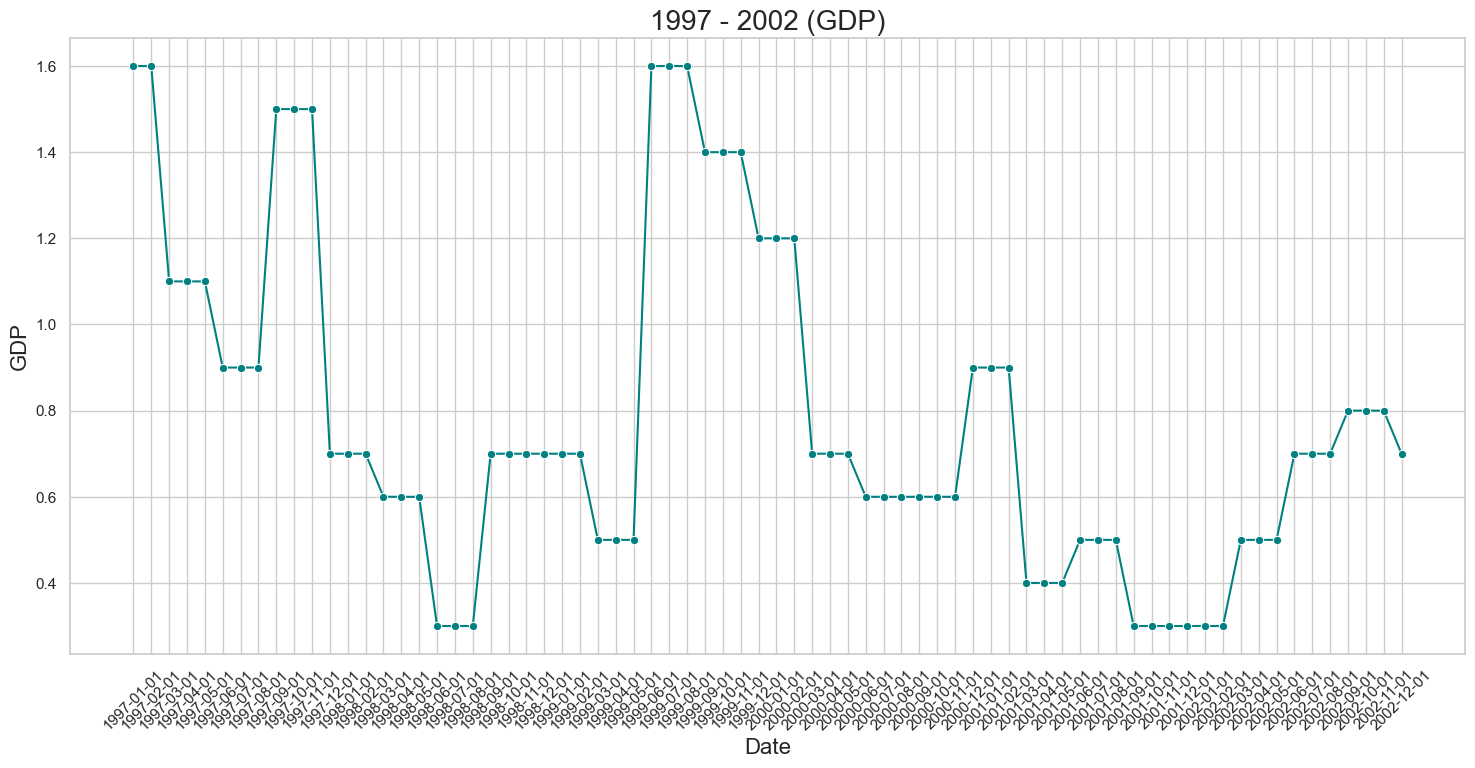

In [1507]:
# 1997-2002 (GDP)
fig, ax = plt.subplots(figsize=(18, 8))
gdp_1997_2002 = gdp_df[(gdp_df['Date'] >= '1997-01-01') & (gdp_df['Date'] < '2002-12-31')]
sns.lineplot(data=gdp_1997_2002, x='Date', y='GDP', marker='o', color='teal', ax=ax)
ax.set_title("1997 - 2002 (GDP)", fontsize=20)
ax.set_ylabel("GDP", fontsize=16)
ax.set_xlabel("Date", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.grid(True)
plt.show()

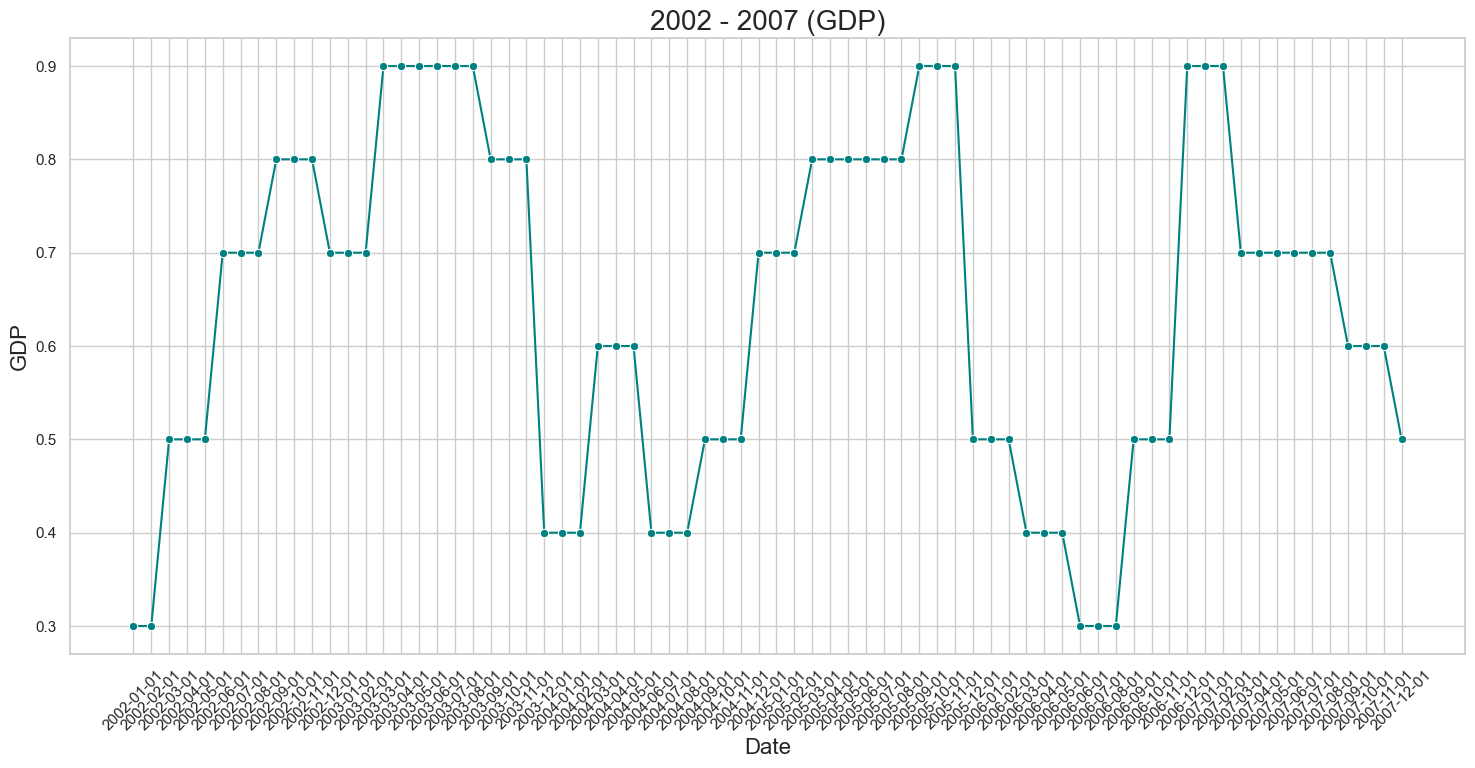

In [1509]:
# 2002-2007 (GDP)
fig, ax = plt.subplots(figsize=(18, 8))
gdp_2002_2007 = gdp_df[(gdp_df['Date'] >= '2002-01-01') & (gdp_df['Date'] < '2007-12-31')]
sns.lineplot(data=gdp_2002_2007, x='Date', y='GDP', marker='o', color='teal', ax=ax)
ax.set_title("2002 - 2007 (GDP)", fontsize=20)
ax.set_ylabel("GDP", fontsize=16)
ax.set_xlabel("Date", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.grid(True)
plt.show()

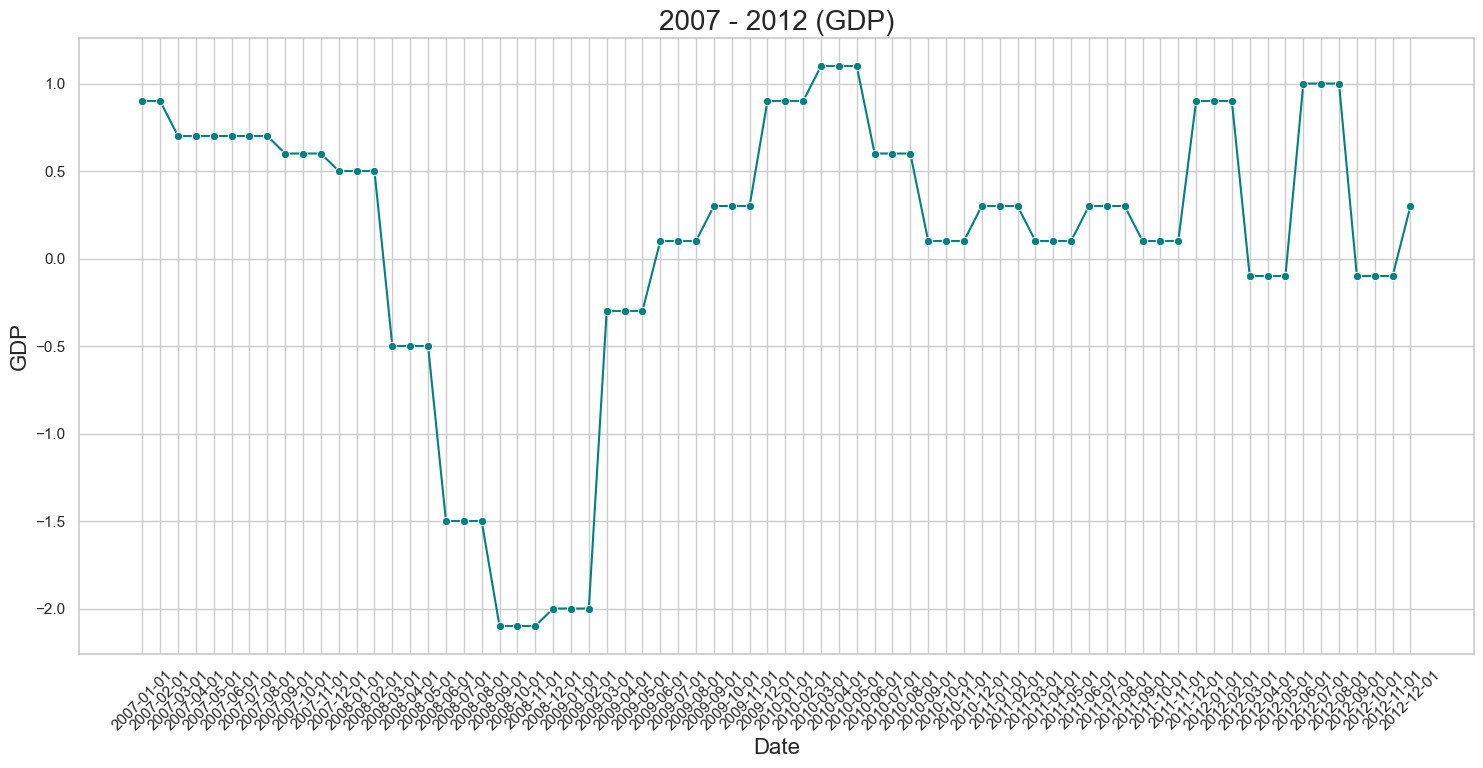

In [1511]:
# 2007-2012 (GDP)
fig, ax = plt.subplots(figsize=(18, 8))
gdp_2007_2012 = gdp_df[(gdp_df['Date'] >= '2007-01-01') & (gdp_df['Date'] < '2012-12-31')]
sns.lineplot(data=gdp_2007_2012, x='Date', y='GDP', marker='o', color='teal', ax=ax)
ax.set_title("2007 - 2012 (GDP)", fontsize=20)
ax.set_ylabel("GDP", fontsize=16)
ax.set_xlabel("Date", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.grid(True)
plt.show()

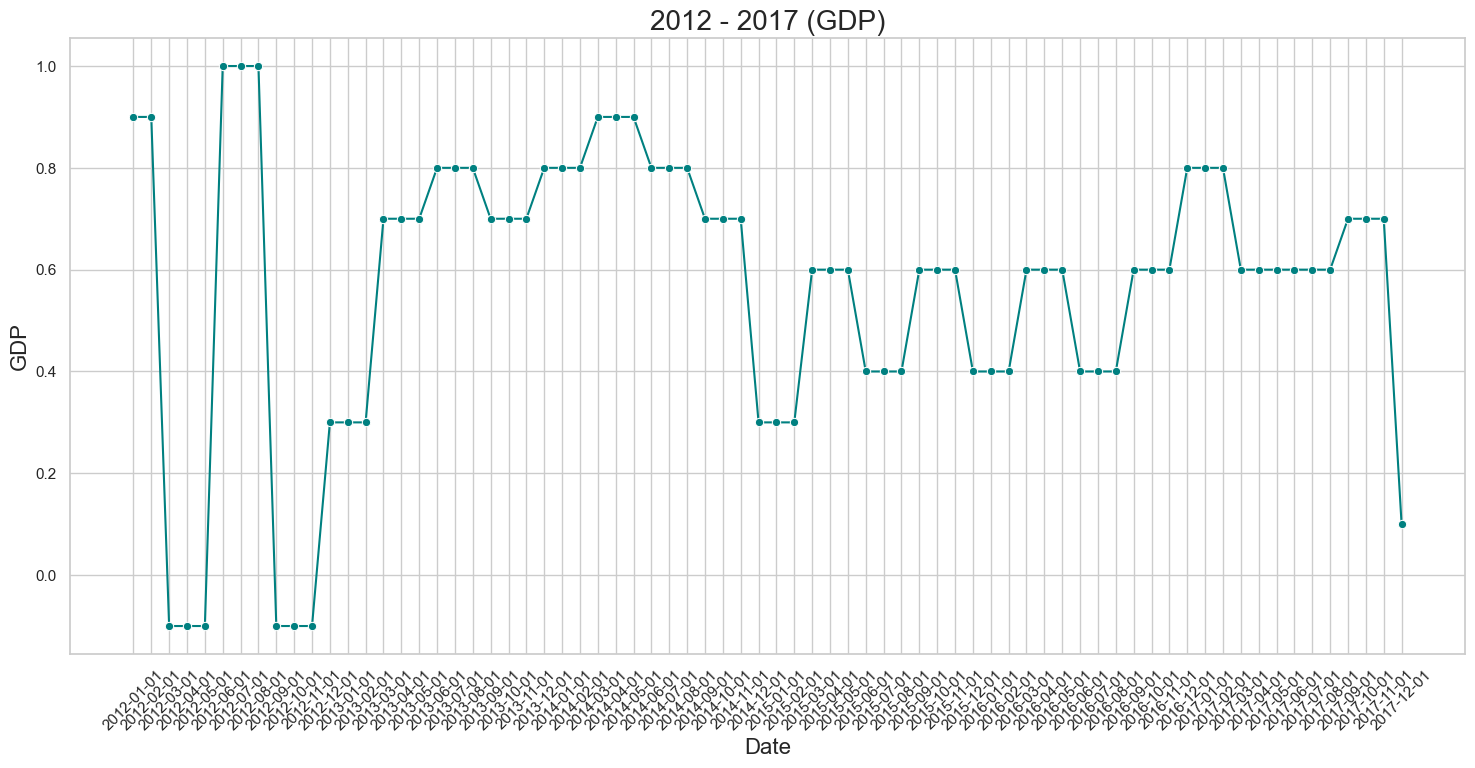

In [1512]:
# 2012-2017 (GDP)
fig, ax = plt.subplots(figsize=(18, 8))
gdp_2012_2017 = gdp_df[(gdp_df['Date'] >= '2012-01-01') & (gdp_df['Date'] < '2017-12-31')]
sns.lineplot(data=gdp_2012_2017, x='Date', y='GDP', marker='o', color='teal', ax=ax)
ax.set_title("2012 - 2017 (GDP)", fontsize=20)
ax.set_ylabel("GDP", fontsize=16)
ax.set_xlabel("Date", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.grid(True)
plt.show()

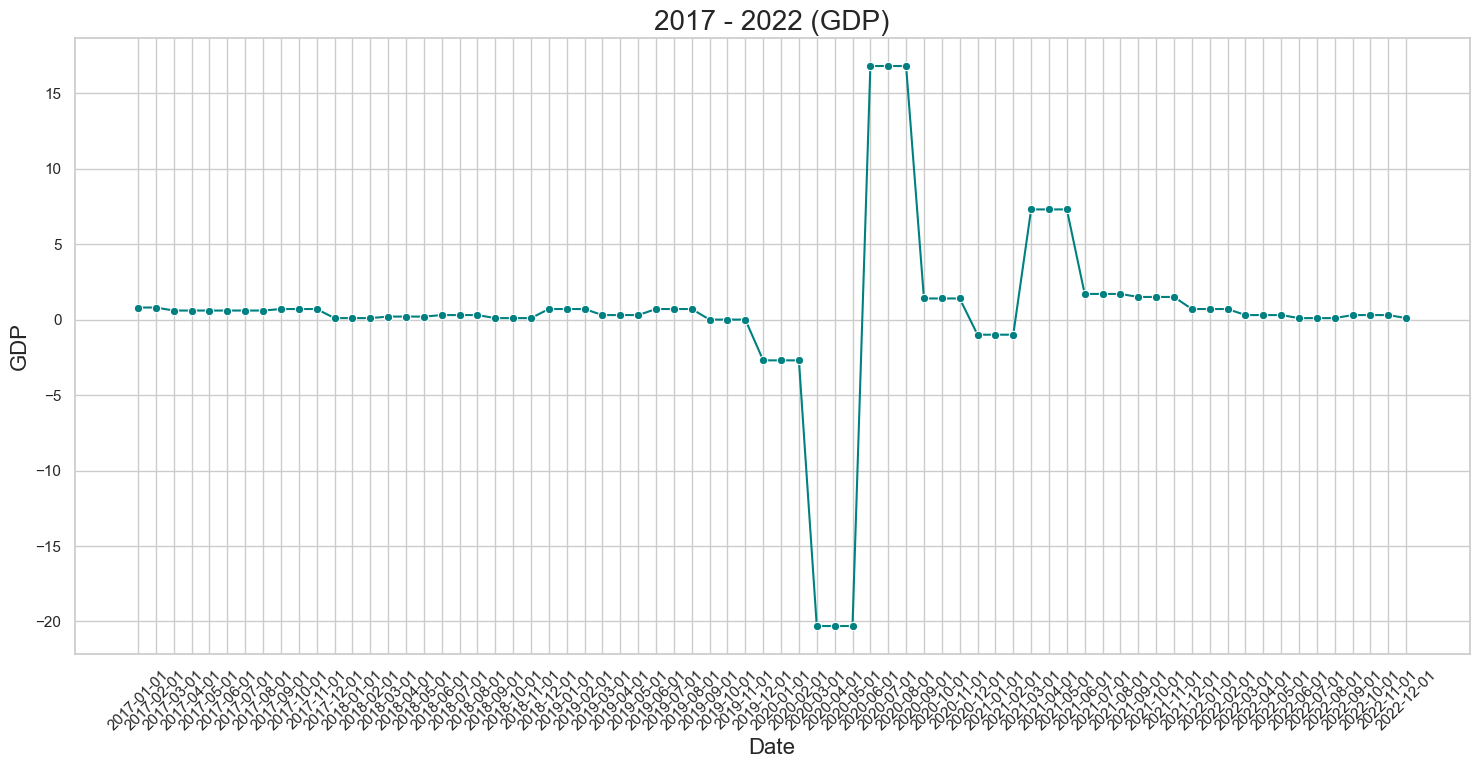

In [1514]:
# 2017-2022 (GDP)
fig, ax = plt.subplots(figsize=(18, 8))
gdp_2017_2022 = gdp_df[(gdp_df['Date'] >= '2017-01-01') & (gdp_df['Date'] < '2022-12-31')]
sns.lineplot(data=gdp_2017_2022, x='Date', y='GDP', marker='o', color='teal', ax=ax)
ax.set_title("2017 - 2022 (GDP)", fontsize=20)
ax.set_ylabel("GDP", fontsize=16)
ax.set_xlabel("Date", fontsize=16)
ax.tick_params(axis='x', rotation=45)
plt.grid(True)
plt.show()

In [1642]:
ftse_250.head()

Date        Price  Total Return (Gross, Unhedged)
0 1989-12-01  2661.760010                      803.789978
1 1990-01-01  2591.129883                      783.250000
2 1990-02-01  2463.879883                      746.010010
3 1990-03-01  2437.370117                      741.700012
4 1990-04-01  2285.780029                      701.510010

In [1644]:
# Reset the index and explicitly name the Date column
ftse_250.reset_index(inplace=True)

# Rename the unnamed index to 'Date' if needed
if ftse_250.columns[0] == "":
    ftse_250.rename(columns={ftse_250.columns[0]: 'Date'}, inplace=True)

# Ensure the Date column is in the correct datetime format
ftse_250['Date'] = pd.to_datetime(ftse_250['Date'], errors='coerce')

# Set each date to the 1st of the month (just to be consistent)
ftse_250['Date'] = ftse_250['Date'].dt.to_period("M").dt.to_timestamp()

# Set it back as the index if needed
ftse_250.set_index('Date', inplace=True)

print(ftse_250.head())

            index        Price  Total Return (Gross, Unhedged)
Date                                                          
1989-12-01      0  2661.760010                      803.789978
1990-01-01      1  2591.129883                      783.250000
1990-02-01      2  2463.879883                      746.010010
1990-03-01      3  2437.370117                      741.700012
1990-04-01      4  2285.780029                      701.510010


In [1646]:
# Reset the index if it is currently set as the index
if isinstance(ftse_250.index, pd.DatetimeIndex) or isinstance(ftse_250.index, pd.PeriodIndex):
    ftse_250.reset_index(inplace=True)

# Rename the index column to 'Date' if it is unnamed
if ftse_250.columns[0] not in ["Date", "date"]:
    ftse_250.rename(columns={ftse_250.columns[0]: 'Date'}, inplace=True)

print(ftse_250.head())


        Date  index        Price  Total Return (Gross, Unhedged)
0 1989-12-01      0  2661.760010                      803.789978
1 1990-01-01      1  2591.129883                      783.250000
2 1990-02-01      2  2463.879883                      746.010010
3 1990-03-01      3  2437.370117                      741.700012
4 1990-04-01      4  2285.780029                      701.510010


In [1648]:
# Reset the index to make 'Date' a regular column
ftse_250.reset_index(inplace=True)

# Convert the 'Date' column to datetime for consistency
ftse_250['Date'] = pd.to_datetime(ftse_250['Date'], errors='coerce')

# Set it back as the index for consistent merging
ftse_250.set_index('Date', inplace=True)
ftse_250.head()

level_0  index        Price  Total Return (Gross, Unhedged)
Date                                                                   
1989-12-01        0      0  2661.760010                      803.789978
1990-01-01        1      1  2591.129883                      783.250000
1990-02-01        2      2  2463.879883                      746.010010
1990-03-01        3      3  2437.370117                      741.700012
1990-04-01        4      4  2285.780029                      701.510010

In [1650]:
# Reset the index to get 'Date' as a regular column
ftse_250.reset_index(inplace=True)

# Drop unnecessary columns like 'level_0' and 'index'
ftse_250.drop(columns=['level_0', 'index'], inplace=True, errors='ignore')

# Ensure 'Date' is correctly formatted
ftse_250['Date'] = pd.to_datetime(ftse_250['Date'], errors='coerce')

# Set 'Date' as the index for consistency
ftse_250.set_index('Date', inplace=True)

# Preview the cleaned dataframe
ftse_250.head()


Price  Total Return (Gross, Unhedged)
Date                                                   
1989-12-01  2661.760010                      803.789978
1990-01-01  2591.129883                      783.250000
1990-02-01  2463.879883                      746.010010
1990-03-01  2437.370117                      741.700012
1990-04-01  2285.780029                      701.510010

In [1652]:
ftse_250.reset_index(inplace=True)

In [1654]:
ftse_250.columns

Index(['Date', 'Price', 'Total Return (Gross, Unhedged)'], dtype='object')

In [1656]:
# Ensure ftse_250 has 'Date' as a regular column
if ftse_250.index.name == 'Date':
    ftse_250.reset_index(inplace=True)

# Convert the 'Date' column to datetime
ftse_250['Date'] = pd.to_datetime(ftse_250['Date'], errors='coerce')
ftse_250.dropna(subset=['Date'], inplace=True)
ftse_250.set_index('Date', inplace=True)

# Modify dataframes to exclude ftse_250
dataframes = [base_rate, cpi, ftse_350, price_02, customer_confidence,
              price_05, price_10, unemployment, wage, gdp_df]

# List of dataframe names for prefixing
df_names = [
     'base_rate', 'cpi', 'ftse_350', 'price_02',
    'confidence', 'price_05', 'price_10', 'unemployment', 'wage', 'gdp'
]

# Iterate through each dataframe in the list
for i, df in enumerate(dataframes):
    try:
        # Reset the index if 'Date' is not a regular column
        if df.index.name == 'Date':
            df.reset_index(inplace=True)
        
        # Convert "Date" column to datetime format
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        
        # Drop rows with missing dates
        df.dropna(subset=['Date'], inplace=True)
        
        # Set each date to the 1st of the month
        df['Date'] = df['Date'].dt.to_period("M").dt.to_timestamp()
        
        # Set the 'Date' column as the index for the current dataframe
        df.set_index('Date', inplace=True)
        
        # Add prefix to all columns except 'Date'
        prefix = df_names[i]
        df.columns = [f"{prefix}_{col}" for col in df.columns]
        
        # Resample the current dataframe to monthly frequency and forward fill missing values
        df_resampled = df.resample('MS').ffill()
        
        # Left join the resampled current dataframe with ftse_250 dataframe
        ftse_250 = ftse_250.join(df_resampled, how='left')
    except KeyError as e:
        print(f"Error processing {df_names[i]}: {e}")

# Forward fill remaining missing values
ftse_250.fillna(method='ffill', inplace=True)

# Reset the index to have a regular 'Date' column
ftse_250.reset_index(inplace=True)

# Print a sample of the merged DataFrame
ftse_250



C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_37872\3567626366.py:52: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ftse_250.fillna(method='ffill', inplace=True)


Date         Price  Total Return (Gross, Unhedged)  \
0   1989-12-01   2661.760010                      803.789978   
1   1990-01-01   2591.129883                      783.250000   
2   1990-02-01   2463.879883                      746.010010   
3   1990-03-01   2437.370117                      741.700012   
4   1990-04-01   2285.780029                      701.510010   
..         ...           ...                             ...   
420 2024-12-01  20622.605248                    18346.656782   
421 2025-01-01  20950.482851                    18672.852084   
422 2025-02-01  20326.383594                    18140.063381   
423 2025-03-01  19475.479520                    17424.441293   
424 2025-04-01  19884.587718                    17897.238775   

     base_rate_base_rate_base_rate_base_rate_base_rate_base_rate_base_rate_base_rate_Rate  \
0                                            14.713333                                      
1                                            14.630000                                      
2                                            14.546667                                      
3                                            14.463333                                      
4                                            14.380000                                      
..                                                 ...                                      
420                                           4.666667                                      
421                                           4.583333                                      
422                                           4.500000                                      
423                                           4.500000                                      
424                                           4.500000                                      

     cpi_cpi_cpi_cpi_cpi_cpi_cpi_cpi_CPI  \
0                                    NaN   
1                                    5.7   
2                                    5.9   
3                                    6.0   
4                                    6.4   
..                                   ...   
420                                  2.5   
421                                  3.0   
422                                  2.8   
423                                  2.6   
424                                  2.6   

     ftse_350_ftse_350_ftse_350_ftse_350_ftse_350_ftse_350_ftse_350_ftse_350_Price  \
0                                                  NaN                               
1                                          1165.829956                               
2                                          1121.469971                               
3                                          1115.699951                               
4                                          1044.619995                               
..                                                 ...                               
420                                        4510.612374                               
421                                        4760.296255                               
422                                        4808.022992                               
423                                        4675.031137                               
424                                        4644.106267                               

     ftse_350_ftse_350_ftse_350_ftse_350_ftse_350_ftse_350_ftse_350_ftse_350_Total Return (Gross, Unhedged)  \
0                                                  NaN                                                        
1                                           725.320007                                                        
2                                           700.580017                                                        
3                                           701.400024                                                        
4      

In [1624]:
# Drop unwanted columns like 'level_0' and 'index' if they exist
ftse_250 = ftse_250.loc[:, ~ftse_250.columns.str.contains('level_0|index')]


In [1626]:
# Remove redundant prefixes from column names
def clean_column_name(col_name):
    parts = col_name.split('_')
    # Remove repeated words
    cleaned_parts = []
    for part in parts:
        if cleaned_parts and part == cleaned_parts[-1]:
            continue
        cleaned_parts.append(part)
    return '_'.join(cleaned_parts)

# Apply the cleaning function to all column names
ftse_250.columns = [clean_column_name(col) for col in ftse_250.columns]


In [1658]:
ftse_250.columns.tolist()

['Date',
 'Price',
 'Total Return (Gross, Unhedged)',
 'base_rate_base_rate_base_rate_base_rate_base_rate_base_rate_base_rate_base_rate_Rate',
 'cpi_cpi_cpi_cpi_cpi_cpi_cpi_cpi_CPI',
 'ftse_350_ftse_350_ftse_350_ftse_350_ftse_350_ftse_350_ftse_350_ftse_350_Price',
 'ftse_350_ftse_350_ftse_350_ftse_350_ftse_350_ftse_350_ftse_350_ftse_350_Total Return (Gross, Unhedged)',
 'price_02_price_02_price_02_price_02_price_02_price_02_price_02_price_02_Price',
 'price_02_price_02_price_02_price_02_price_02_price_02_price_02_price_02_Total Return (Gross, Unhedged)',
 'confidence_confidence_confidence_confidence_confidence_confidence_confidence_confidence_confidence_score',
 'price_05_price_05_price_05_price_05_price_05_price_05_price_05_price_05_Price',
 'price_05_price_05_price_05_price_05_price_05_price_05_price_05_price_05_Total Return (Gross, Unhedged)',
 'price_10_price_10_price_10_price_10_price_10_price_10_price_10_price_10_Price',
 'price_10_price_10_price_10_price_10_price_10_price_10_pri

In [1662]:
ftse_250.rename(columns={
 'Price':'ftse_250_price',
 'Total Return (Gross, Unhedged)':'ftse_250_total_return',
 'base_rate_base_rate_base_rate_base_rate_base_rate_base_rate_base_rate_base_rate_Rate':'base_rate',
 'cpi_cpi_cpi_cpi_cpi_cpi_cpi_cpi_CPI':'CPI',
 'ftse_350_ftse_350_ftse_350_ftse_350_ftse_350_ftse_350_ftse_350_ftse_350_Price':'ftse_350',
 'ftse_350_ftse_350_ftse_350_ftse_350_ftse_350_ftse_350_ftse_350_ftse_350_Total Return (Gross, Unhedged)':'ftse_350_total_return',
 'price_02_price_02_price_02_price_02_price_02_price_02_price_02_price_02_Price':'price_02',
 'price_02_price_02_price_02_price_02_price_02_price_02_price_02_price_02_Total Return (Gross, Unhedged)':'price_02_total_return',
 'confidence_confidence_confidence_confidence_confidence_confidence_confidence_confidence_confidence_score':'confidence_score',
 'price_05_price_05_price_05_price_05_price_05_price_05_price_05_price_05_Price':'price_05',
 'price_05_price_05_price_05_price_05_price_05_price_05_price_05_price_05_Total Return (Gross, Unhedged)':'price_05_total_return',
 'price_10_price_10_price_10_price_10_price_10_price_10_price_10_price_10_Price':'price_10',
 'price_10_price_10_price_10_price_10_price_10_price_10_price_10_price_10_Total Return (Gross, Unhedged)':'price_10_total_return',
 'unemployment_unemployment_unemployment_unemployment_unemployment_unemployment_unemployment_unemployment_unemployment_rate':'unemployment_rate',
 'wage_wage_wage_wage_wage_wage_wage_wage_growth_rate':'wage_growth',
 'gdp_gdp_gdp_gdp_gdp_gdp_gdp_gdp_GDP':'GDP'
}, inplace=True)


In [1664]:
ftse_250.columns

Index(['Date', 'ftse_250_price', 'ftse_250_total_return', 'base_rate', 'CPI',
       'ftse_350', 'ftse_350_total_return', 'price_02',
       'price_02_total_return', 'confidence_score', 'price_05',
       'price_05_total_return', 'price_10', 'price_10_total_return',
       'unemployment_rate', 'wage_growth', 'GDP'],
      dtype='object')

In [1666]:
merged_df = ftse_250.copy()

In [1668]:
merged_df.tail()

Date  ftse_250_price  ftse_250_total_return  base_rate  CPI  \
420 2024-12-01    20622.605248           18346.656782   4.666667  2.5   
421 2025-01-01    20950.482851           18672.852084   4.583333  3.0   
422 2025-02-01    20326.383594           18140.063381   4.500000  2.8   
423 2025-03-01    19475.479520           17424.441293   4.500000  2.6   
424 2025-04-01    19884.587718           17897.238775   4.500000  2.6   

        ftse_350  ftse_350_total_return   price_02  price_02_total_return  \
420  4510.612374            9911.349295  97.599004                202.318   
421  4760.296255           10468.532721  97.964750                203.450   
422  4808.022992           10614.288825  97.931114                204.230   
423  4675.031137           10374.199304  98.206564                204.810   
424  4644.106267           10346.175473  98.691235                206.139   

     confidence_score   price_05  price_05_total_return   price_10  \
420             -17.0  76.436604                258.074  70.333738   
421             -22.0  77.157249                260.303  70.983754   
422             -20.0  77.946072                262.794  71.900830   
423             -19.0  76.341361                258.271  69.708409   
424             -23.0  77.899108                263.519  71.042948   

     price_10_total_return  unemployment_rate  wage_growth  GDP  
420               1158.944                4.4          6.0  0.1  
421               1169.039                4.4          5.6  0.1  
422               1181.575                4.4          5.6  0.1  
423               1153.159                4.4          5.6  0.1  
424               1175.321                4.4          5.6  0.1

In [1670]:
merged_df.to_csv("merged_monthly_data.csv", index=False, sep=",", encoding="utf-8-sig")

In [1682]:
merged_df

Date  ftse_250_price  ftse_250_total_return  base_rate  CPI  \
0   1989-12-01     2661.760010             803.789978  14.713333  NaN   
1   1990-01-01     2591.129883             783.250000  14.630000  5.7   
2   1990-02-01     2463.879883             746.010010  14.546667  5.9   
3   1990-03-01     2437.370117             741.700012  14.463333  6.0   
4   1990-04-01     2285.780029             701.510010  14.380000  6.4   
..         ...             ...                    ...        ...  ...   
420 2024-12-01    20622.605248           18346.656782   4.666667  2.5   
421 2025-01-01    20950.482851           18672.852084   4.583333  3.0   
422 2025-02-01    20326.383594           18140.063381   4.500000  2.8   
423 2025-03-01    19475.479520           17424.441293   4.500000  2.6   
424 2025-04-01    19884.587718           17897.238775   4.500000  2.6   

        ftse_350  ftse_350_total_return   price_02  price_02_total_return  \
0            NaN                    NaN        NaN                    NaN   
1    1165.829956             725.320007        NaN                    NaN   
2    1121.469971             700.580017        NaN                    NaN   
3    1115.699951             701.400024        NaN                    NaN   
4    1044.619995             660.010010        NaN                    NaN   
..           ...                    ...        ...                    ...   
420  4510.612374            9911.349295  97.599004                202.318   
421  4760.296255           10468.532721  97.964750                203.450   
422  4808.022992           10614.288825  97.931114                204.230   
423  4675.031137           10374.199304  98.206564                204.810   
424  4644.106267           10346.175473  98.691235                206.139   

     confidence_score   price_05  price_05_total_return   price_10  \
0                 NaN        NaN                    NaN        NaN   
1               -19.0        NaN                    NaN        NaN   
2               -24.0        NaN                    NaN        NaN   
3               -35.0        NaN                    NaN        NaN   
4               -31.0        NaN                    NaN        NaN   
..                ...        ...                    ...        ...   
420             -17.0  76.436604                258.074  70.333738   
421             -22.0  77.157249                260.303  70.983754   
422             -20.0  77.946072                262.794  71.900830   
423             -19.0  76.341361                258.271  69.708409   
424             -23.0  77.899108                263.519  71.042948   

     price_10_total_return  unemployment_rate  wage_growth  GDP  
0                      NaN                NaN          NaN  0.5  
1                      NaN                6.9          NaN  0.5  
2                      NaN                6.9          NaN  0.5  
3                      NaN                6.9          NaN  0.7  
4                      NaN                6.9          NaN  0.7  
..                     ...                ...          ...  ...  
420               1158.944                4.4          6.0  0.1  
421               1169.039                4.4          5.6  0.1  
422               1181.575                4.4          5.6  0.1  
423               1153.159                4.4          5.6  0.1  
424               1175.321                4.4          5.6  0.1  

[425 rows x 17 columns]

Heatmap saved as 'correlation_heatmap.png'


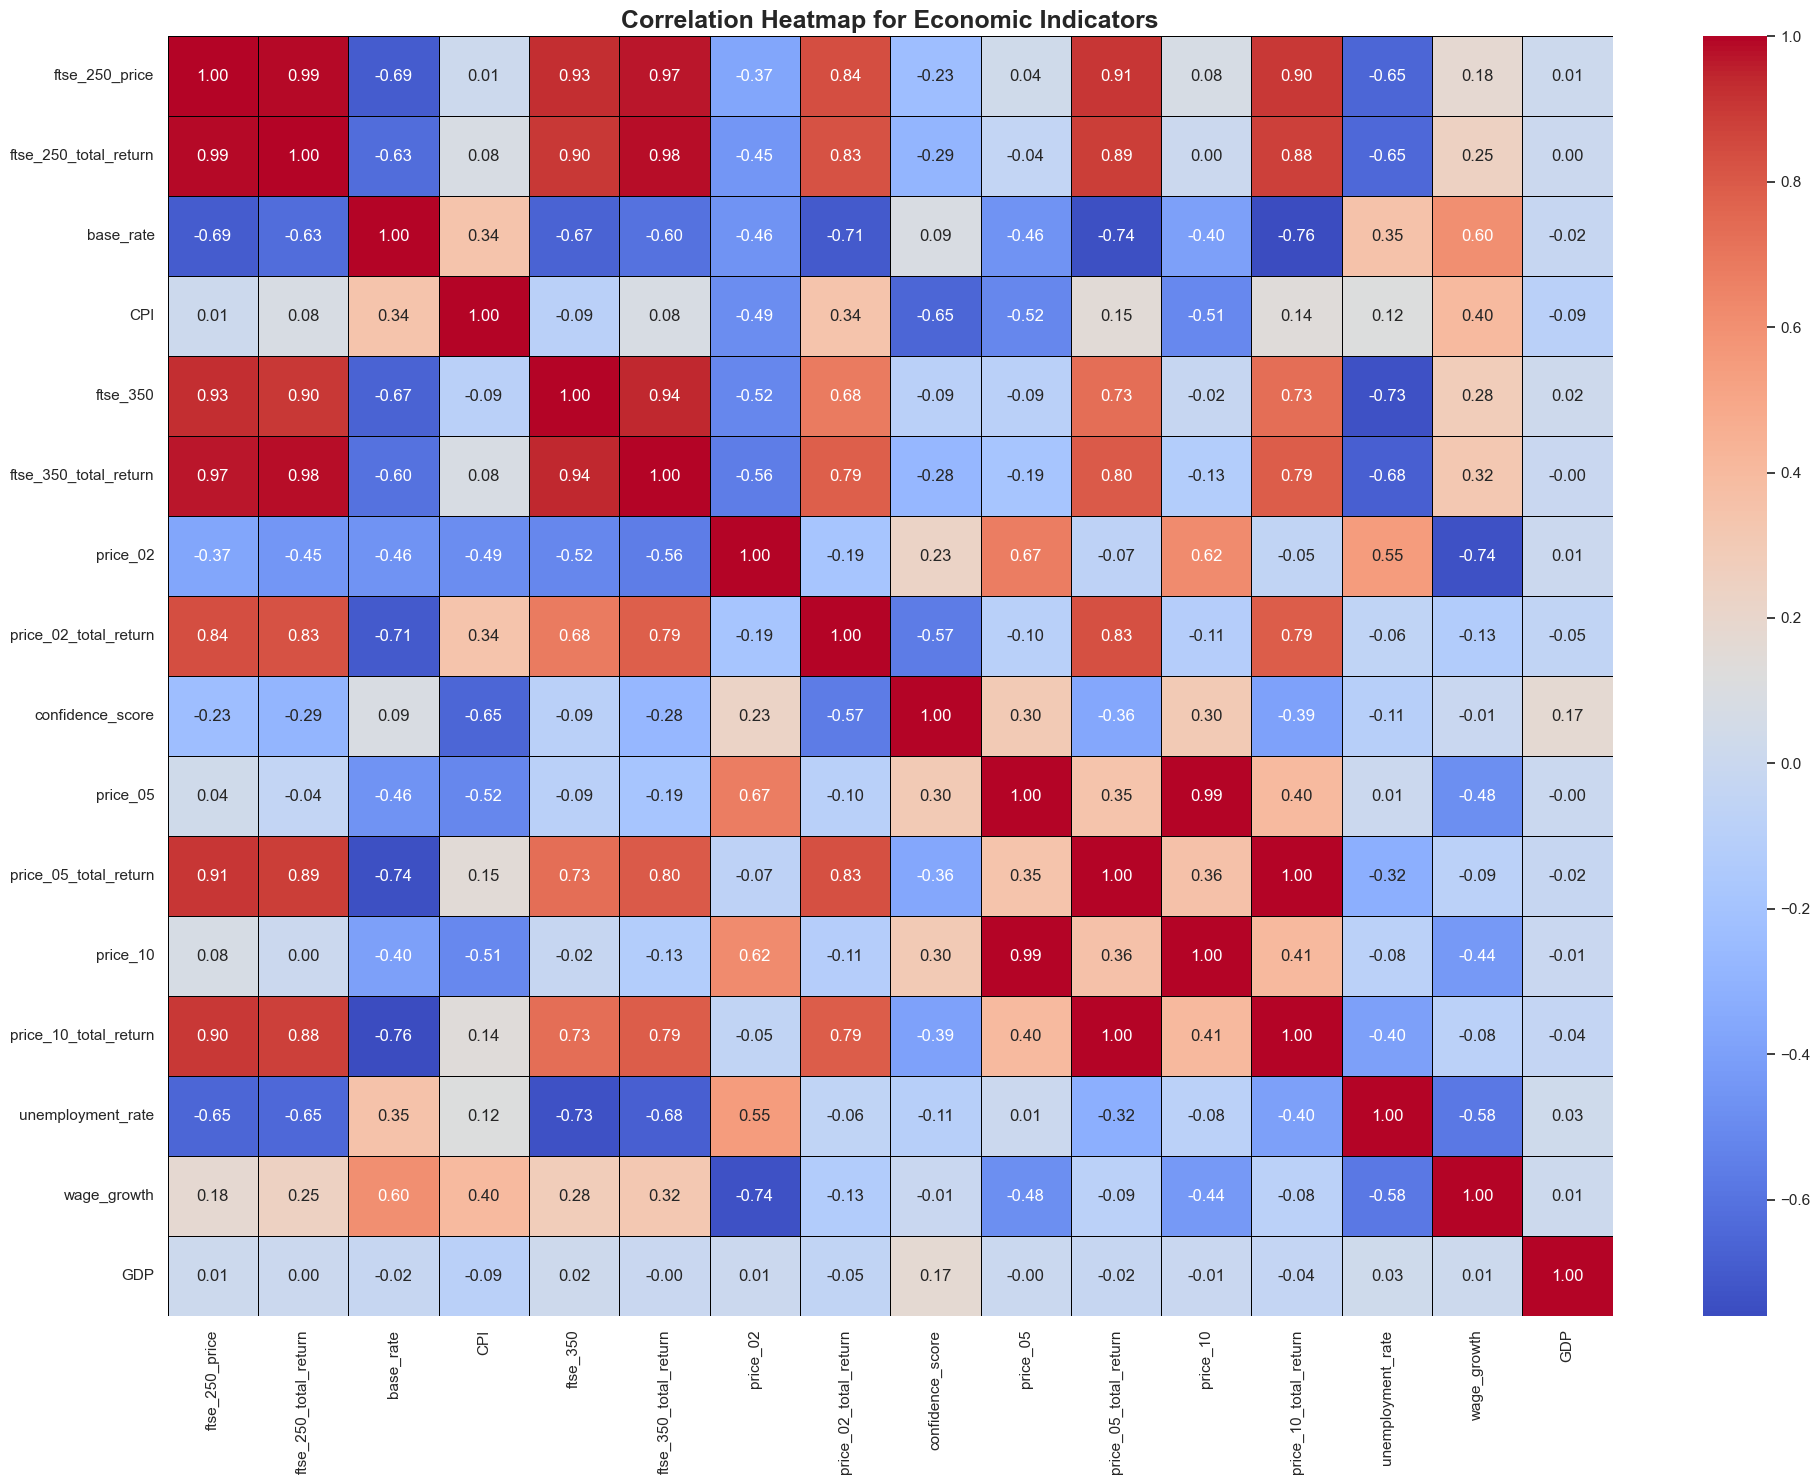

In [1672]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = merged_df.select_dtypes(include='number').corr()

# Plot heatmap with annotations
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap for Economic Indicators', fontsize=18, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# Save the figure
heatmap_figure_path = "correlation_heatmap.png"
plt.savefig(heatmap_figure_path, dpi=300, bbox_inches='tight')

print(f"Heatmap saved as '{heatmap_figure_path}'")
plt.show()


Improved heatmap saved as 'correlation_heatmap_improved.png'


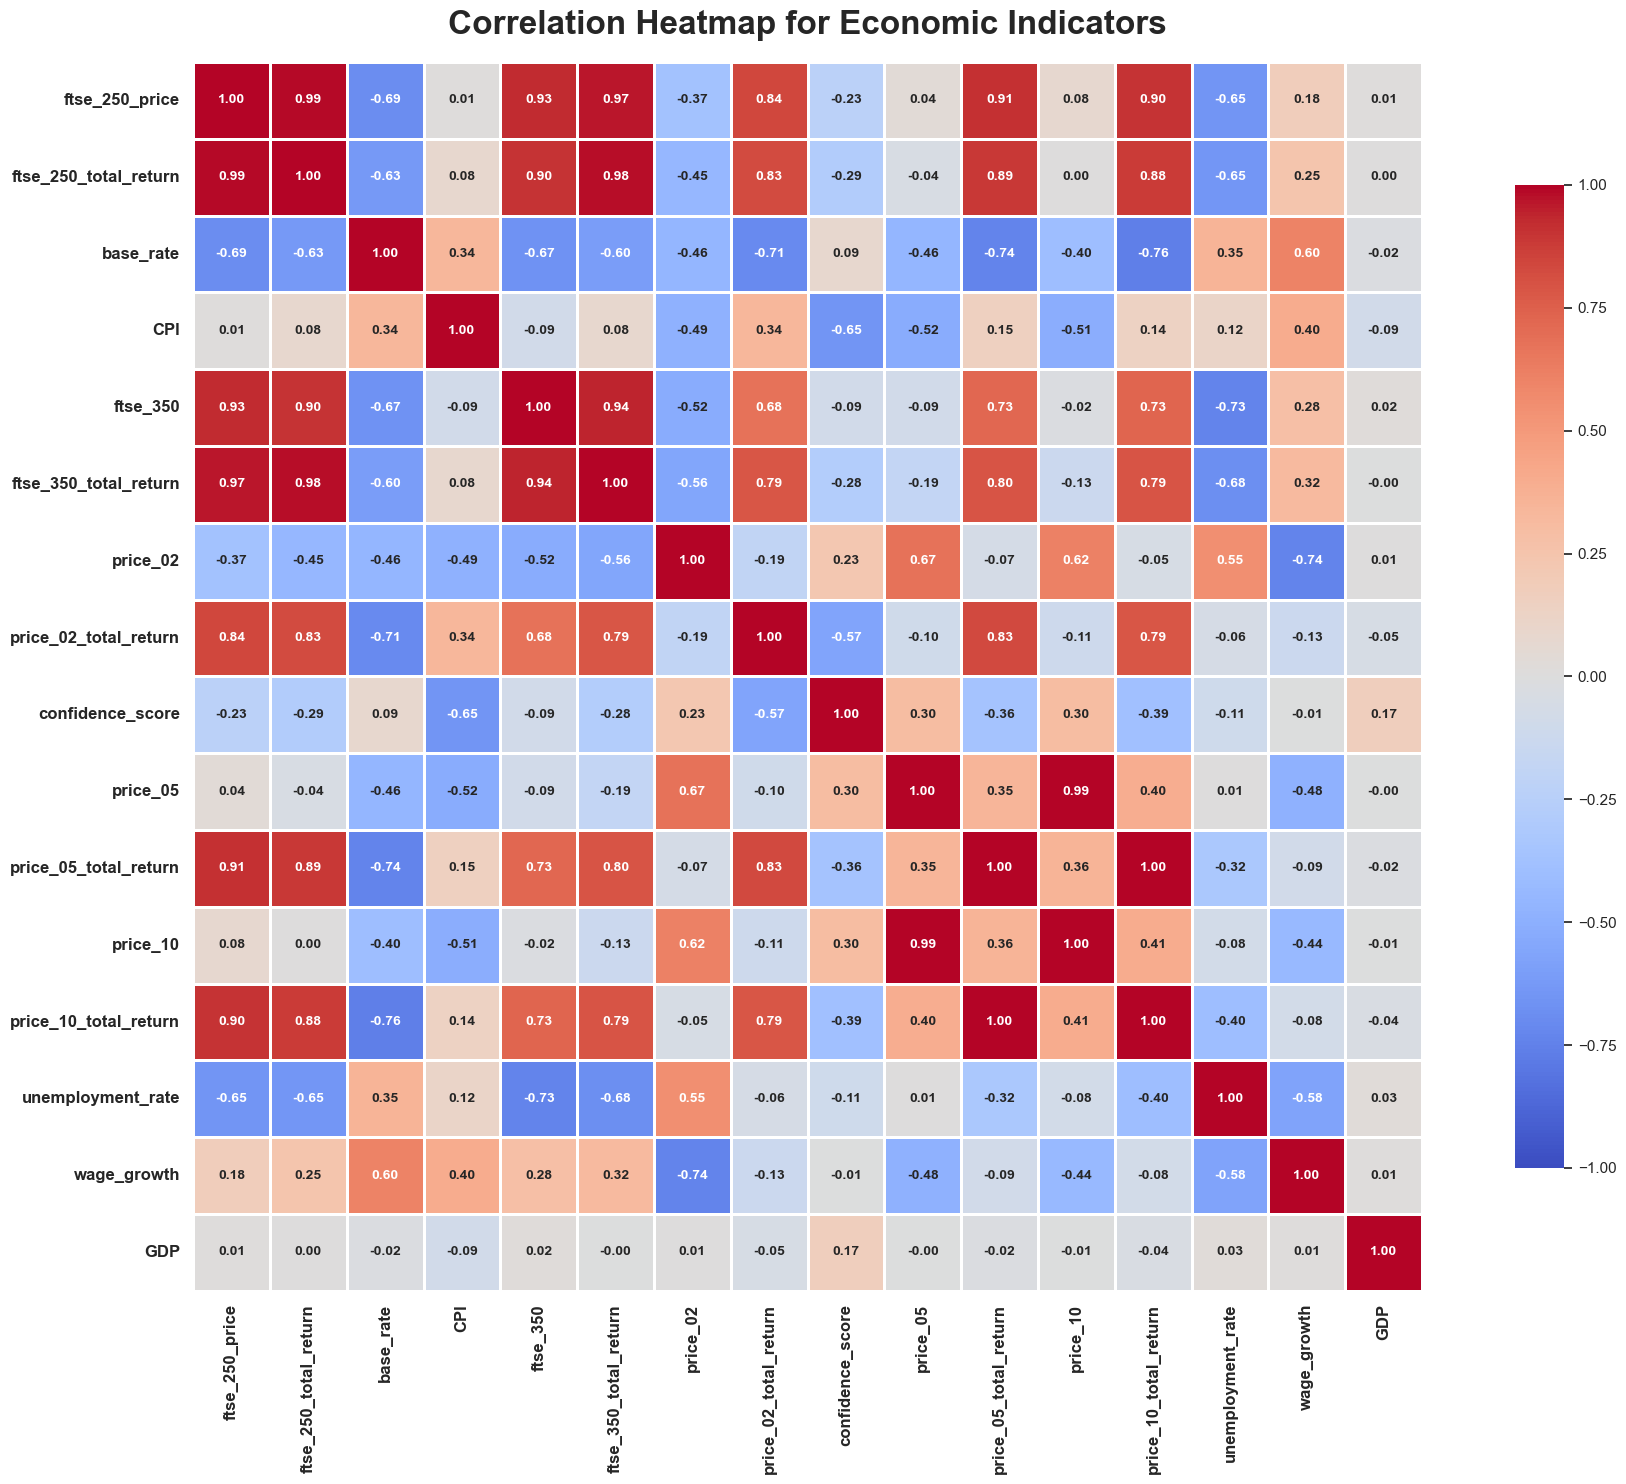

In [1674]:
# Calculate the correlation matrix
correlation_matrix = merged_df.select_dtypes(include='number').corr()

# Plot heatmap with improved styling
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 10, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)
plt.title('Correlation Heatmap for Economic Indicators', fontsize=24, fontweight='bold', pad=20)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

# Save the figure
heatmap_figure_path = "correlation_heatmap_improved.png"
plt.savefig(heatmap_figure_path, dpi=300, bbox_inches='tight')

print(f"Improved heatmap saved as '{heatmap_figure_path}'")
plt.show()

In [1680]:
# Select the required columns from df_uk
selected_columns = df_uk[['Date', 'polarity_score_finbert', 'SentimentScore_nltk']]

# Merge the selected columns into the merged_sentiment dataframe
merged_sentiment = pd.merge(merged_df, selected_columns, on='Date', how='left')

In [1684]:
merged_sentiment

Date  ftse_250_price  ftse_250_total_return  base_rate  CPI  \
0   1989-12-01     2661.760010             803.789978  14.713333  NaN   
1   1990-01-01     2591.129883             783.250000  14.630000  5.7   
2   1990-02-01     2463.879883             746.010010  14.546667  5.9   
3   1990-03-01     2437.370117             741.700012  14.463333  6.0   
4   1990-04-01     2285.780029             701.510010  14.380000  6.4   
..         ...             ...                    ...        ...  ...   
424 2024-12-01    20622.605248           18346.656782   4.666667  2.5   
425 2025-01-01    20950.482851           18672.852084   4.583333  3.0   
426 2025-02-01    20326.383594           18140.063381   4.500000  2.8   
427 2025-03-01    19475.479520           17424.441293   4.500000  2.6   
428 2025-04-01    19884.587718           17897.238775   4.500000  2.6   

        ftse_350  ftse_350_total_return   price_02  price_02_total_return  \
0            NaN                    NaN        NaN                    NaN   
1    1165.829956             725.320007        NaN                    NaN   
2    1121.469971             700.580017        NaN                    NaN   
3    1115.699951             701.400024        NaN                    NaN   
4    1044.619995             660.010010        NaN                    NaN   
..           ...                    ...        ...                    ...   
424  4510.612374            9911.349295  97.599004                202.318   
425  4760.296255           10468.532721  97.964750                203.450   
426  4808.022992           10614.288825  97.931114                204.230   
427  4675.031137           10374.199304  98.206564                204.810   
428  4644.106267           10346.175473  98.691235                206.139   

     confidence_score   price_05  price_05_total_return   price_10  \
0                 NaN        NaN                    NaN        NaN   
1               -19.0        NaN                    NaN        NaN   
2               -24.0        NaN                    NaN        NaN   
3               -35.0        NaN                    NaN        NaN   
4               -31.0        NaN                    NaN        NaN   
..                ...        ...                    ...        ...   
424             -17.0  76.436604                258.074  70.333738   
425             -22.0  77.157249                260.303  70.983754   
426             -20.0  77.946072                262.794  71.900830   
427             -19.0  76.341361                258.271  69.708409   
428             -23.0  77.899108                263.519  71.042948   

     price_10_total_return  unemployment_rate  wage_growth  GDP  \
0                      NaN                NaN          NaN  0.5   
1                      NaN                6.9          NaN  0.5   
2                      NaN                6.9          NaN  0.5   
3                      NaN                6.9          NaN  0.7   
4                      NaN                6.9          NaN  0.7   
..                     ...                ...          ...  ...   
424               1158.944                4.4          6.0  0.1   
425               1169.039                4.4          5.6  0.1   
426               1181.575                4.4          5.6  0.1   
427               1153.159                4.4          5.6  0.1   
428               1175.321                4.4          5.6  0.1   

     polarity_score_finbert  SentimentScore_nltk  
0                       NaN                  NaN  
1                       NaN                  NaN  
2                       NaN                  NaN  
3                       NaN                  NaN  
4                       NaN                  NaN  
..                      ...                  ...  
424                     NaN                  NaN  
425                     NaN                  NaN  
426                     NaN                  NaN  
427                     NaN                  NaN  
4

Improved heatmap saved as 'correlation_heatmap_sentiment.png'


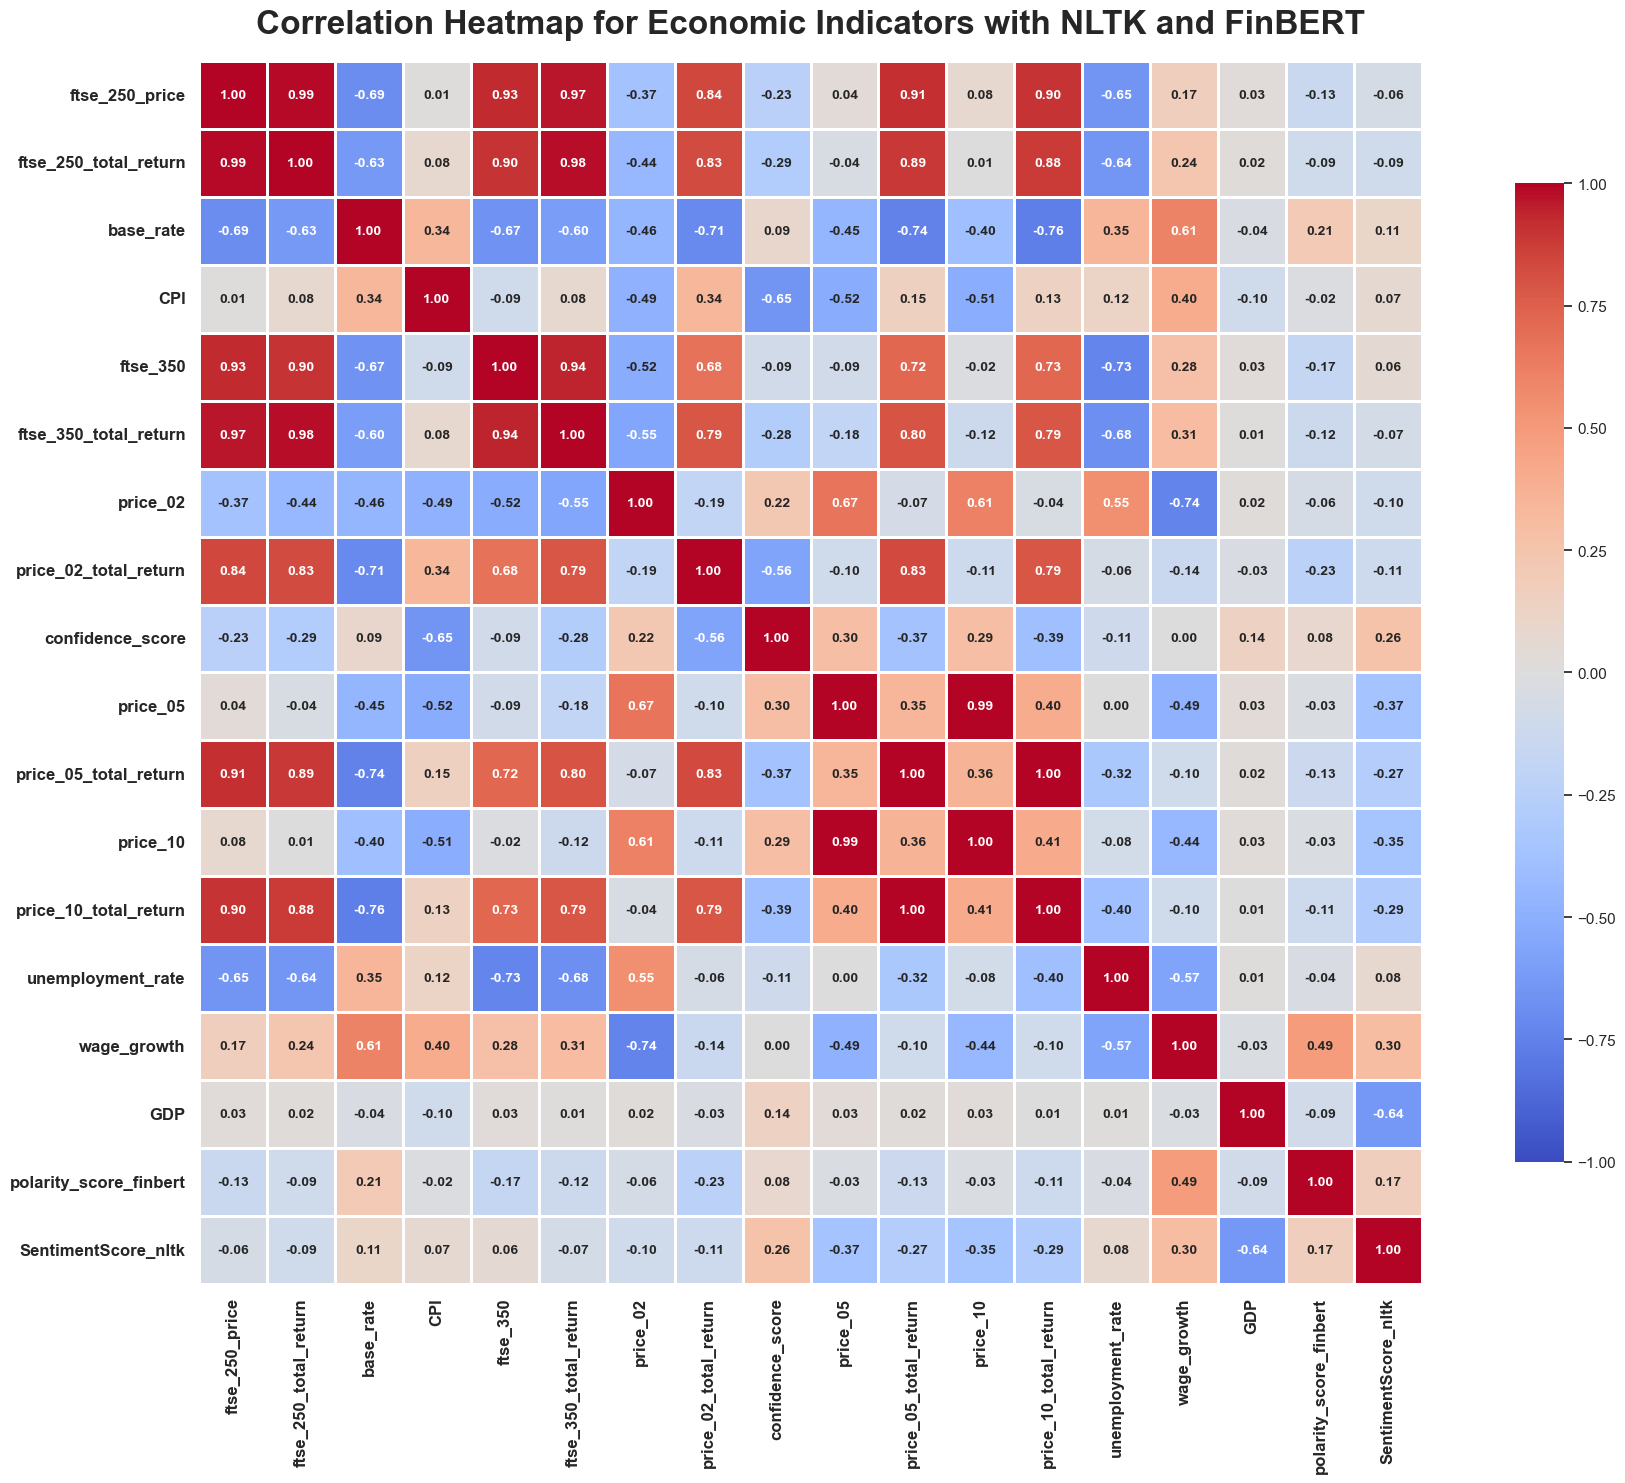

In [1686]:
# Calculate the correlation matrix
correlation_matrix = merged_sentiment.select_dtypes(include='number').corr()

# Plot heatmap with improved styling
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 10, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)
plt.title('Correlation Heatmap for Economic Indicators with NLTK and FinBERT', fontsize=24, fontweight='bold', pad=20)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

# Save the figure
heatmap_figure_path = "correlation_heatmap_sentiment.png"
plt.savefig(heatmap_figure_path, dpi=300, bbox_inches='tight')

print(f"Improved heatmap saved as '{heatmap_figure_path}'")
plt.show()

In [1688]:
merged_df_less = merged_sentiment.copy()

In [1690]:
merged_df_less.columns.tolist()

['Date',
 'ftse_250_price',
 'ftse_250_total_return',
 'base_rate',
 'CPI',
 'ftse_350',
 'ftse_350_total_return',
 'price_02',
 'price_02_total_return',
 'confidence_score',
 'price_05',
 'price_05_total_return',
 'price_10',
 'price_10_total_return',
 'unemployment_rate',
 'wage_growth',
 'GDP',
 'polarity_score_finbert',
 'SentimentScore_nltk']

In [1692]:
merged_df_less.drop(['ftse_350_Price',
                     'ftse_350_Total Return (Gross, Unhedged)',
                     'price_10_Price',
                     'price_10_Total Return (Gross, Unhedged)',
                     'price_05_Price',
                     'price_05_Total Return (Gross, Unhedged)',], axis=1, inplace=True)


KeyError: "['ftse_350_Price', 'ftse_350_Total Return (Gross, Unhedged)', 'price_10_Price', 'price_10_Total Return (Gross, Unhedged)', 'price_05_Price', 'price_05_Total Return (Gross, Unhedged)'] not found in axis"

Improved heatmap saved as 'correlation_heatmap_less.png'


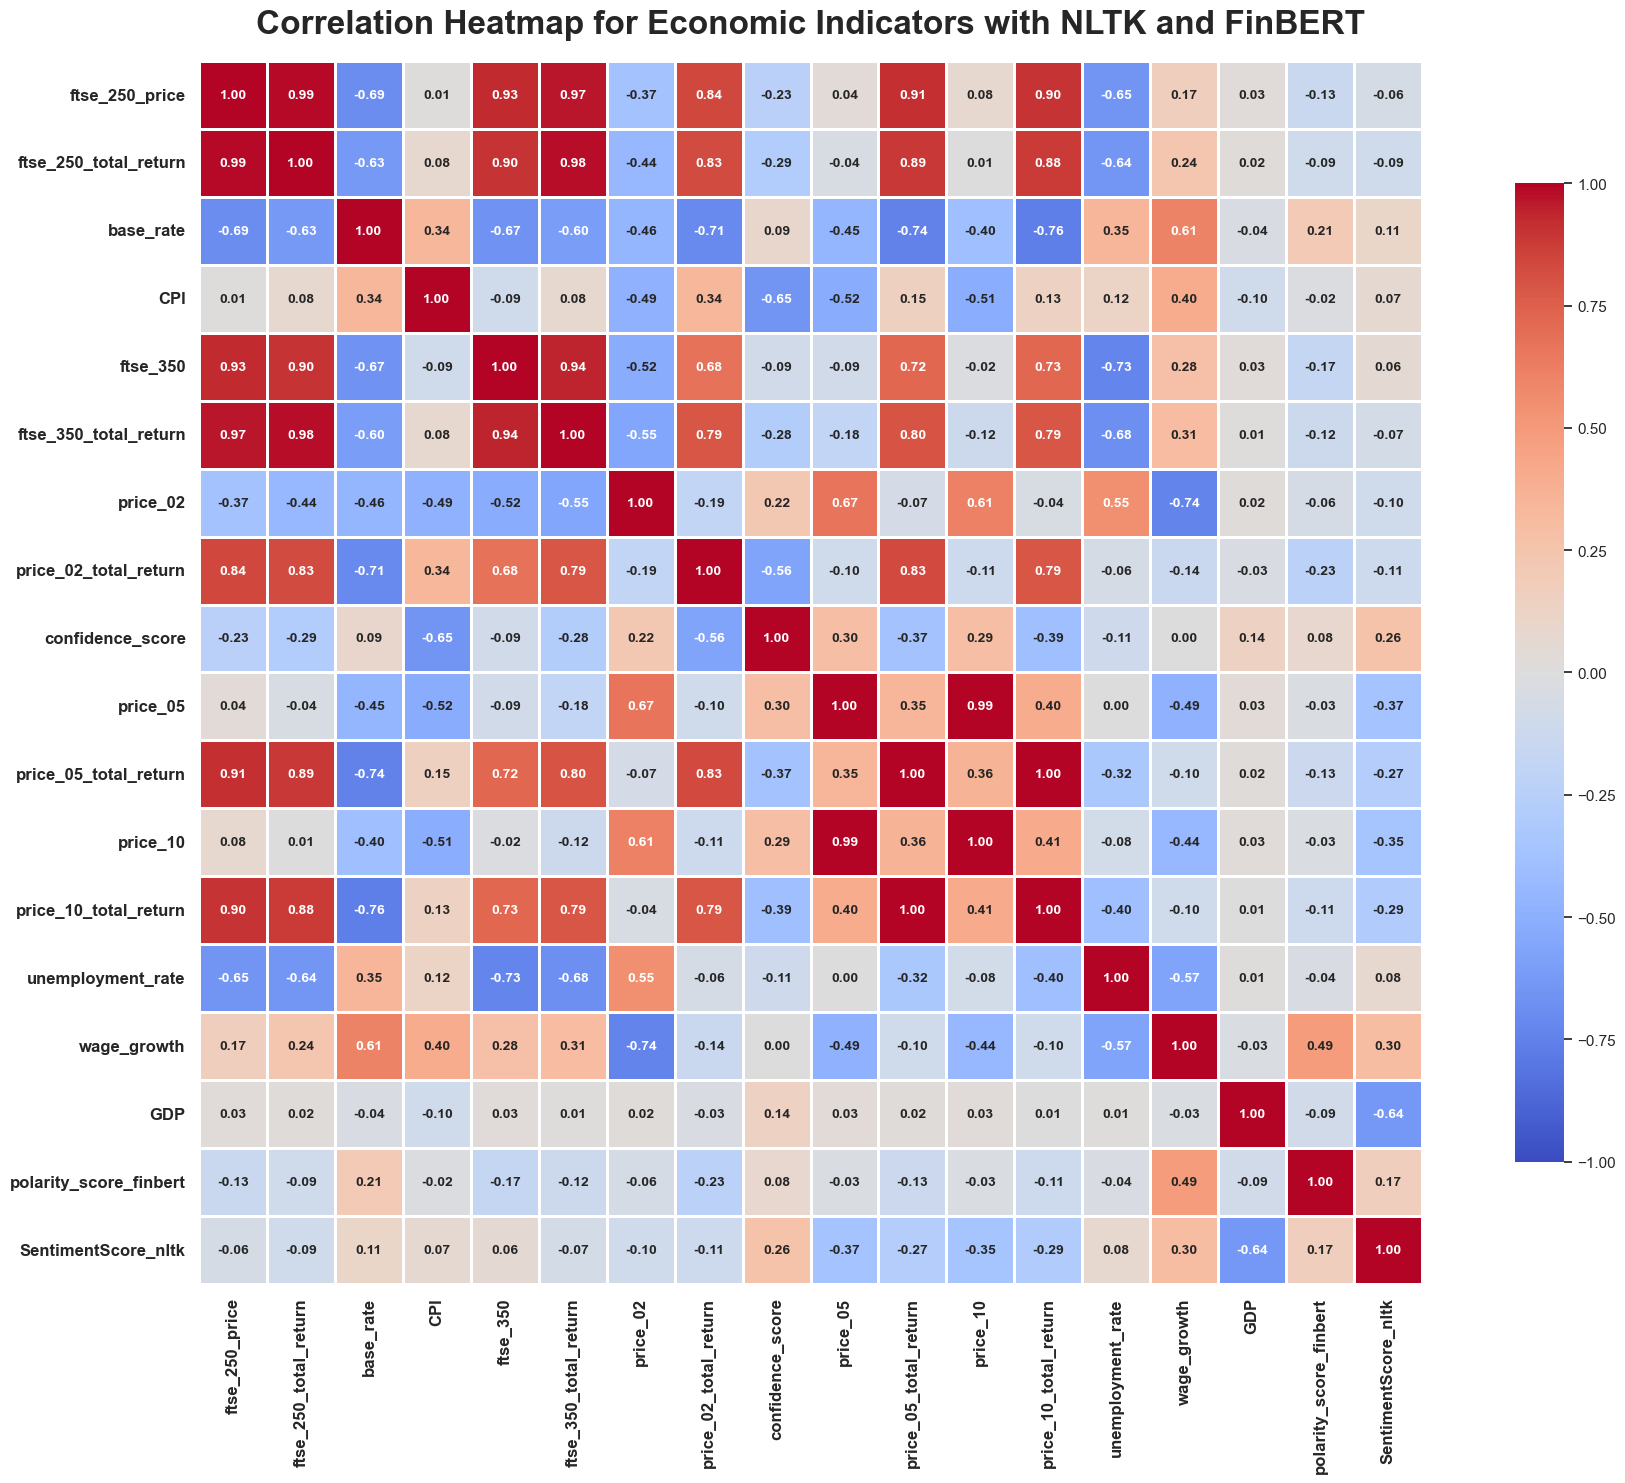

In [1694]:
# Calculate the correlation matrix
correlation_matrix = merged_df_less.select_dtypes(include='number').corr()

# Plot heatmap with improved styling
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 10, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)
plt.title('Correlation Heatmap for Economic Indicators with NLTK and FinBERT', fontsize=24, fontweight='bold', pad=20)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

# Save the figure
heatmap_figure_path = "correlation_heatmap_less.png"
plt.savefig(heatmap_figure_path, dpi=300, bbox_inches='tight')

print(f"Improved heatmap saved as '{heatmap_figure_path}'")
plt.show()